F1 data analisis.

En este proyecto final se realizará un análisis exhaustivo de diferentes aspectos de la Fórmula 1:

- Mejor piloto de la historia 
- Mejor equipo de la historia
- País más vinculado a la F1 (demografía vinculada a la F1)

A través de un dataset con datos obtenidos desde 1950 hasta 2022 sobre diferentes aspectos del campeonato mundial de fórmula 1 (pilotos, carreras, escuderias, vueltas, circuitos, pit stops y campeonatos).

Empezamos declarando las librerias

In [72]:
import pandas as pd
import numpy as np 
from datetime import datetime
import datetime 

In [73]:
# Importamos los datasets que vamos a utilizar
circuitos = pd.read_csv ('./Datasets/circuits.csv')
constructores = pd.read_csv ('./Datasets/constructors.csv') 
pilotos = pd.read_csv ('./Datasets/drivers.csv') 
pilotos_standings= pd.read_csv ('./Datasets/driver_standings.csv') 
carreras = pd.read_csv ('./Datasets/races.csv') 
resultados = pd.read_csv ('./Datasets/results.csv') 
status = pd.read_csv ('./Datasets/status.csv') 

In [74]:
# observamos las cabezaeras de los distintos datasets para valdiar la información obtenida

circuitos.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [75]:
constructores.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [76]:
pilotos.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [77]:
pilotos_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [78]:
carreras.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [79]:
resultados.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [80]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [81]:
# Para obtener la info historica de los pilotos y las escuderias hacemos un merge de los df más importantes (constructores, pilotos, pilotos_standings, carreras, rsultados, status)

merge1 = pd.merge(resultados, carreras, on ='raceId')
merge2 = pd.merge(merge1, pilotos, on = 'driverId')
merge3 = pd.merge(merge2, pilotos_standings, on = 'driverId')
merge4 = pd.merge(merge3, constructores, on ='constructorId')
df_f1data = pd.merge(merge4, status, on ='statusId')


In [82]:
df_f1data.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,...,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,...,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,...,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,...,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,...,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,...,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [83]:
#Observamos todas las columnas del nuevo dataframe (con el merge de los 6) para ver si hay columnas sobrantes
df_f1data.columns

Index(['resultId', 'raceId_x', 'driverId', 'constructorId', 'number_x', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time_x', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name_x',
       'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'url_y',
       'driverStandingsId', 'raceId_y', 'points_y', 'position_y',
       'positionText_y', 'wins', 'constructorRef', 'name_y', 'nationality_y',
       'url', 'status'],
      dtype='object')

In [84]:
#Eliminamos las columnas que no queremos
df_f1data = df_f1data.drop (['url','url_x','position_x','fastestLapTime','positionText_x','time_x','time_y','driverRef','constructorRef','nationality_y','url_y','positionText_y','raceId_y','points_y'],1)

C:\Users\HS213EJ\AppData\Local\Temp\ipykernel_27740\2337246035.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_f1data = df_f1data.drop (['url','url_x','position_x','fastestLapTime','positionText_x','time_x','time_y','driverRef','constructorRef','nationality_y','url_y','positionText_y','raceId_y','points_y'],1)


In [85]:
df_f1data.columns

Index(['resultId', 'raceId_x', 'driverId', 'constructorId', 'number_x', 'grid',
       'positionOrder', 'points_x', 'laps', 'milliseconds', 'fastestLap',
       'rank', 'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId',
       'name_x', 'date', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'number_y', 'code', 'forename', 'surname', 'dob',
       'nationality_x', 'driverStandingsId', 'position_y', 'wins', 'name_y',
       'status'],
      dtype='object')

In [86]:
#cambiomos el nombre de algunas de las columnas para poder identificarlas mejor

df_f1data.rename( columns = {'number_x':'numero', 'milliseconds':'tiempo_en_milisegundos', 'fastestLapSpeed':'velocidad_max', 'name_x':'gran_premio', 'number_y':'num_piloto','code':'codigo_piloto','nationality_x':'nacionalidad','name_y':'marca','raceId_x':'Idcarrera','points_x':'puntos','position_y':'posicion'  }, inplace = True)

In [87]:
df_f1data.columns

Index(['resultId', 'Idcarrera', 'driverId', 'constructorId', 'numero', 'grid',
       'positionOrder', 'puntos', 'laps', 'tiempo_en_milisegundos',
       'fastestLap', 'rank', 'velocidad_max', 'statusId', 'year', 'round',
       'circuitId', 'gran_premio', 'date', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'num_piloto', 'codigo_piloto', 'forename',
       'surname', 'dob', 'nacionalidad', 'driverStandingsId', 'posicion',
       'wins', 'marca', 'status'],
      dtype='object')

In [88]:
#Para el nombre del piloto vemos que esta separado en dos columnas, las juntamos para hacer solo una

df_f1data['nombre_piloto'] = df_f1data['forename']+' '+df_f1data['surname']
df_f1data = df_f1data.drop(['forename','surname'],1)

C:\Users\HS213EJ\AppData\Local\Temp\ipykernel_27740\3794747206.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_f1data = df_f1data.drop(['forename','surname'],1)


In [89]:
df_f1data.columns

Index(['resultId', 'Idcarrera', 'driverId', 'constructorId', 'numero', 'grid',
       'positionOrder', 'puntos', 'laps', 'tiempo_en_milisegundos',
       'fastestLap', 'rank', 'velocidad_max', 'statusId', 'year', 'round',
       'circuitId', 'gran_premio', 'date', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'num_piloto', 'codigo_piloto', 'dob',
       'nacionalidad', 'driverStandingsId', 'posicion', 'wins', 'marca',
       'status', 'nombre_piloto'],
      dtype='object')

In [90]:
#Una vez tenemos el dataframe ya preparado procedemos a comprobar valores nulos
df_f1data.isna().sum()

resultId                  0
Idcarrera                 0
driverId                  0
constructorId             0
numero                    0
grid                      0
positionOrder             0
puntos                    0
laps                      0
tiempo_en_milisegundos    0
fastestLap                0
rank                      0
velocidad_max             0
statusId                  0
year                      0
round                     0
circuitId                 0
gran_premio               0
date                      0
fp1_date                  0
fp1_time                  0
fp2_date                  0
fp2_time                  0
fp3_date                  0
fp3_time                  0
quali_date                0
quali_time                0
sprint_date               0
sprint_time               0
num_piloto                0
codigo_piloto             0
dob                       0
nacionalidad              0
driverStandingsId         0
posicion                  0
wins                

In [91]:
# Convertimos la fecha para que podamos operar con ella
df_f1data['date']=pd.to_datetime(df_f1data['date'])
df_f1data['dob'] = pd.to_datetime(df_f1data['dob'])
df_f1data['date'].dtype

dtype('<M8[ns]')

In [92]:
df_f1data['dob'].dtype

dtype('<M8[ns]')

In [93]:
# utilizando la funcion datetime podemos calcular la edad de los pilotos (restando la fecha actual a la fecha de nacimiento)
from datetime import datetime
dates = datetime.today()-df_f1data['dob']
age = dates.dt.days/365
df_f1data['age'] = round(age)

In [94]:
df_f1data.head()

,resultId,Idcarrera,driverId,constructorId,numero,grid,positionOrder,puntos,laps,tiempo_en_milisegundos,...,codigo_piloto,dob,nacionalidad,driverStandingsId,posicion,wins,marca,status,nombre_piloto,age
0,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [95]:
# Miramos/analizamos el tipo de dato para difirencial entre valores catagóricos y valores numéricos
df_f1data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473301 entries, 0 to 3473300
Data columns (total 40 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   resultId                int64         
 1   Idcarrera               int64         
 2   driverId                int64         
 3   constructorId           int64         
 4   numero                  object        
 5   grid                    int64         
 6   positionOrder           int64         
 7   puntos                  float64       
 8   laps                    int64         
 9   tiempo_en_milisegundos  object        
 10  fastestLap              object        
 11  rank                    object        
 12  velocidad_max           object        
 13  statusId                int64         
 14  year                    int64         
 15  round                   int64         
 16  circuitId               int64         
 17  gran_premio             object        
 18  da

In [96]:
df_f1data.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3473301.0,12415.265082,8107.902357,1.0,5010.0,11521.0,20889.0,25845.0
Idcarrera,3473301.0,507.855131,326.308015,1.0,230.0,460.0,845.0,1096.0
driverId,3473301.0,196.481293,257.520932,1.0,20.0,102.0,223.0,856.0
constructorId,3473301.0,38.647993,55.969308,1.0,6.0,16.0,37.0,214.0
grid,3473301.0,9.785797,6.572033,0.0,4.0,9.0,15.0,34.0
positionOrder,3473301.0,11.271079,7.397564,1.0,5.0,10.0,17.0,39.0
puntos,3473301.0,2.928181,5.253690,0.0,0.0,0.0,4.0,50.0
laps,3473301.0,48.220800,25.241171,0.0,32.0,54.0,67.0,200.0
statusId,3473301.0,13.347916,22.572507,1.0,1.0,5.0,12.0,141.0
year,3473301.0,1995.992342,17.179497,1950.0,1983.0,1998.0,2011.0,2022.0


In [97]:
# Separamos las columnas que son categóricas
categorical_columns=[col for col in df_f1data.columns if (df_f1data[col].dtype==object)]

In [98]:
df_f1data[categorical_columns].head()


,numero,tiempo_en_milisegundos,fastestLap,rank,velocidad_max,gran_premio,fp1_date,fp1_time,fp2_date,fp2_time,...,quali_date,quali_time,sprint_date,sprint_time,num_piloto,codigo_piloto,nacionalidad,marca,status,nombre_piloto
0,22,5690616,39,2,218.300,Australian Grand Prix,\N,\N,\N,\N,...,\N,\N,\N,\N,44,HAM,British,McLaren,Finished,Lewis Hamilton
1,22,5690616,39,2,218.300,Australian Grand Prix,\N,\N,\N,\N,...,\N,\N,\N,\N,44,HAM,British,McLaren,Finished,Lewis Hamilton
2,22,5690616,39,2,218.300,Australian Grand Prix,\N,\N,\N,\N,...,\N,\N,\N,\N,44,HAM,British,McLaren,Finished,Lewis Hamilton
3,22,5690616,39,2,218.300,Australian Grand Prix,\N,\N,\N,\N,...,\N,\N,\N,\N,44,HAM,British,McLaren,Finished,Lewis Hamilton
4,22,5690616,39,2,218.300,Australian Grand Prix,\N,\N,\N,\N,...,\N,\N,\N,\N,44,HAM,British,McLaren,Finished,Lewis Hamilton


In [99]:
df_f1data.describe()

,resultId,Idcarrera,driverId,constructorId,grid,positionOrder,puntos,laps,statusId,year,round,circuitId,driverStandingsId,posicion,wins,age
count,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06,3.473301e+06
mean,1.241527e+04,5.078551e+02,1.964813e+02,3.864799e+01,9.785797e+00,1.127108e+01,2.928181e+00,4.822080e+01,1.334792e+01,1.995992e+03,8.870102e+00,2.198036e+01,3.958868e+04,1.171527e+01,5.506917e-01,5.671137e+01
std,8.107902e+03,3.263080e+02,2.575209e+02,5.596931e+01,6.572033e+00,7.397564e+00,5.253690e+00,2.524117e+01,2.257251e+01,1.717950e+01,5.104575e+00,1.850314e+01,2.519767e+04,9.175040e+00,1.447458e+00,1.879538e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.950000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.300000e+01
25%,5.010000e+03,2.300000e+02,2.000000e+01,6.000000e+00,4.000000e+00,5.000000e+00,0.000000e+00,3.200000e+01,1.000000e+00,1.983000e+03,5.000000e+00,9.000000e+00,1.378300e+04,5.000000e+00,0.000000e+00,4.200000e+01
50%,1.152100e+04,4.600000e+02,1.020000e+02,1.600000e+01,9.000000e+00,1.000000e+01,0.000000e+00,5.400000e+01,5.000000e+00,1.998000e+03,9.000000e+00,1.600000e+01,4.886400e+04,1.000000e+01,0.000000e+00,5.400000e+01
75%,2.088900e+04,8.450000e+02,2.230000e+02,3.700000e+01,1.500000e+01,1.700000e+01,4.000000e+00,6.700000e+01,1.200000e+01,2.011000e+03,1.300000e+01,3.000000e+01,6.553700e+04,1.700000e+01,0.000000e+00,6.900000e+01
max,2.584500e+04,1.096000e+03,8.560000e+02,2.140000e+02,3.400000e+01,3.900000e+01,5.000000e+01,2.000000e+02,1.410000e+02,2.022000e+03,2.200000e+01,7.900000e+01,7.182500e+04,1.080000e+02,1.500000e+01,1.260000e+02


In [100]:
# Separamos las columnas numéricas para poder visualizarlas
numerical_columns =[c for c in df_f1data.columns if (df_f1data[c].dtype!='object') and (c!='Effective To Date')]

In [101]:
df_f1data[numerical_columns].head()


,resultId,Idcarrera,driverId,constructorId,grid,positionOrder,puntos,laps,statusId,year,round,circuitId,date,dob,driverStandingsId,posicion,wins,age
0,1,18,1,1,1,1,10.0,58,1,2008,1,1,2008-03-16,1985-01-07,1,1,1,38.0
1,1,18,1,1,1,1,10.0,58,1,2008,1,1,2008-03-16,1985-01-07,9,1,1,38.0
2,1,18,1,1,1,1,10.0,58,1,2008,1,1,2008-03-16,1985-01-07,27,3,1,38.0
3,1,18,1,1,1,1,10.0,58,1,2008,1,1,2008-03-16,1985-01-07,48,2,1,38.0
4,1,18,1,1,1,1,10.0,58,1,2008,1,1,2008-03-16,1985-01-07,69,3,1,38.0


In [102]:
#Redondeamos el dataframe a dos decimales para trabajar con el mismo tamaño de decimales
np.round(df_f1data, decimals=2)

,resultId,Idcarrera,driverId,constructorId,numero,grid,positionOrder,puntos,laps,tiempo_en_milisegundos,...,codigo_piloto,dob,nacionalidad,driverStandingsId,posicion,wins,marca,status,nombre_piloto,age
0,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473296,19879,826,518,150,27,4,8,0.0,180,\N,...,\N,1913-05-05,American,43299,30,0,Deidt,+20 Laps,Duane Carter,110.0
3473297,19879,826,518,150,27,4,8,0.0,180,\N,...,\N,1913-05-05,American,43366,35,0,Deidt,+20 Laps,Duane Carter,110.0
3473298,19879,826,518,150,27,4,8,0.0,180,\N,...,\N,1913-05-05,American,43436,38,0,Deidt,+20 Laps,Duane Carter,110.0
3473299,19879,826,518,150,27,4,8,0.0,180,\N,...,\N,1913-05-05,American,43508,42,0,Deidt,+20 Laps,Duane Carter,110.0


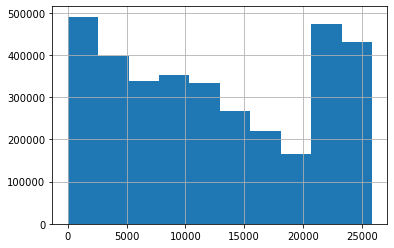

C:\Users\HS213EJ\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


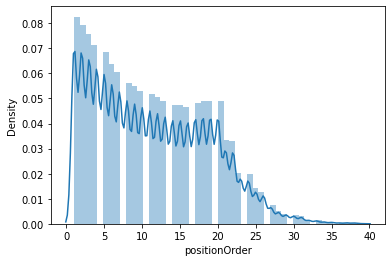

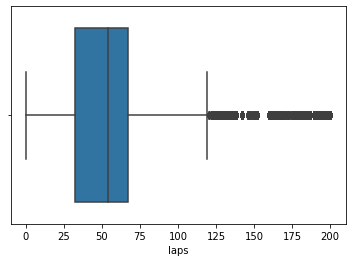

In [103]:
# Una vez tenemos el dataframe tratado, procedemos a realizar la visulaización de los datos para poder analizar el dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_f1data['resultId'].hist()
plt.show()

sns.distplot(df_f1data['positionOrder'])
plt.show()

sns.boxplot(x=df_f1data['laps'])
plt.show()


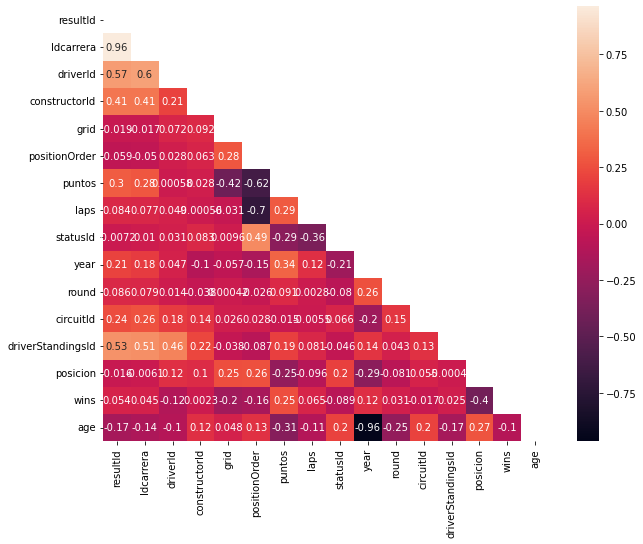

In [104]:
#Creamos una matriz de correlación

correlations_matrix = df_f1data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


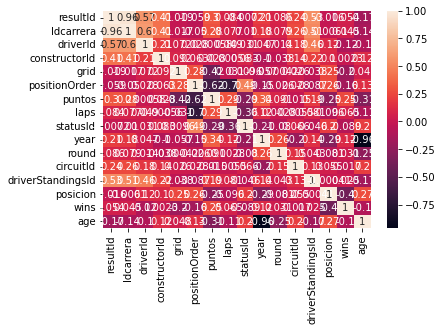

In [105]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

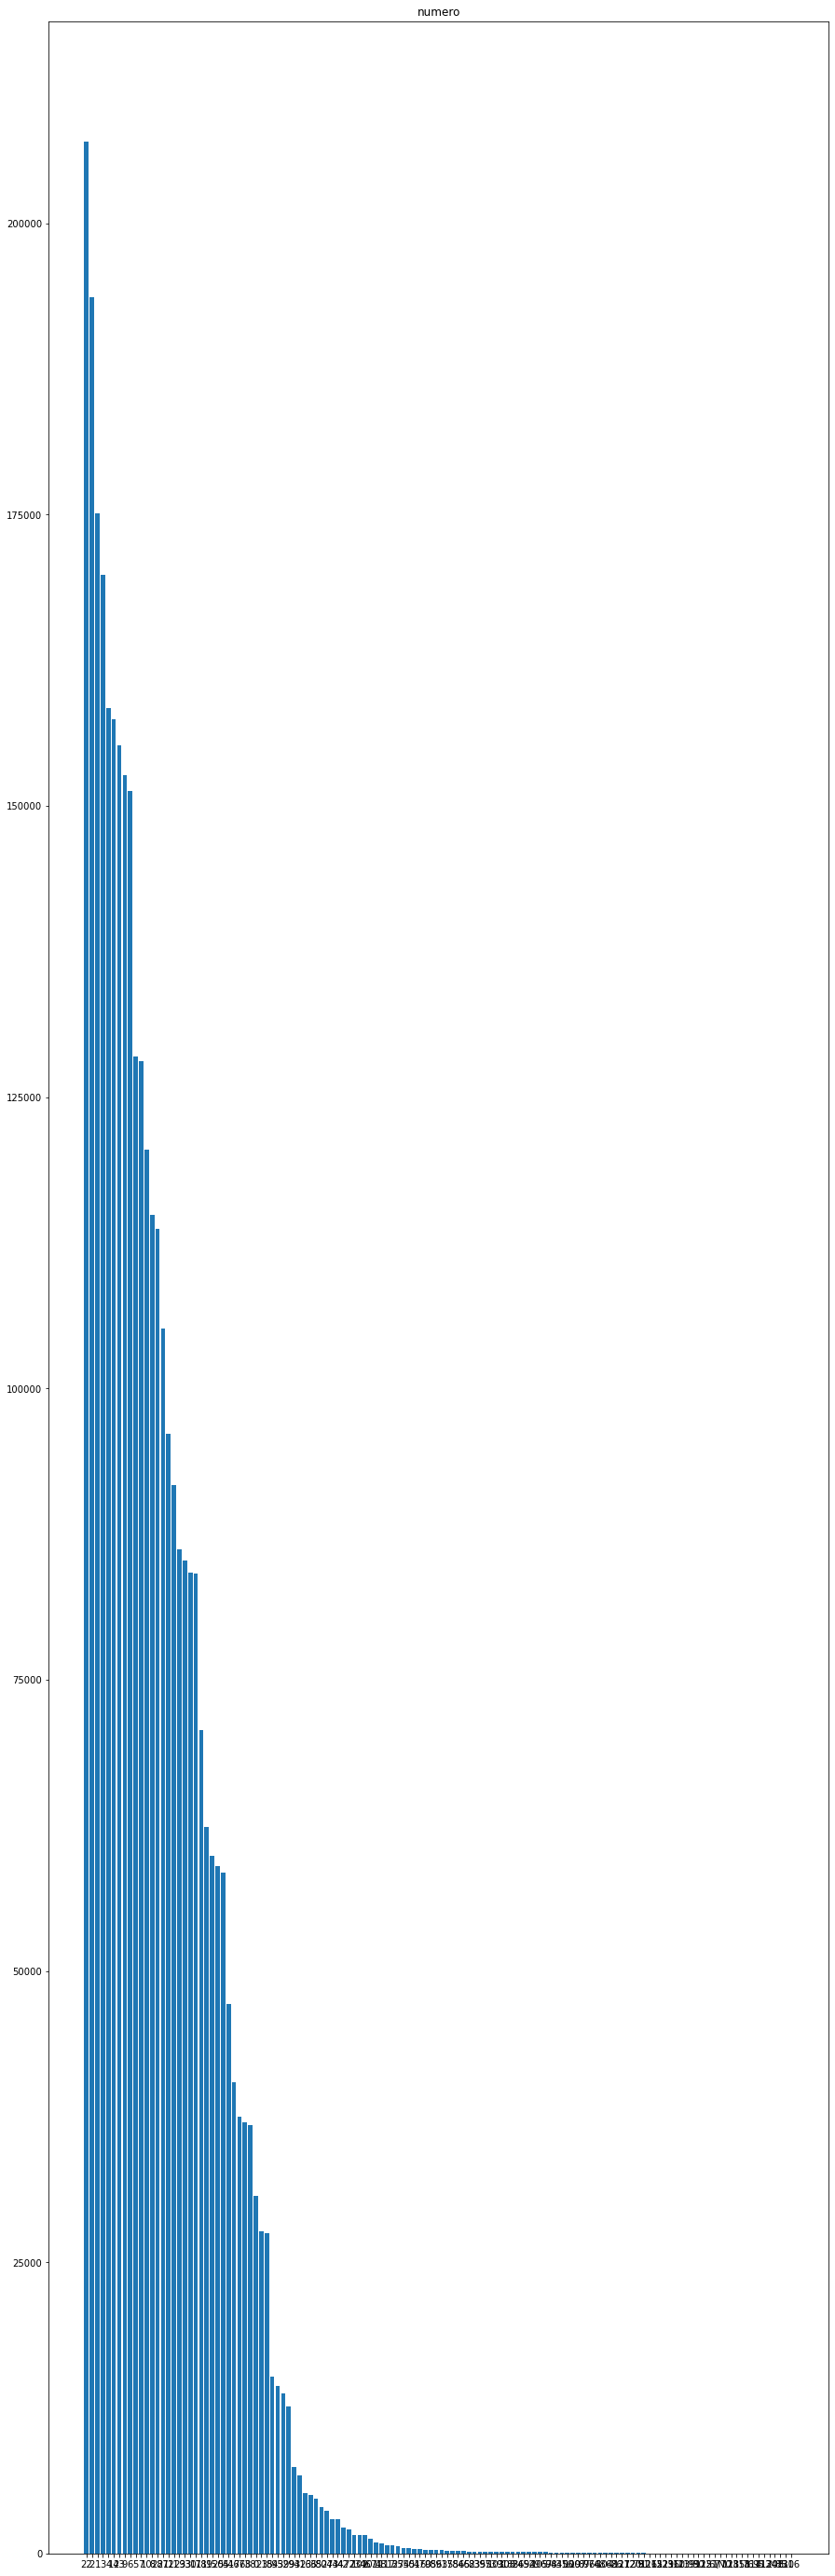

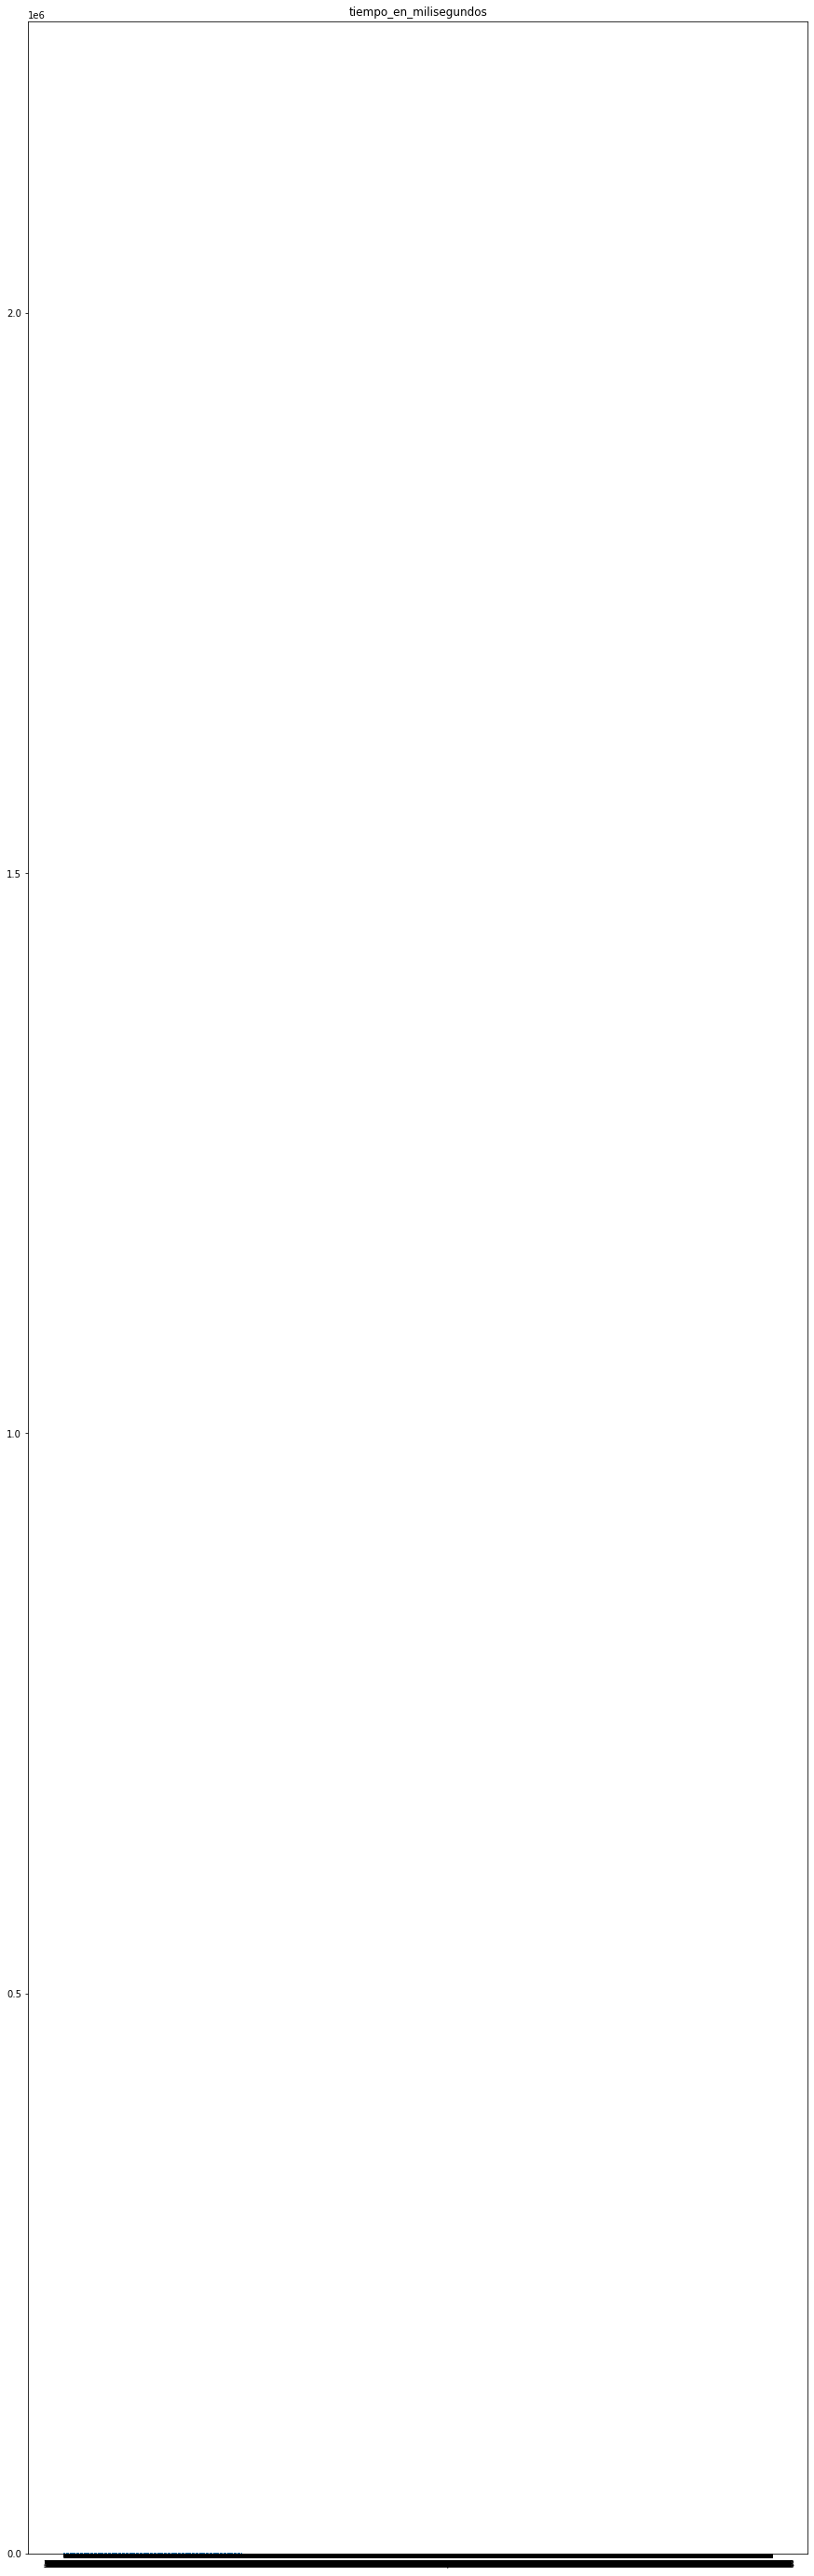

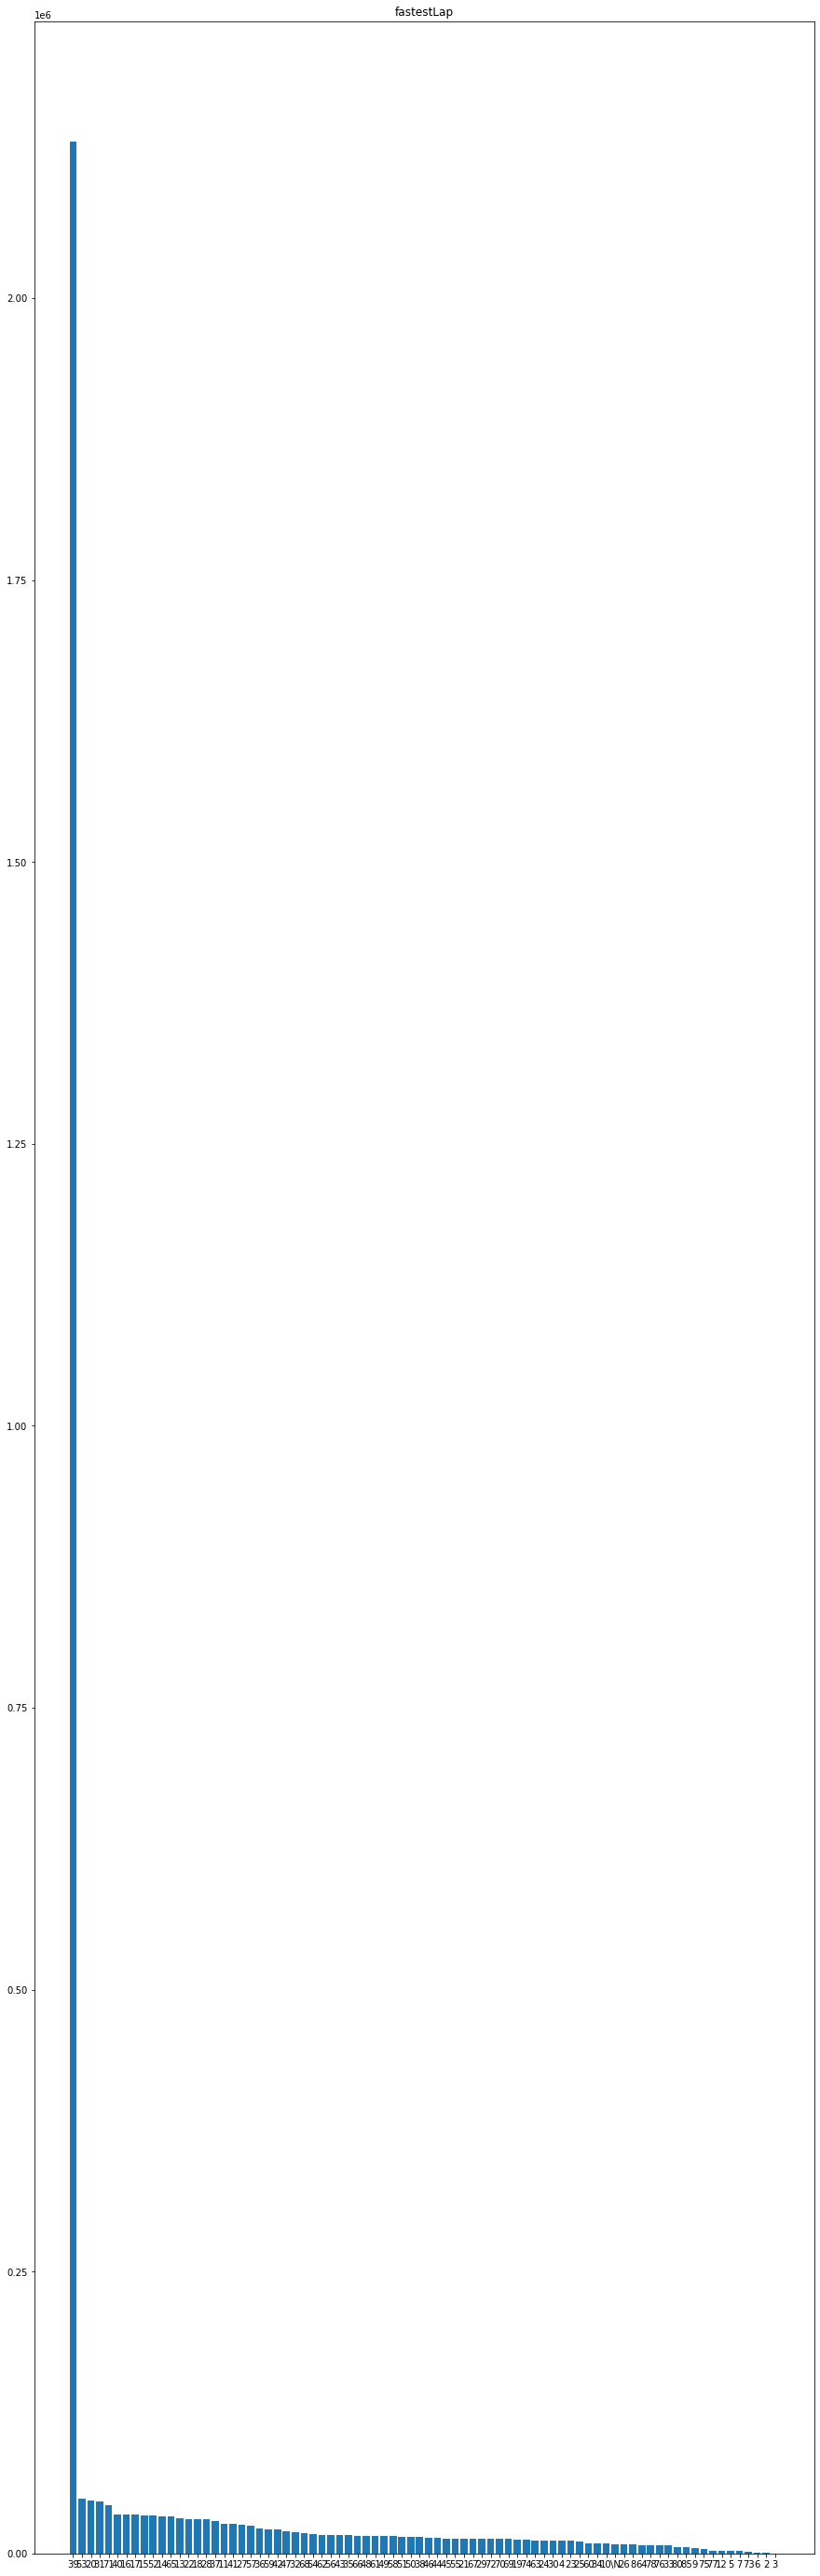

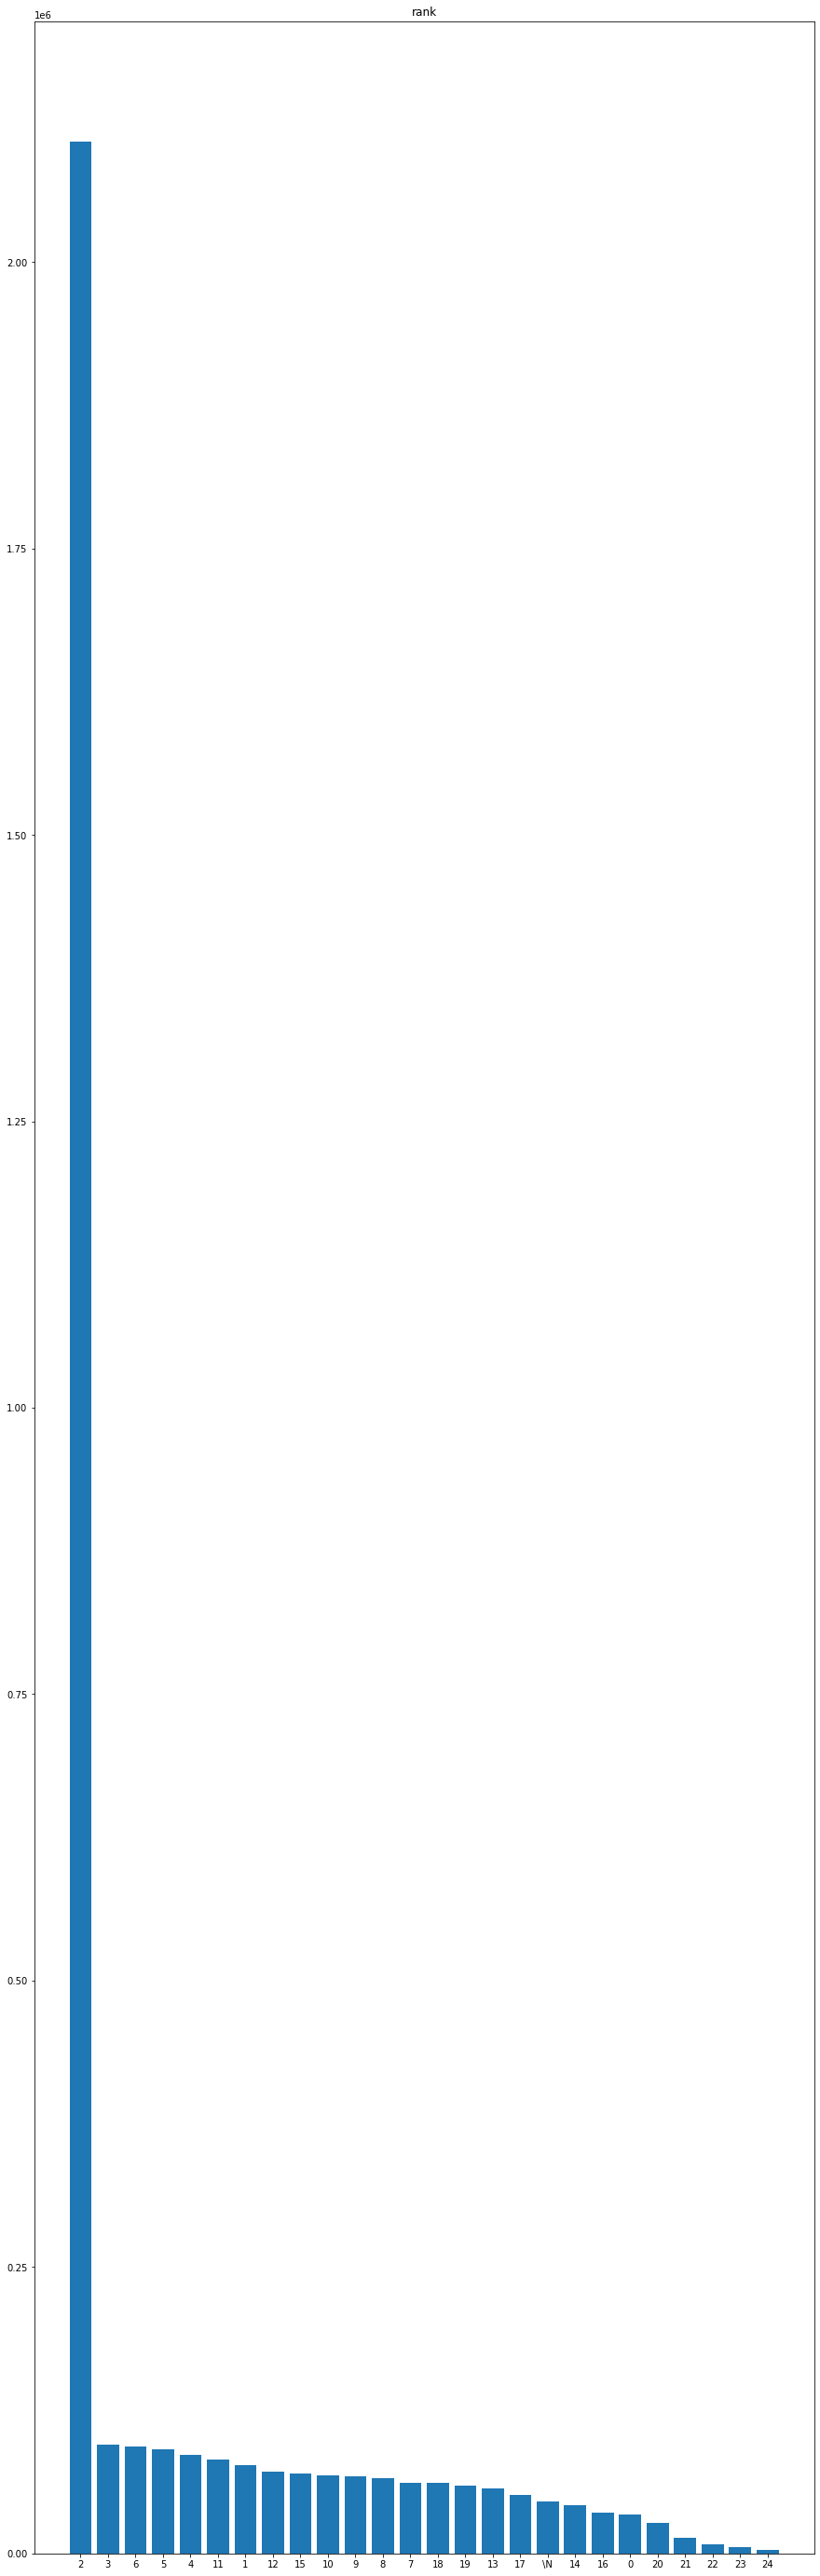

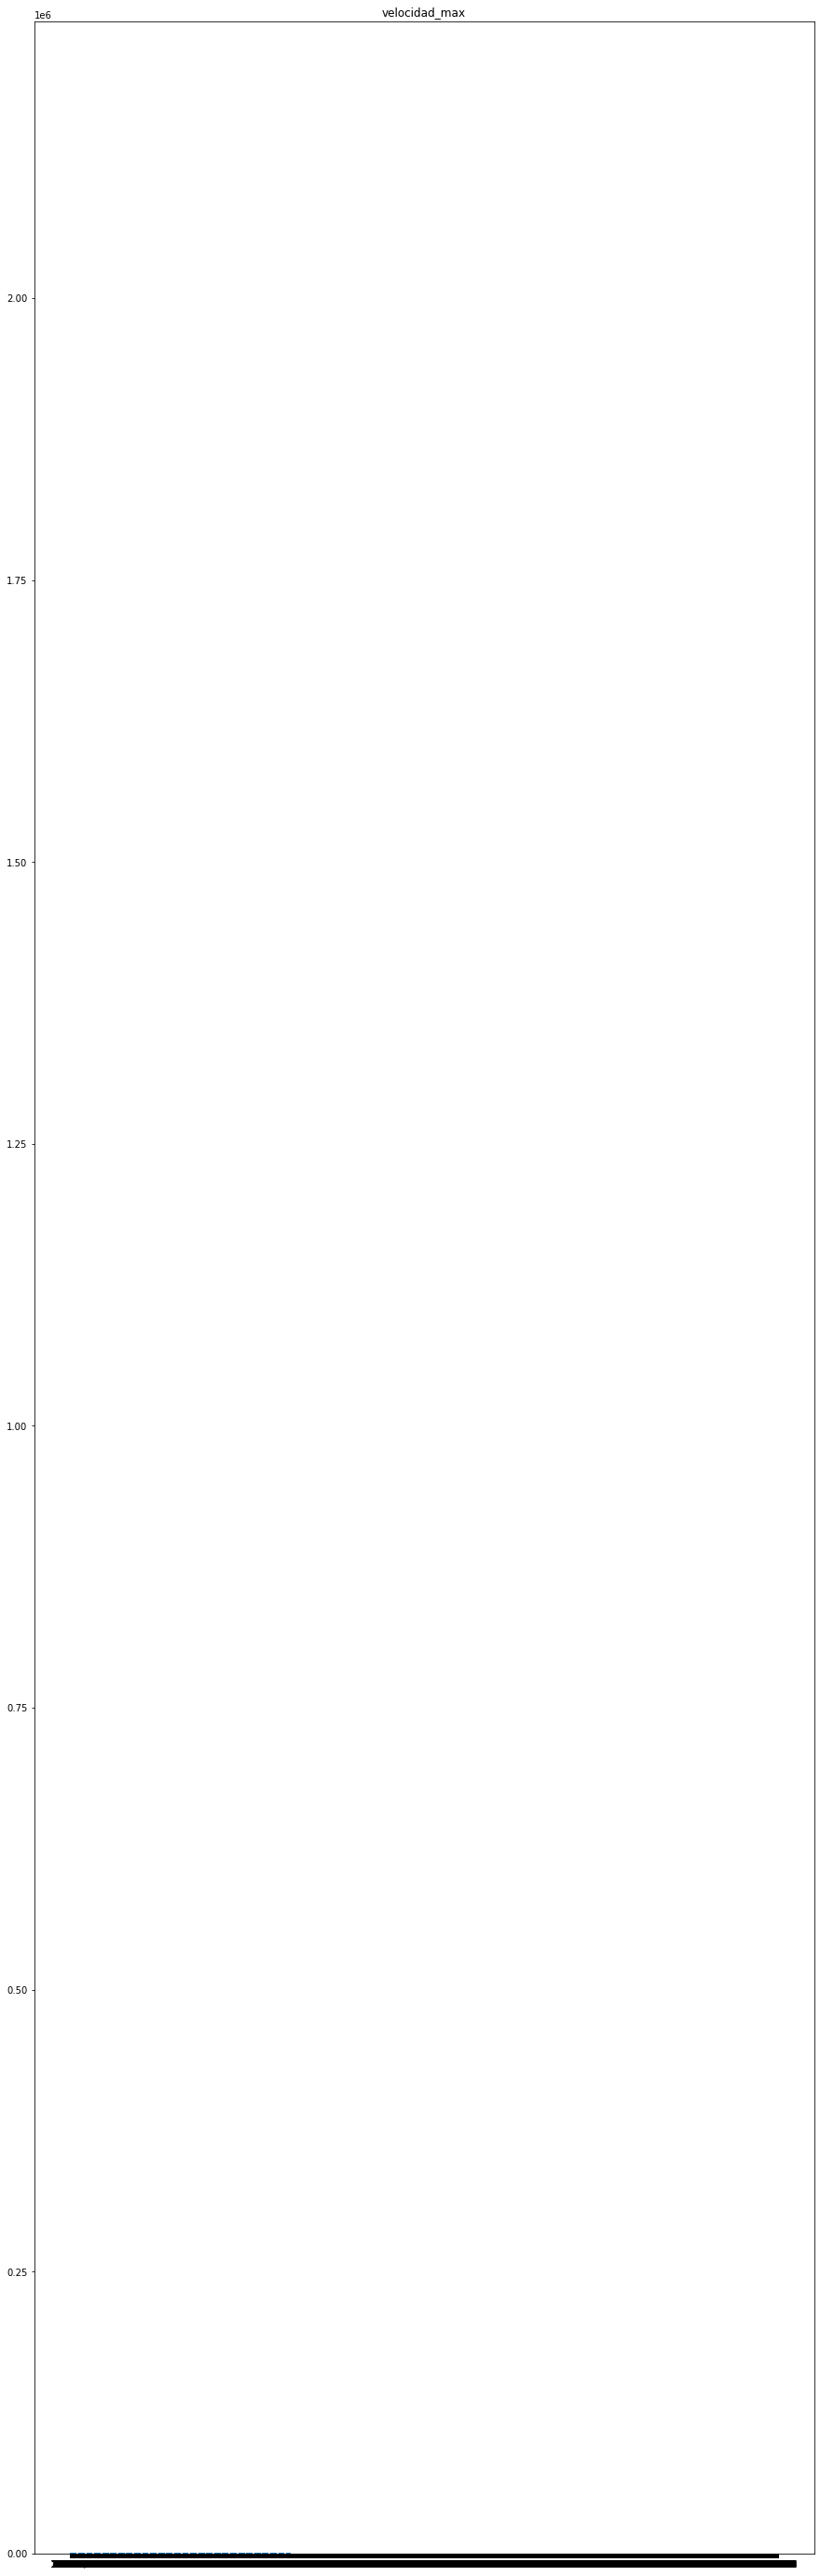

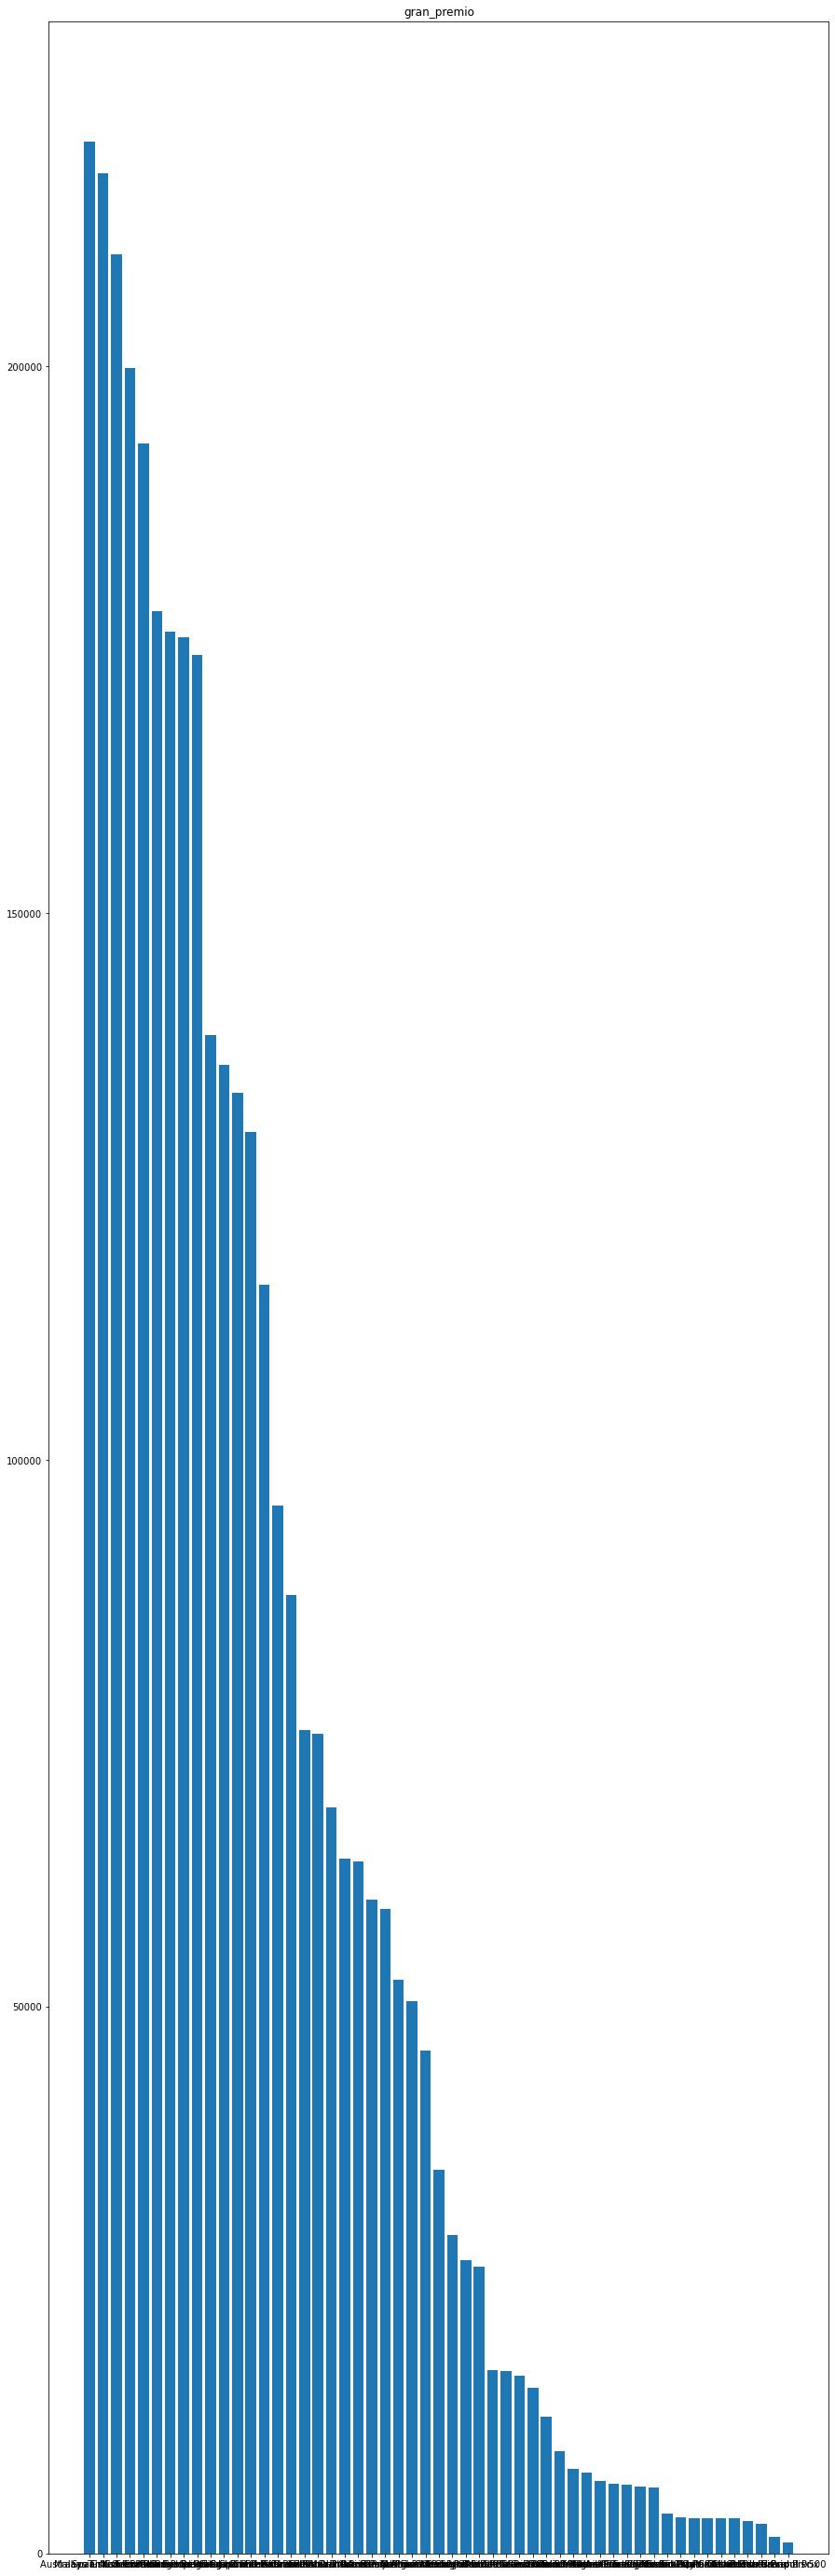

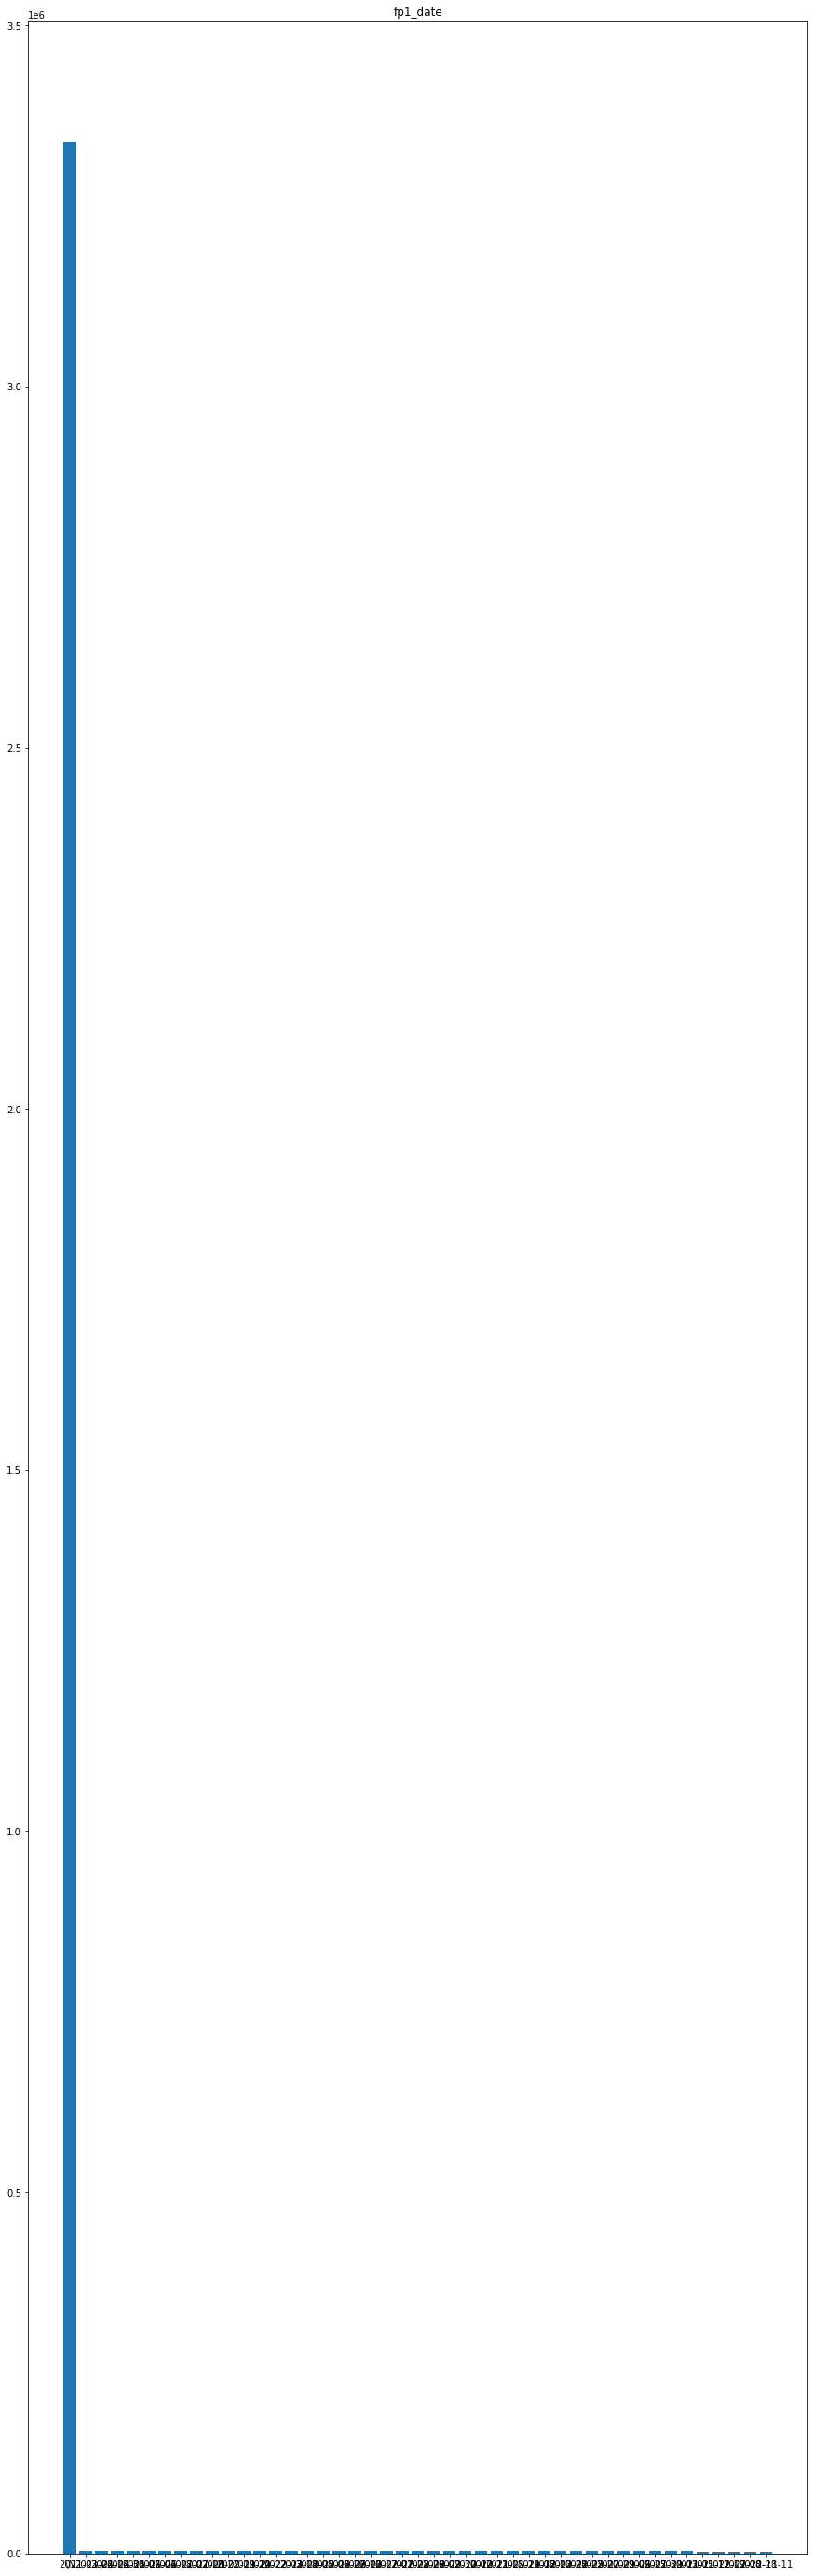

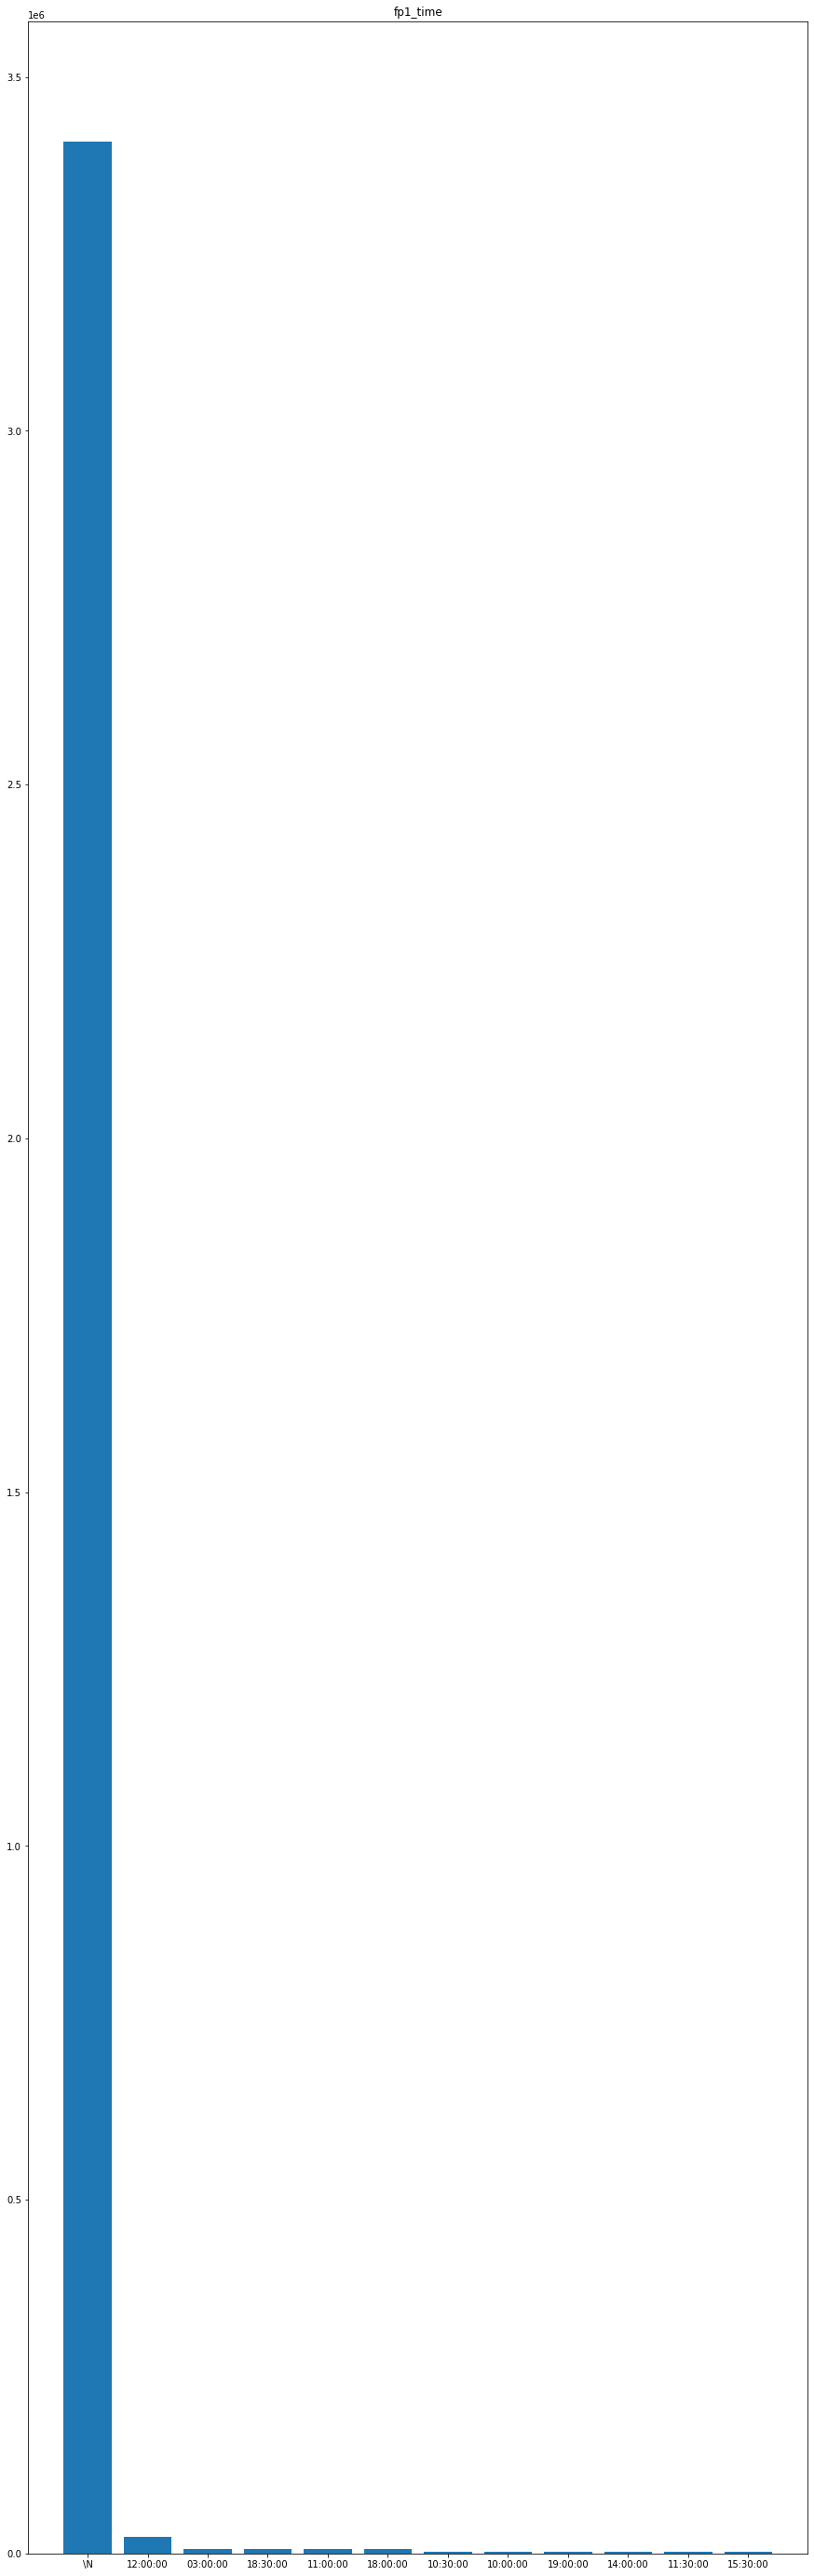

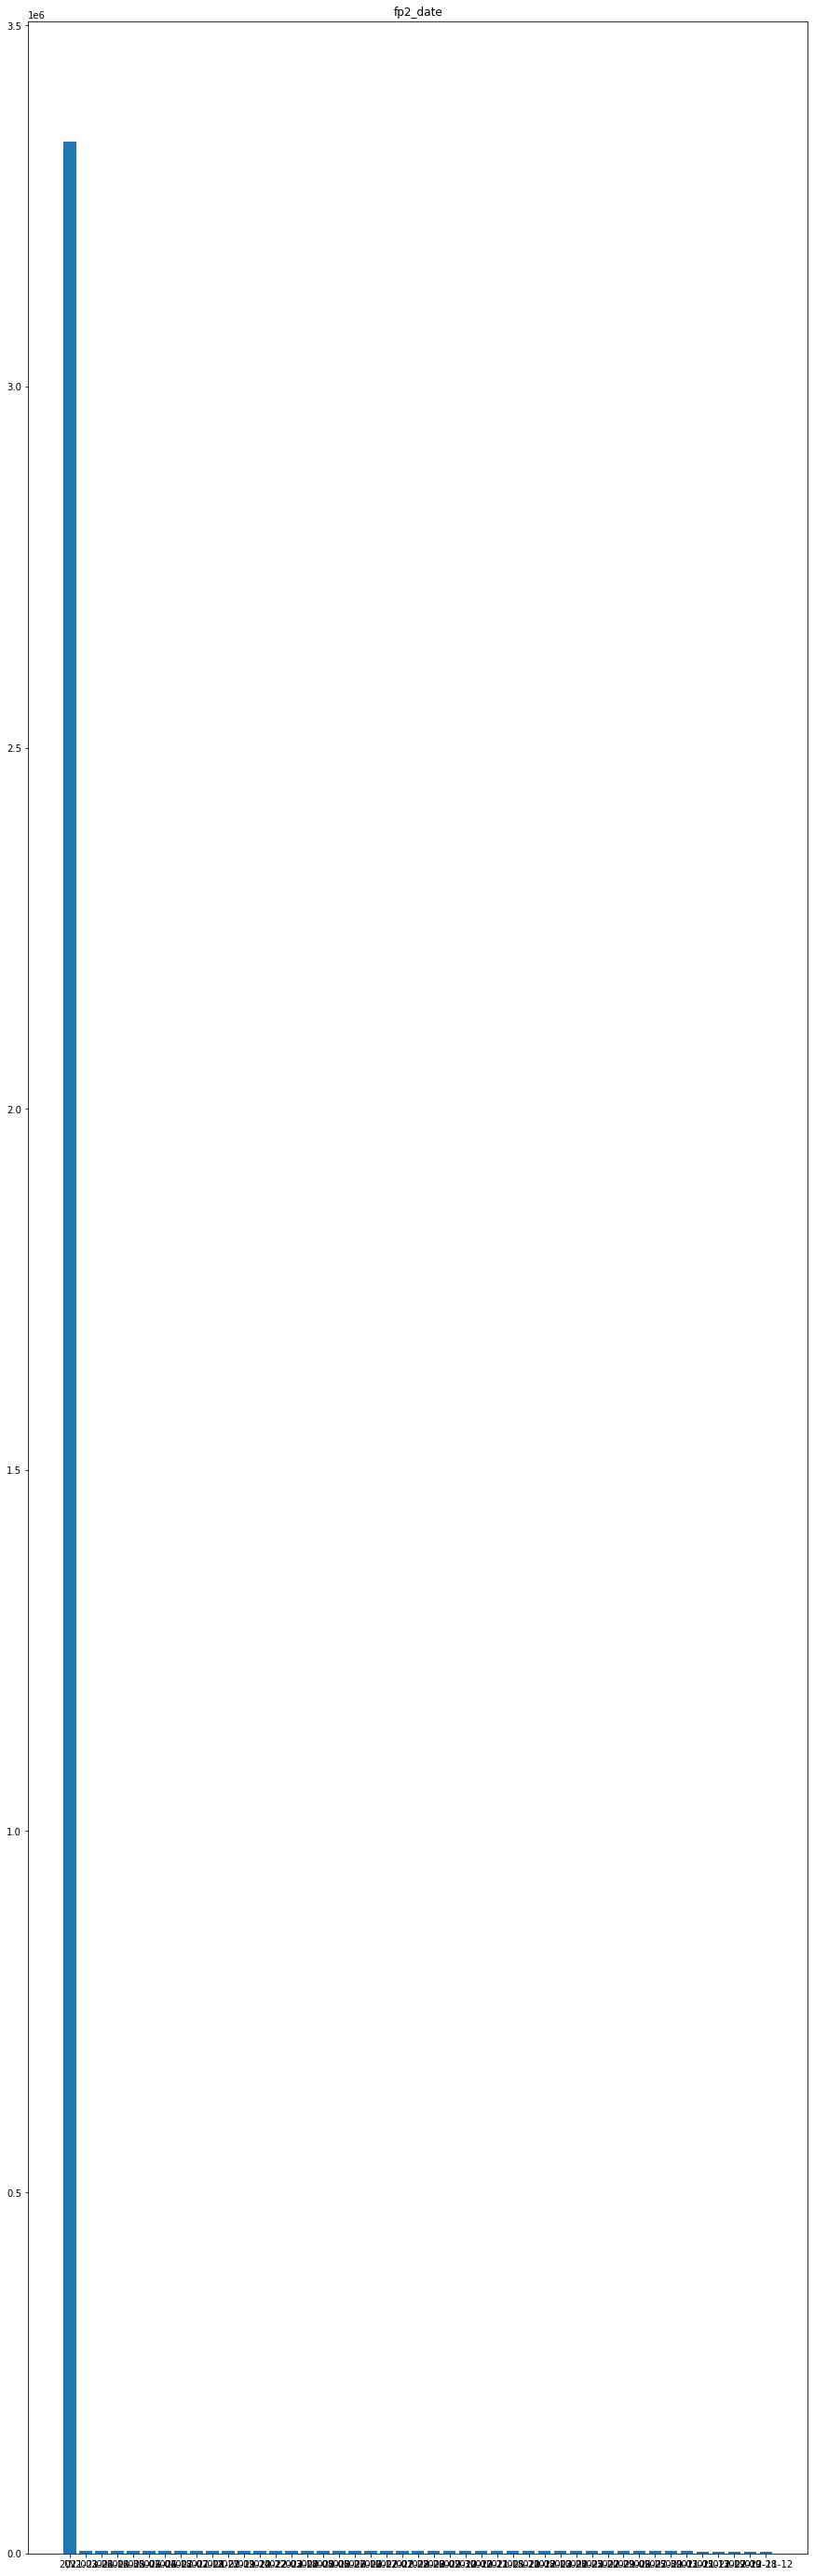

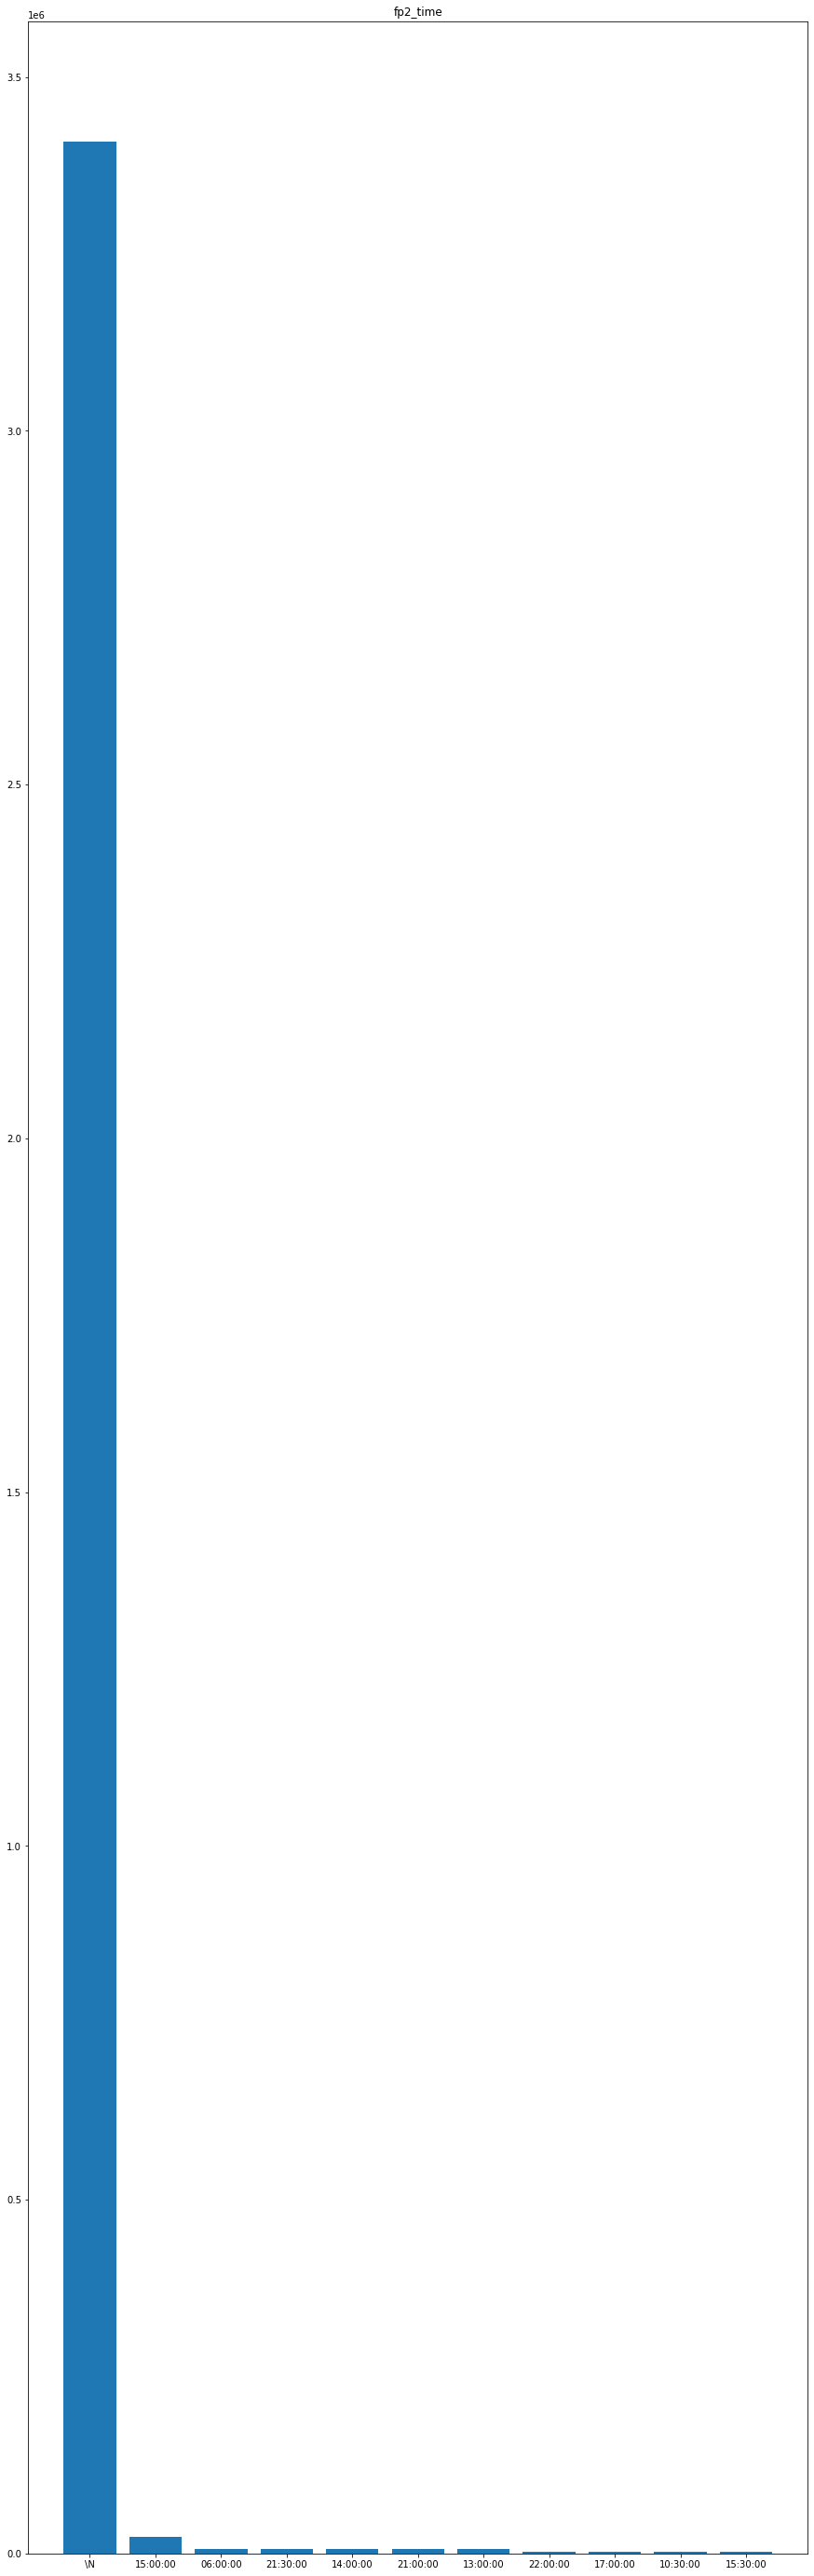

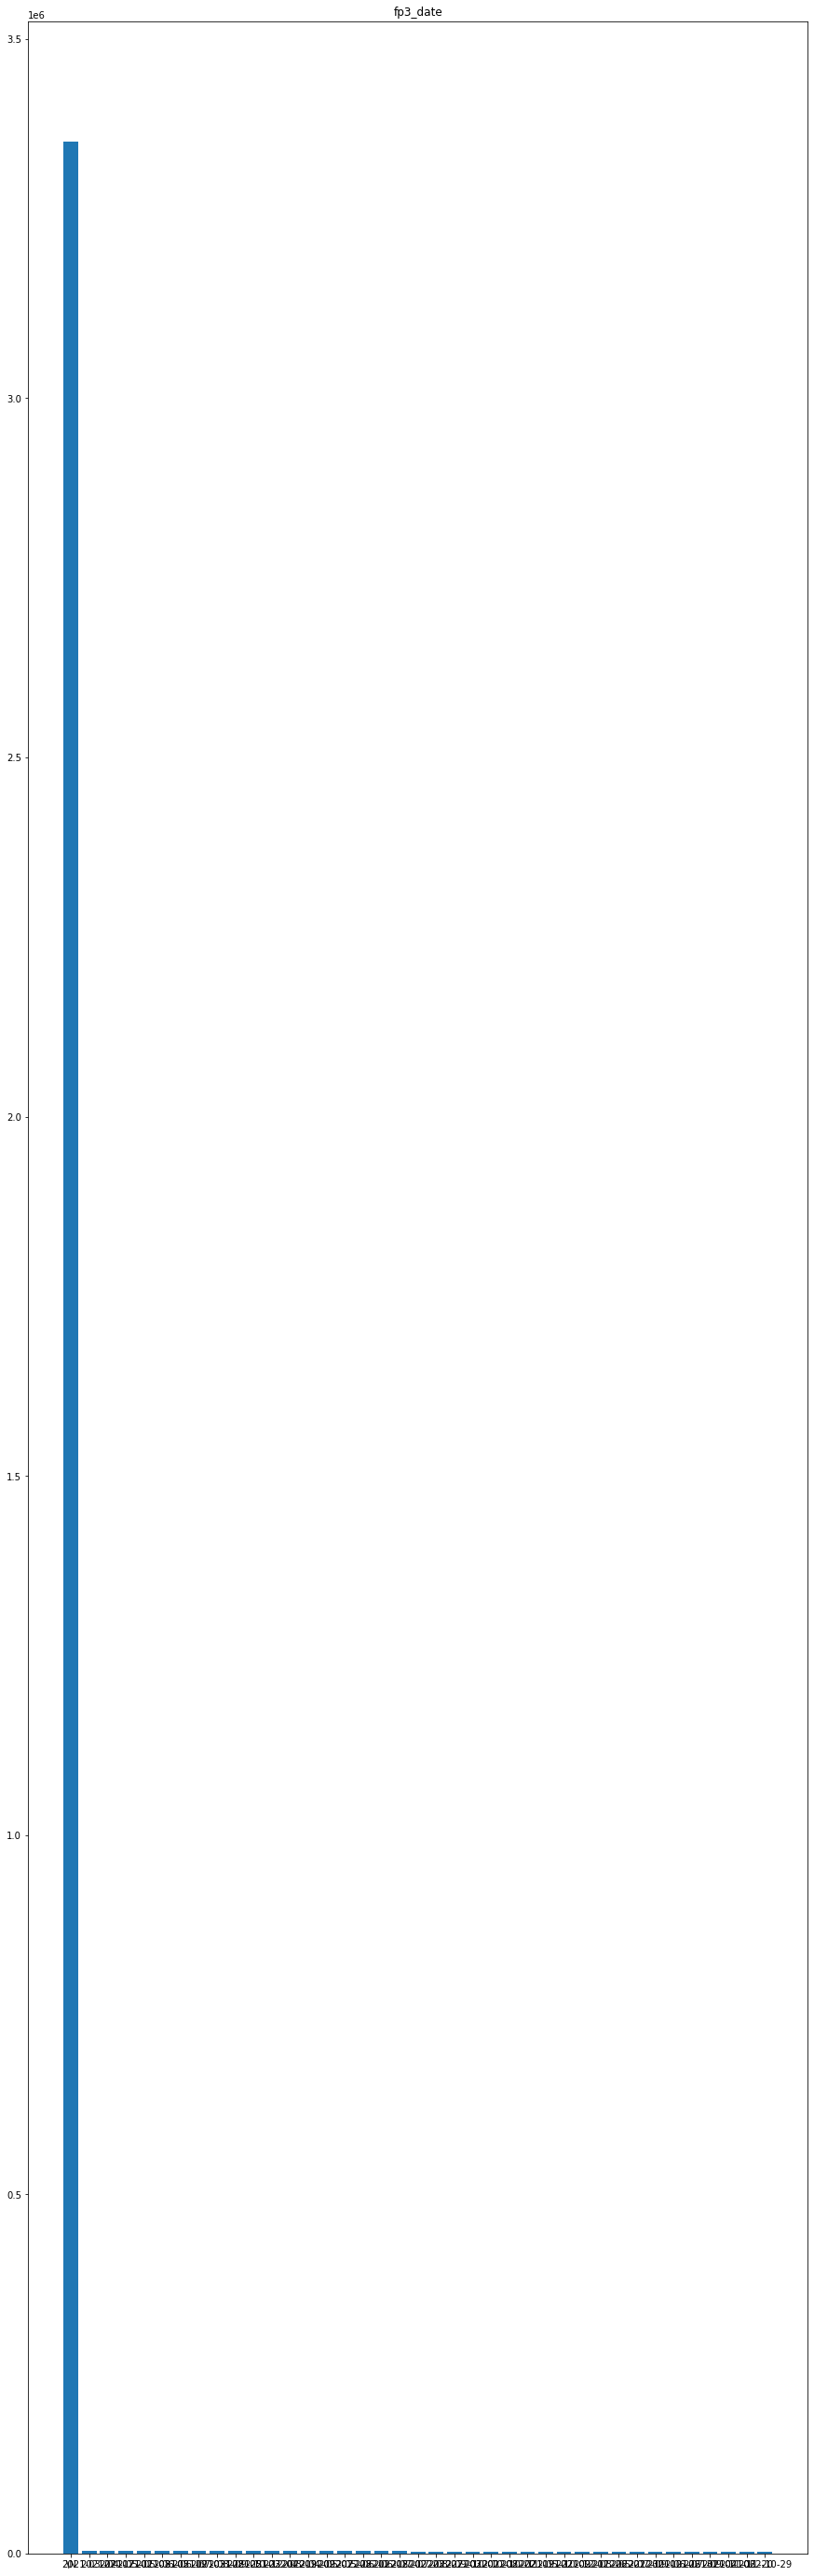

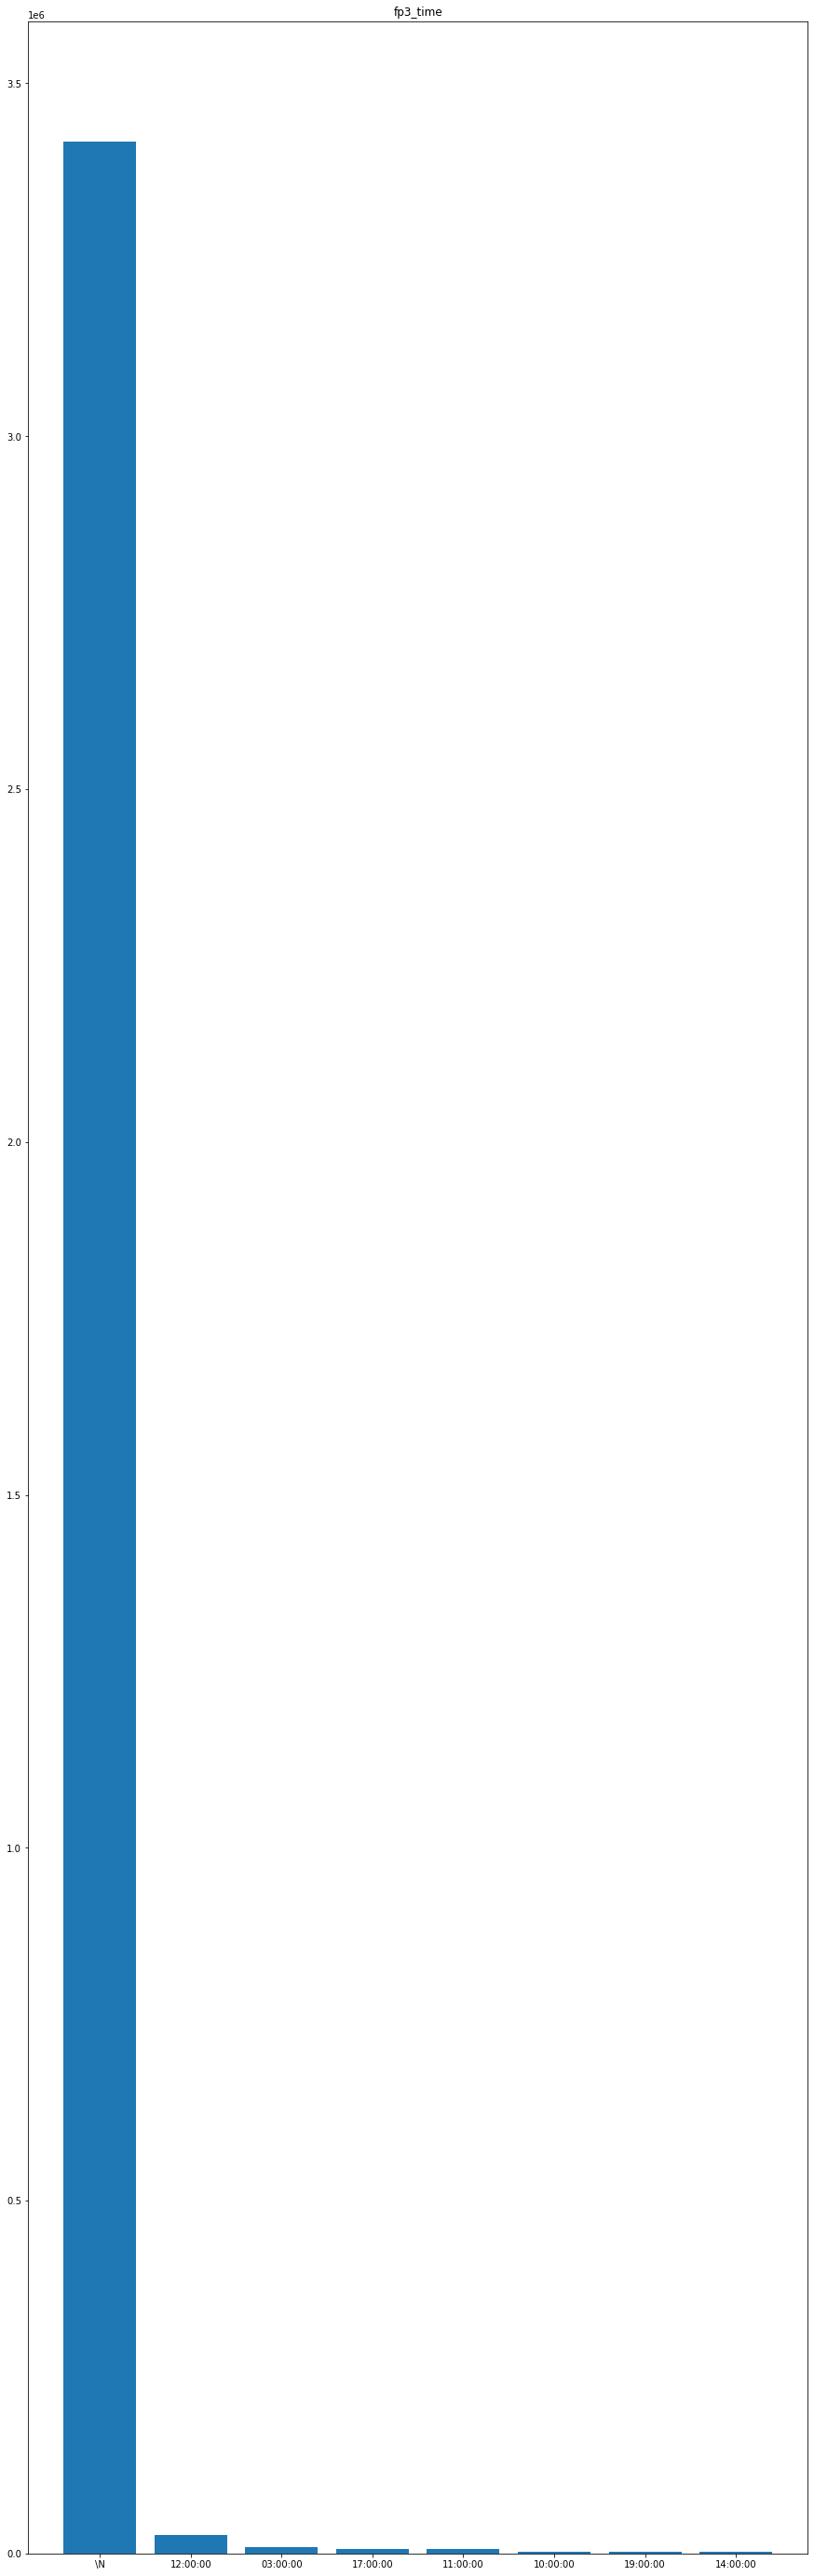

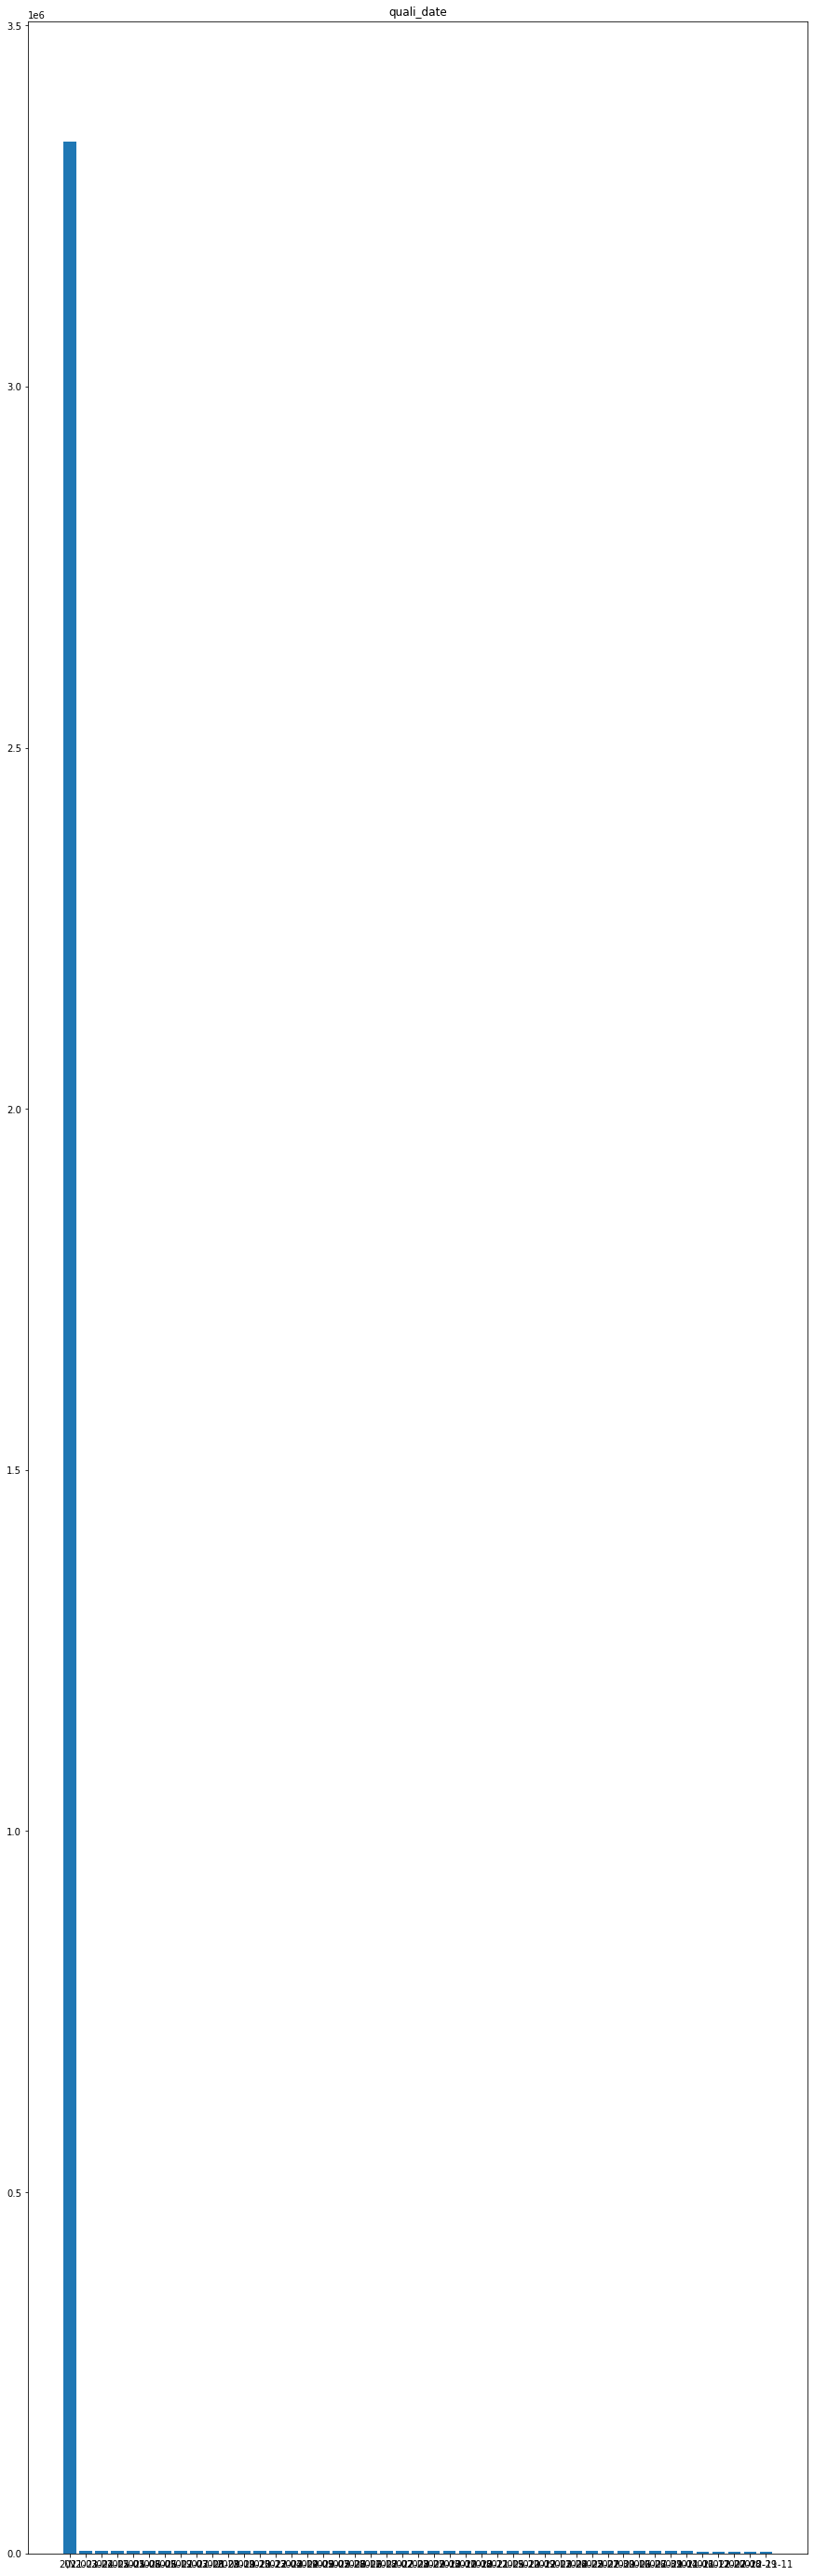

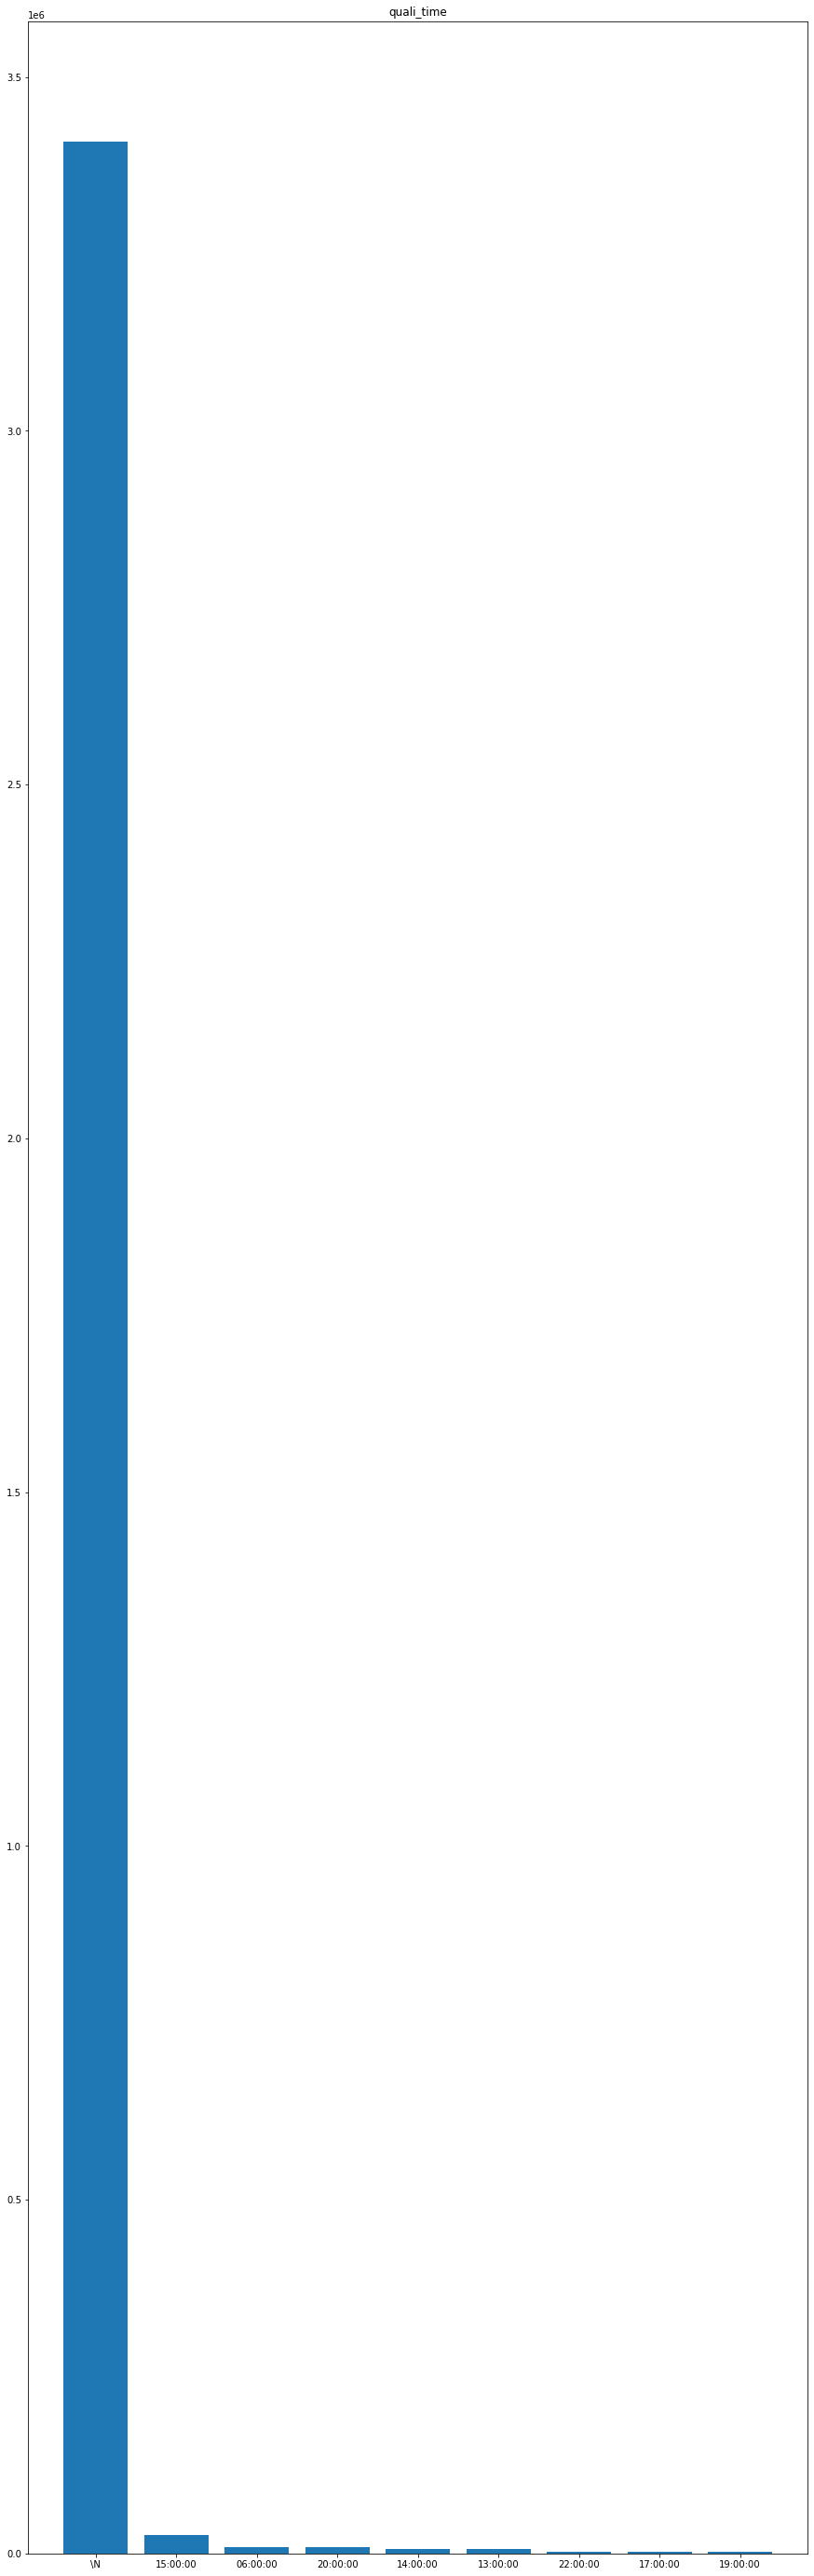

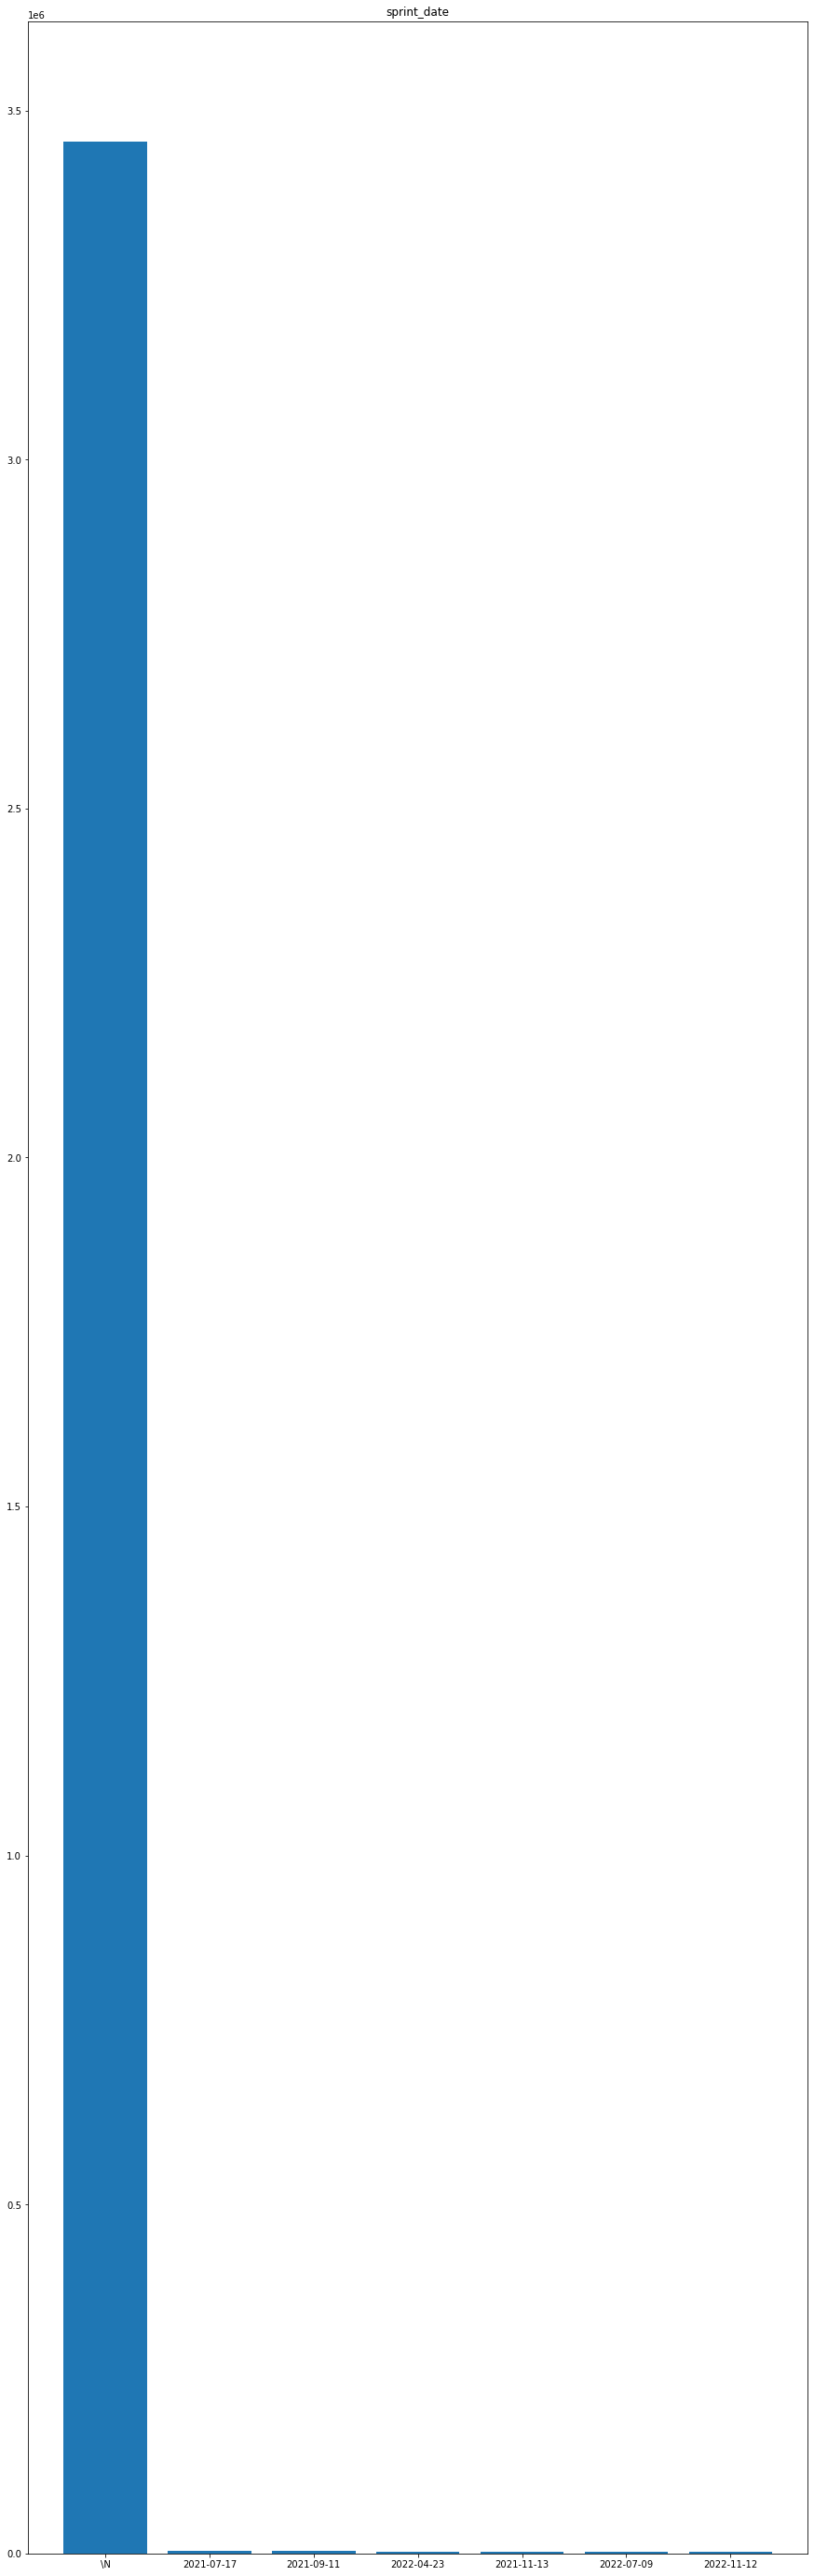

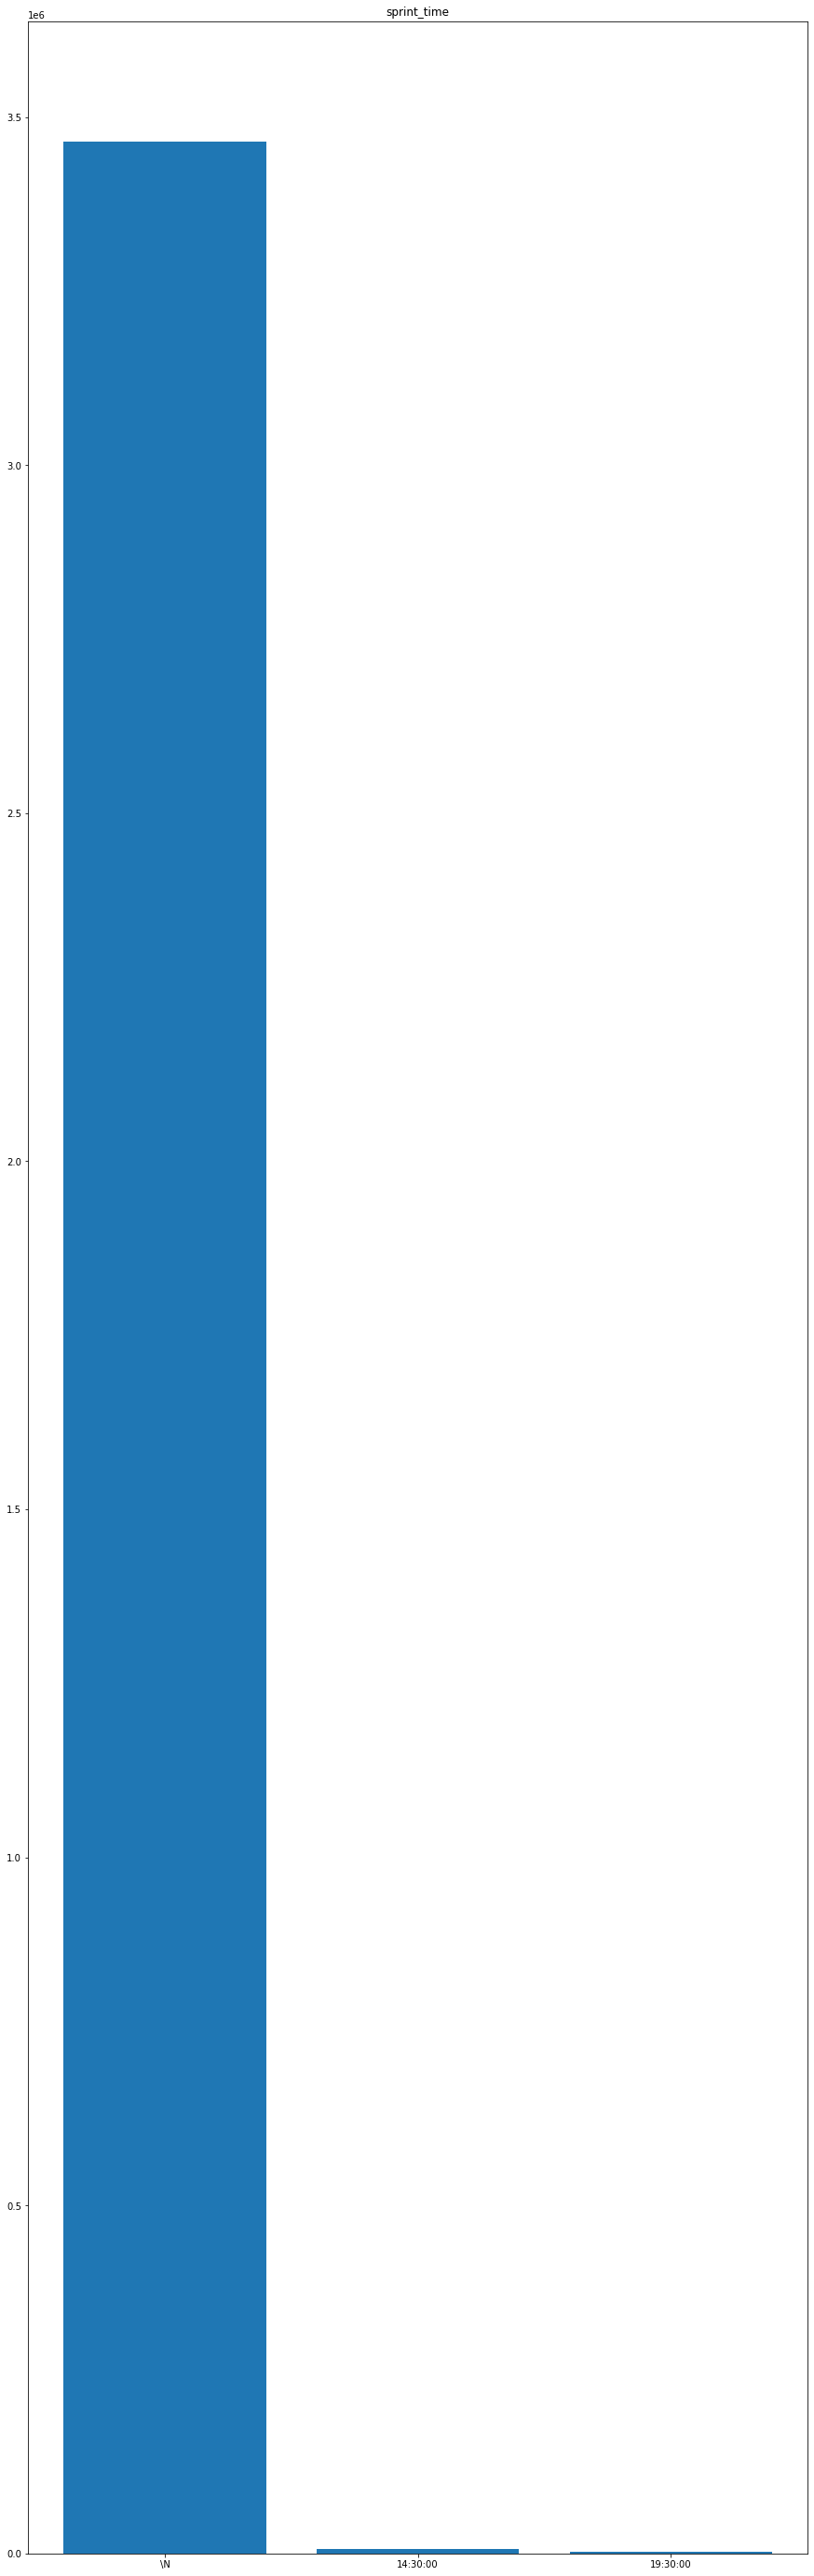

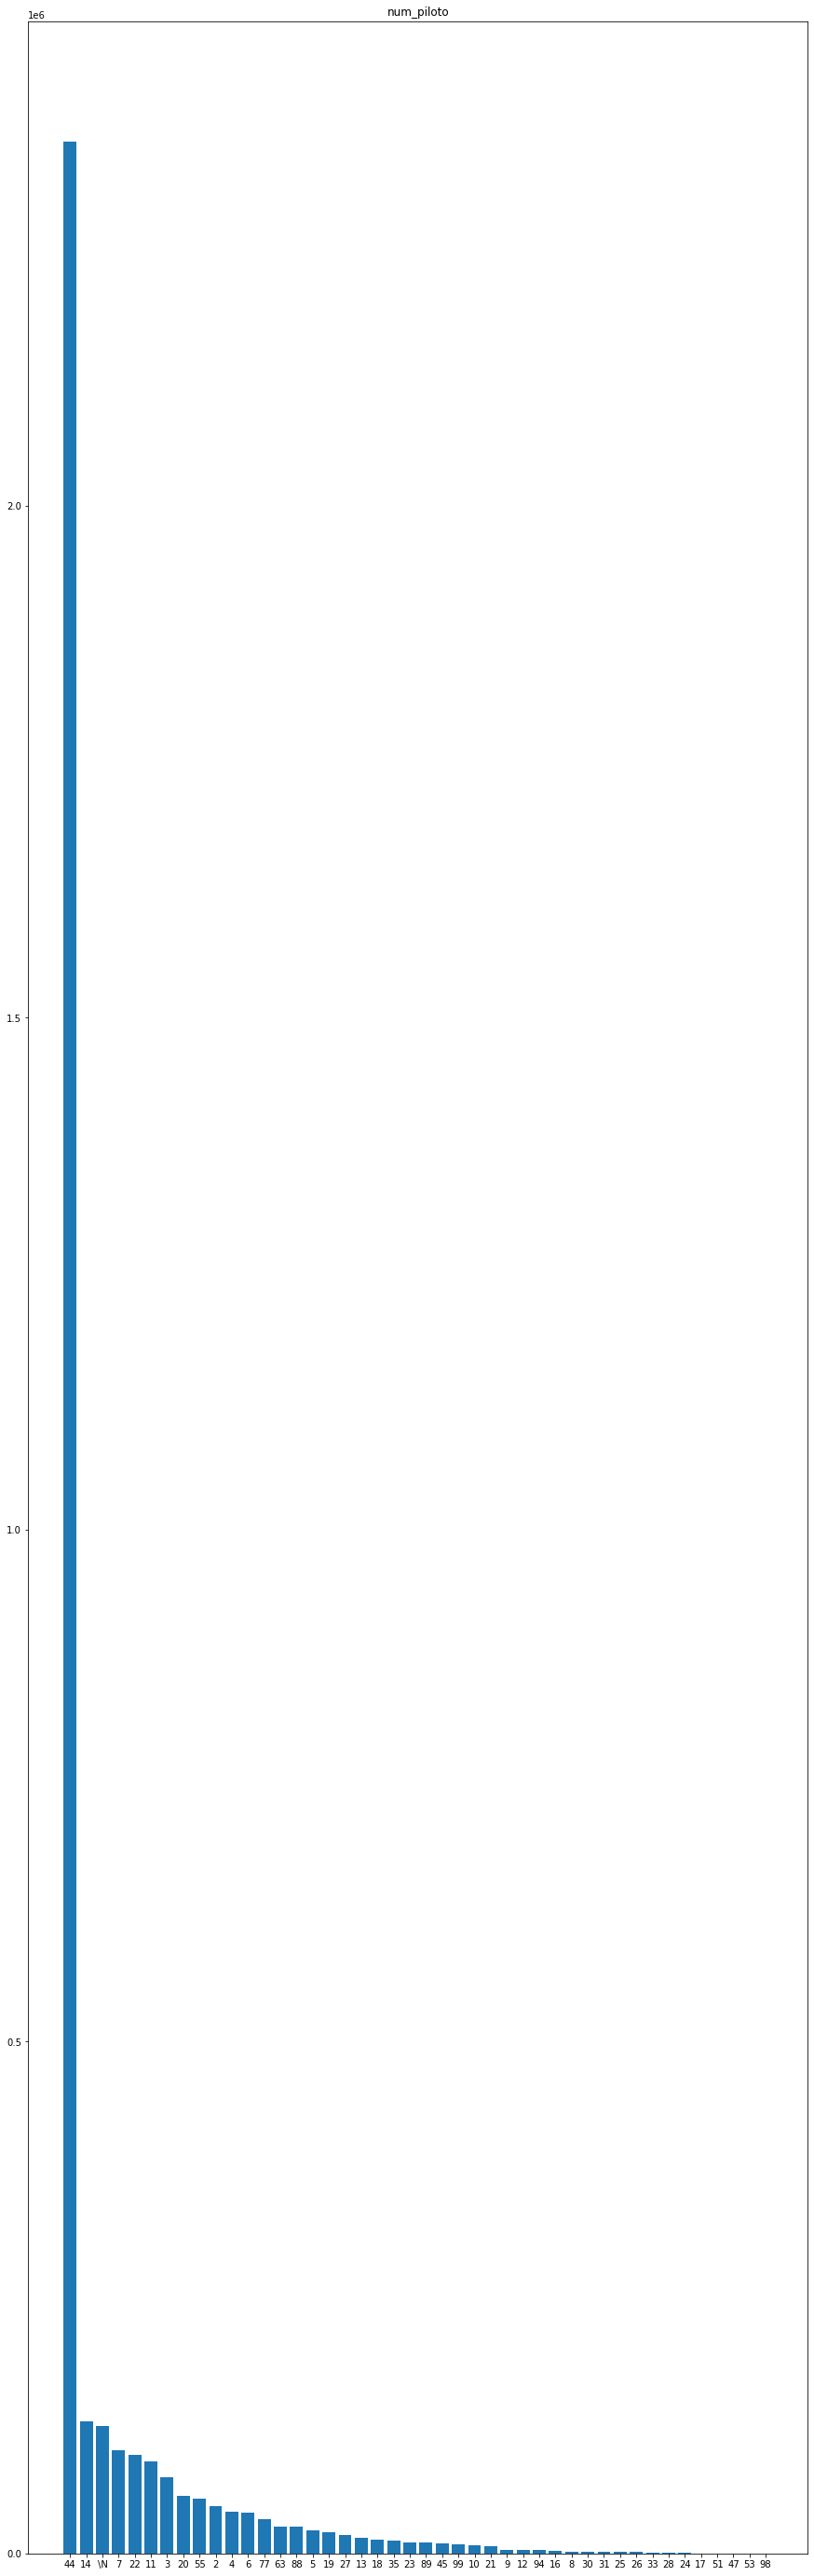

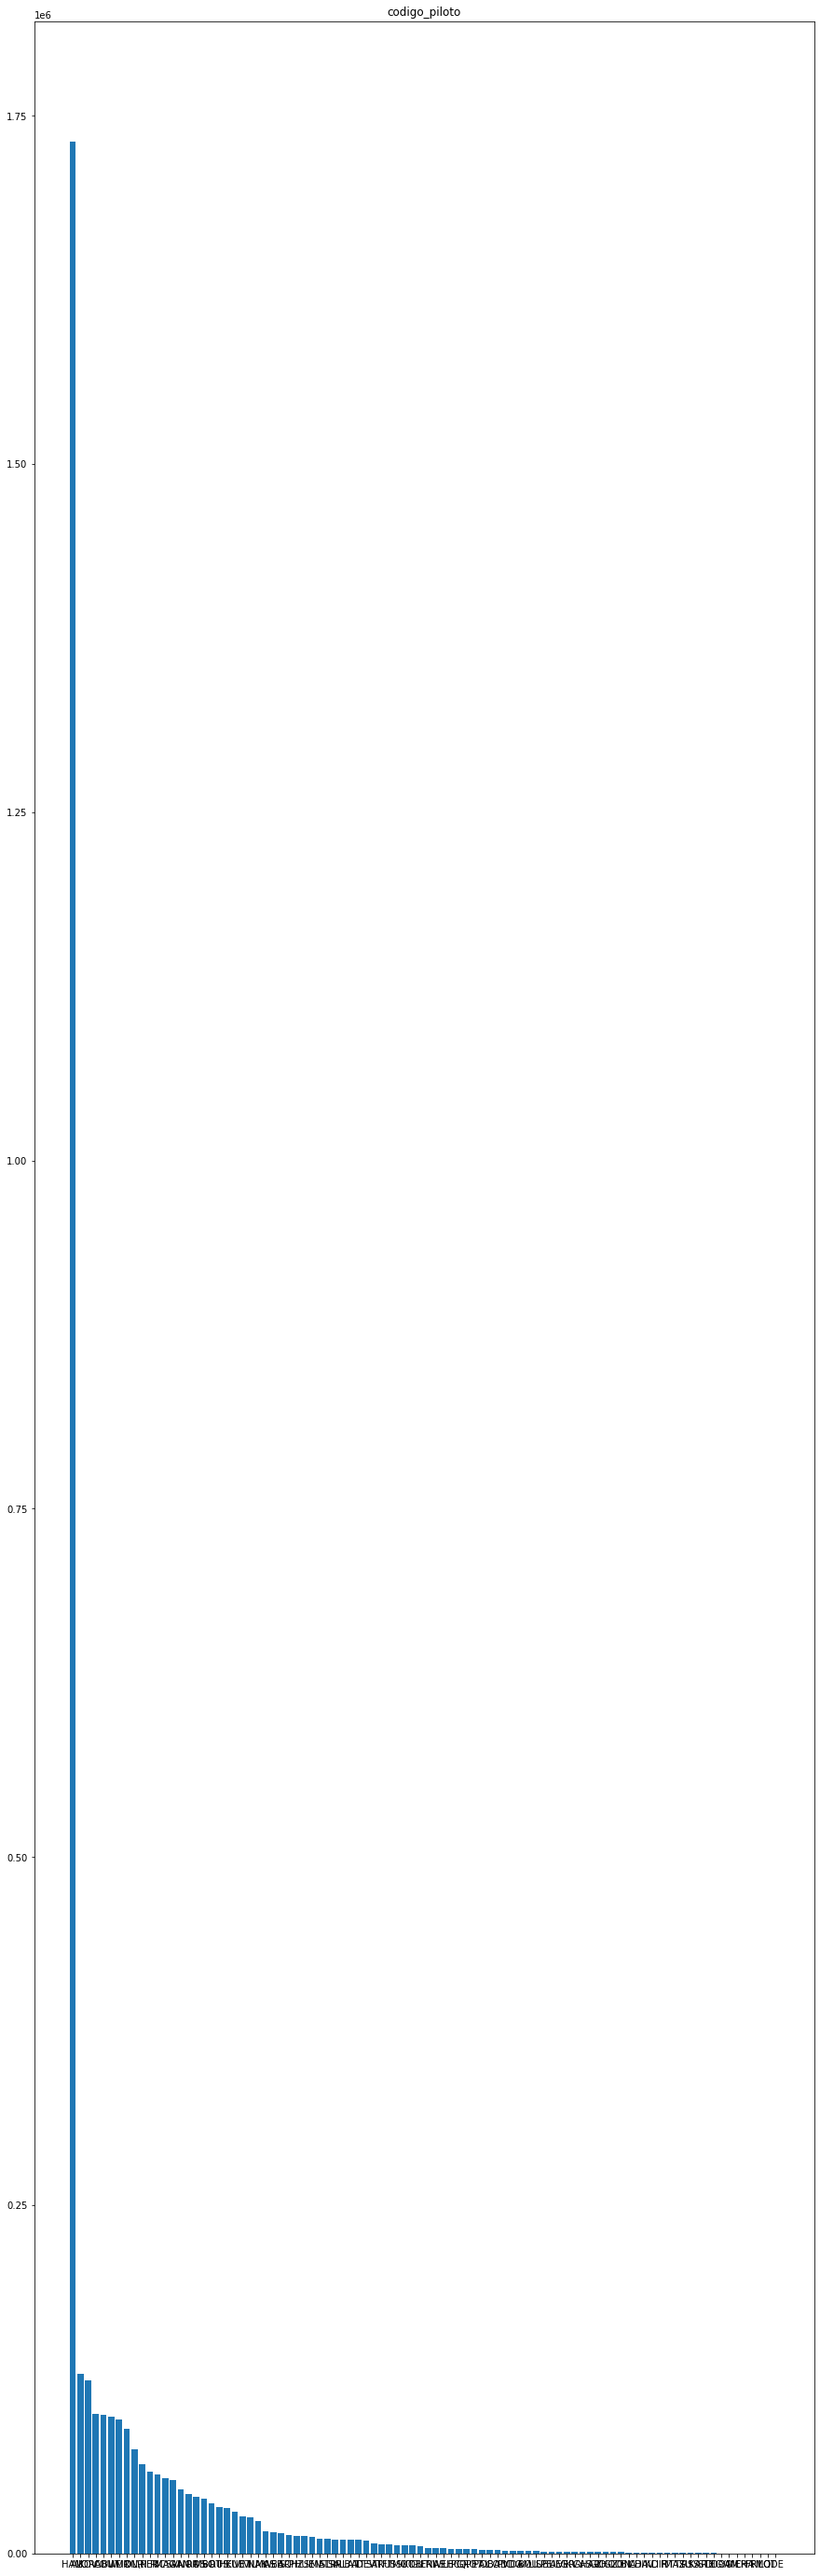

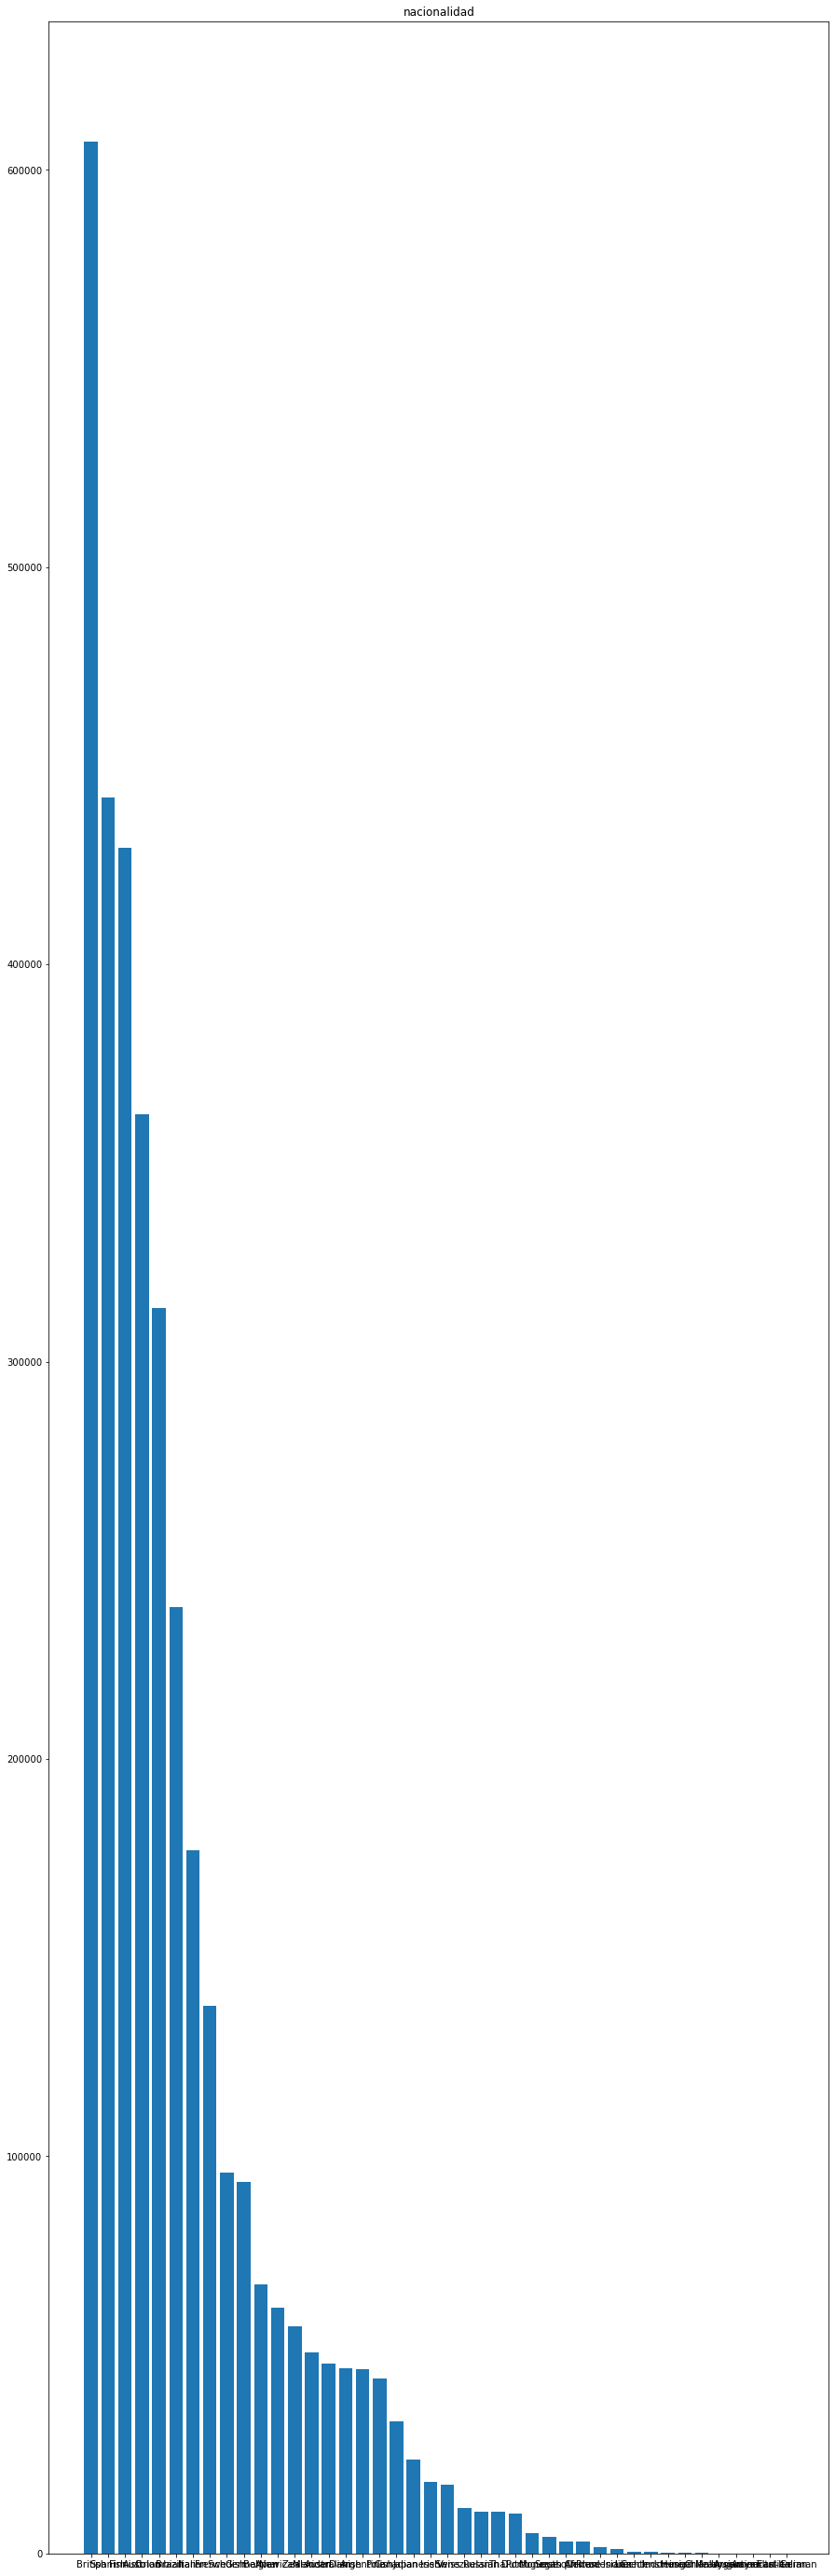

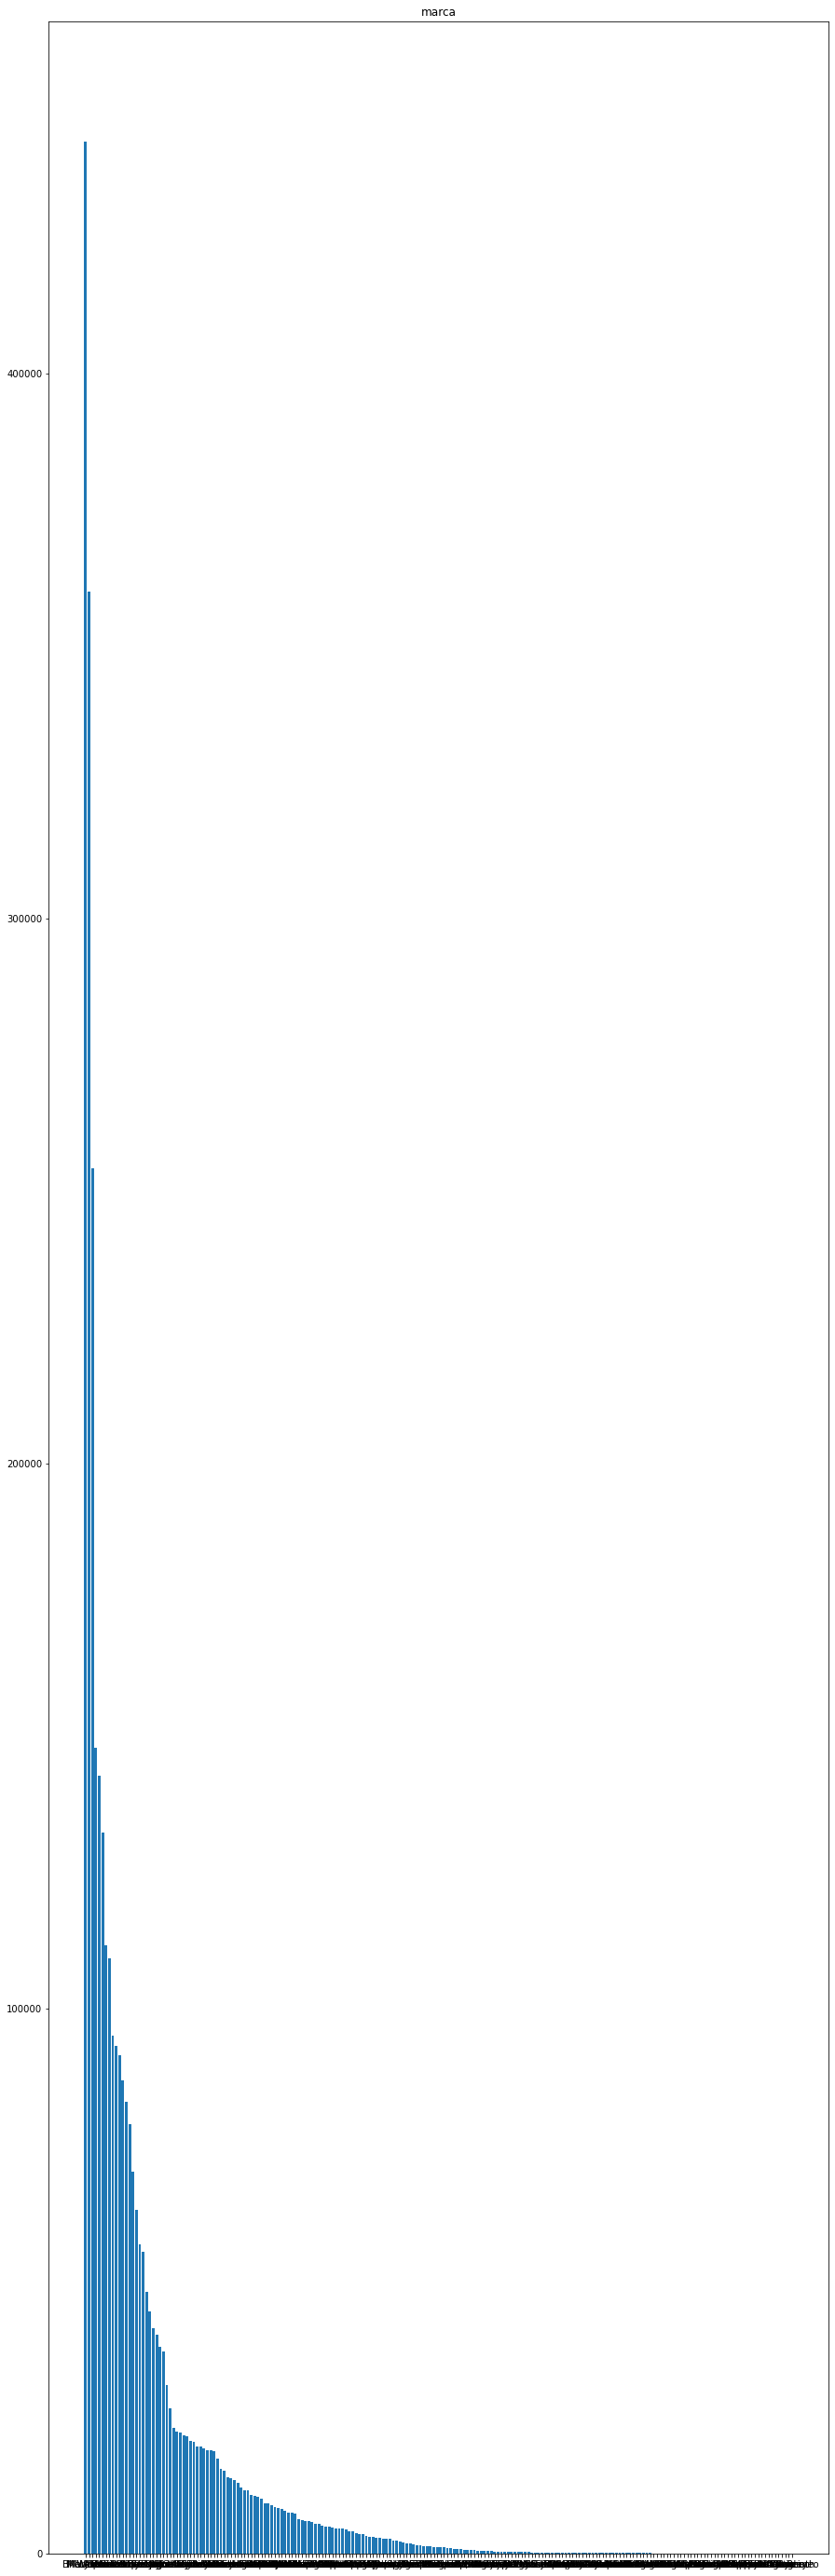

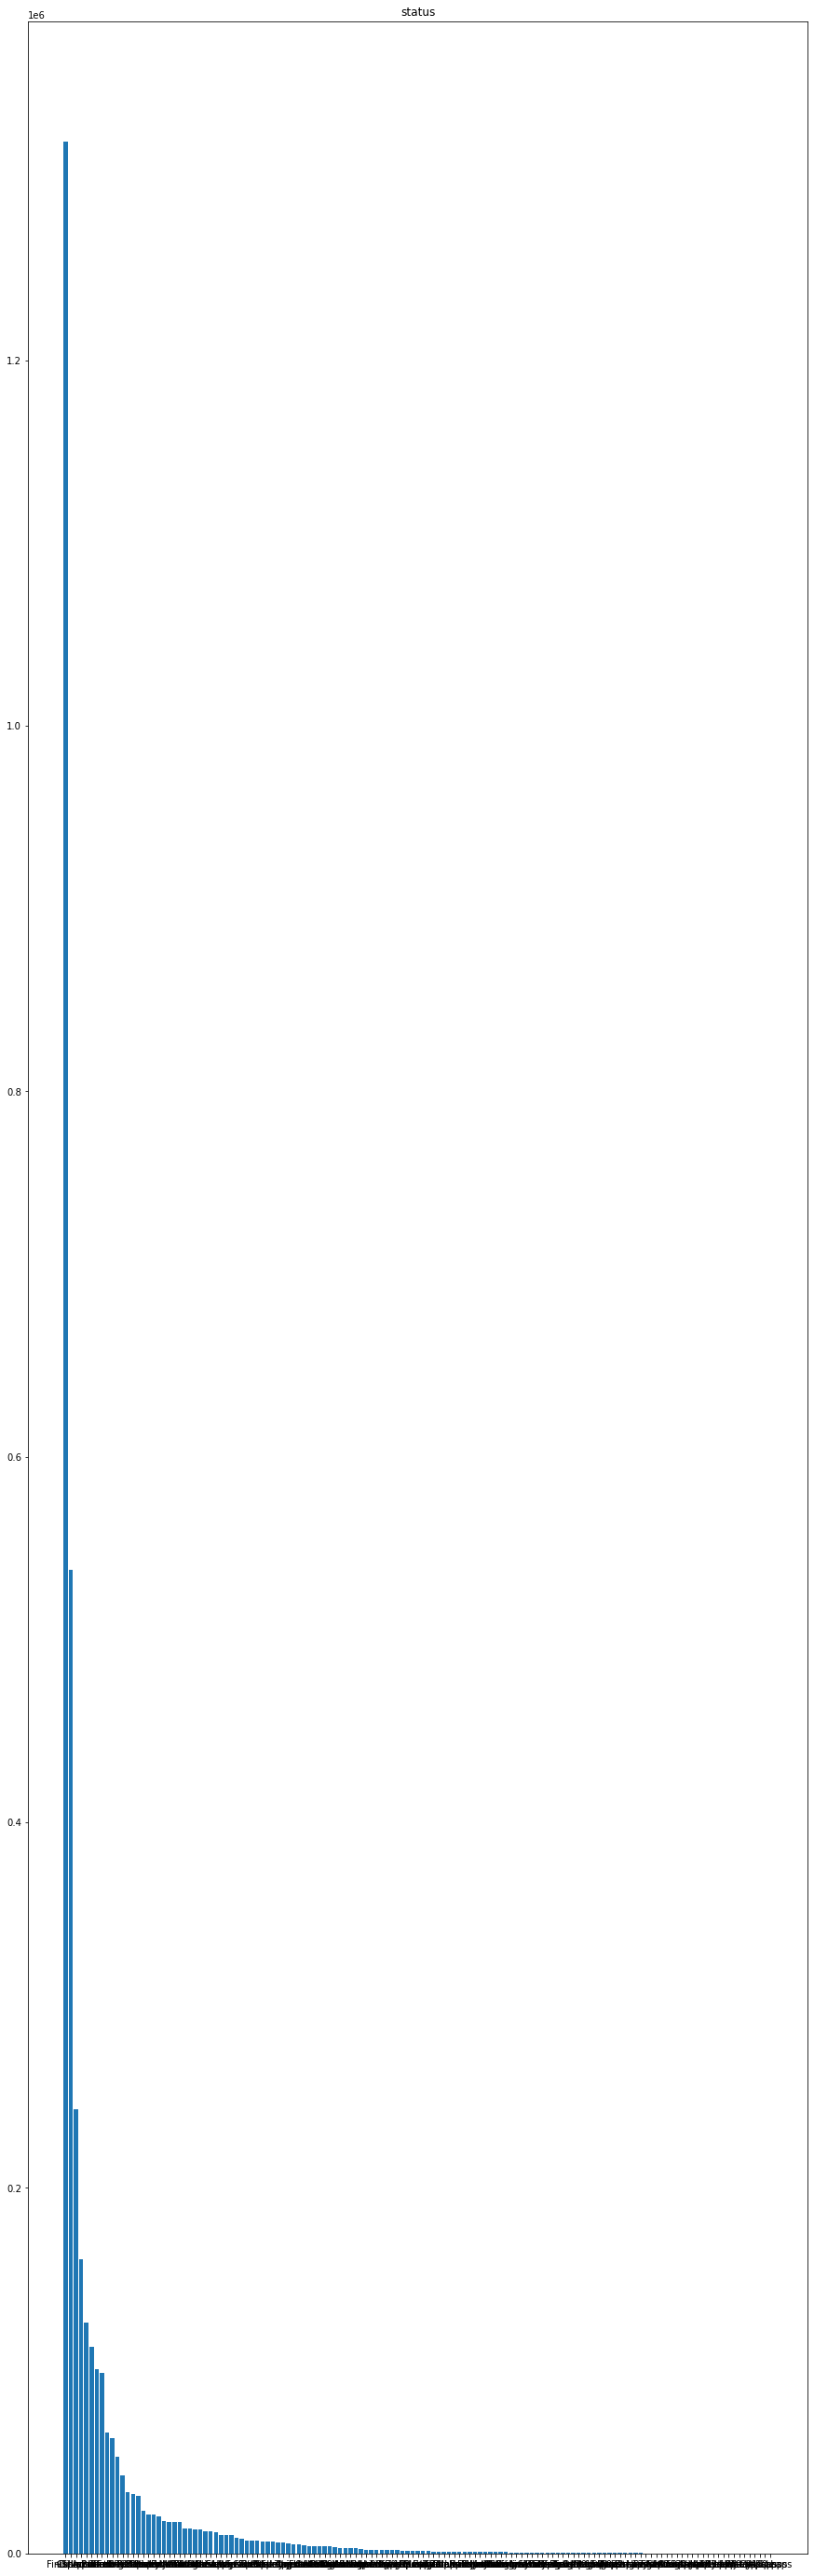

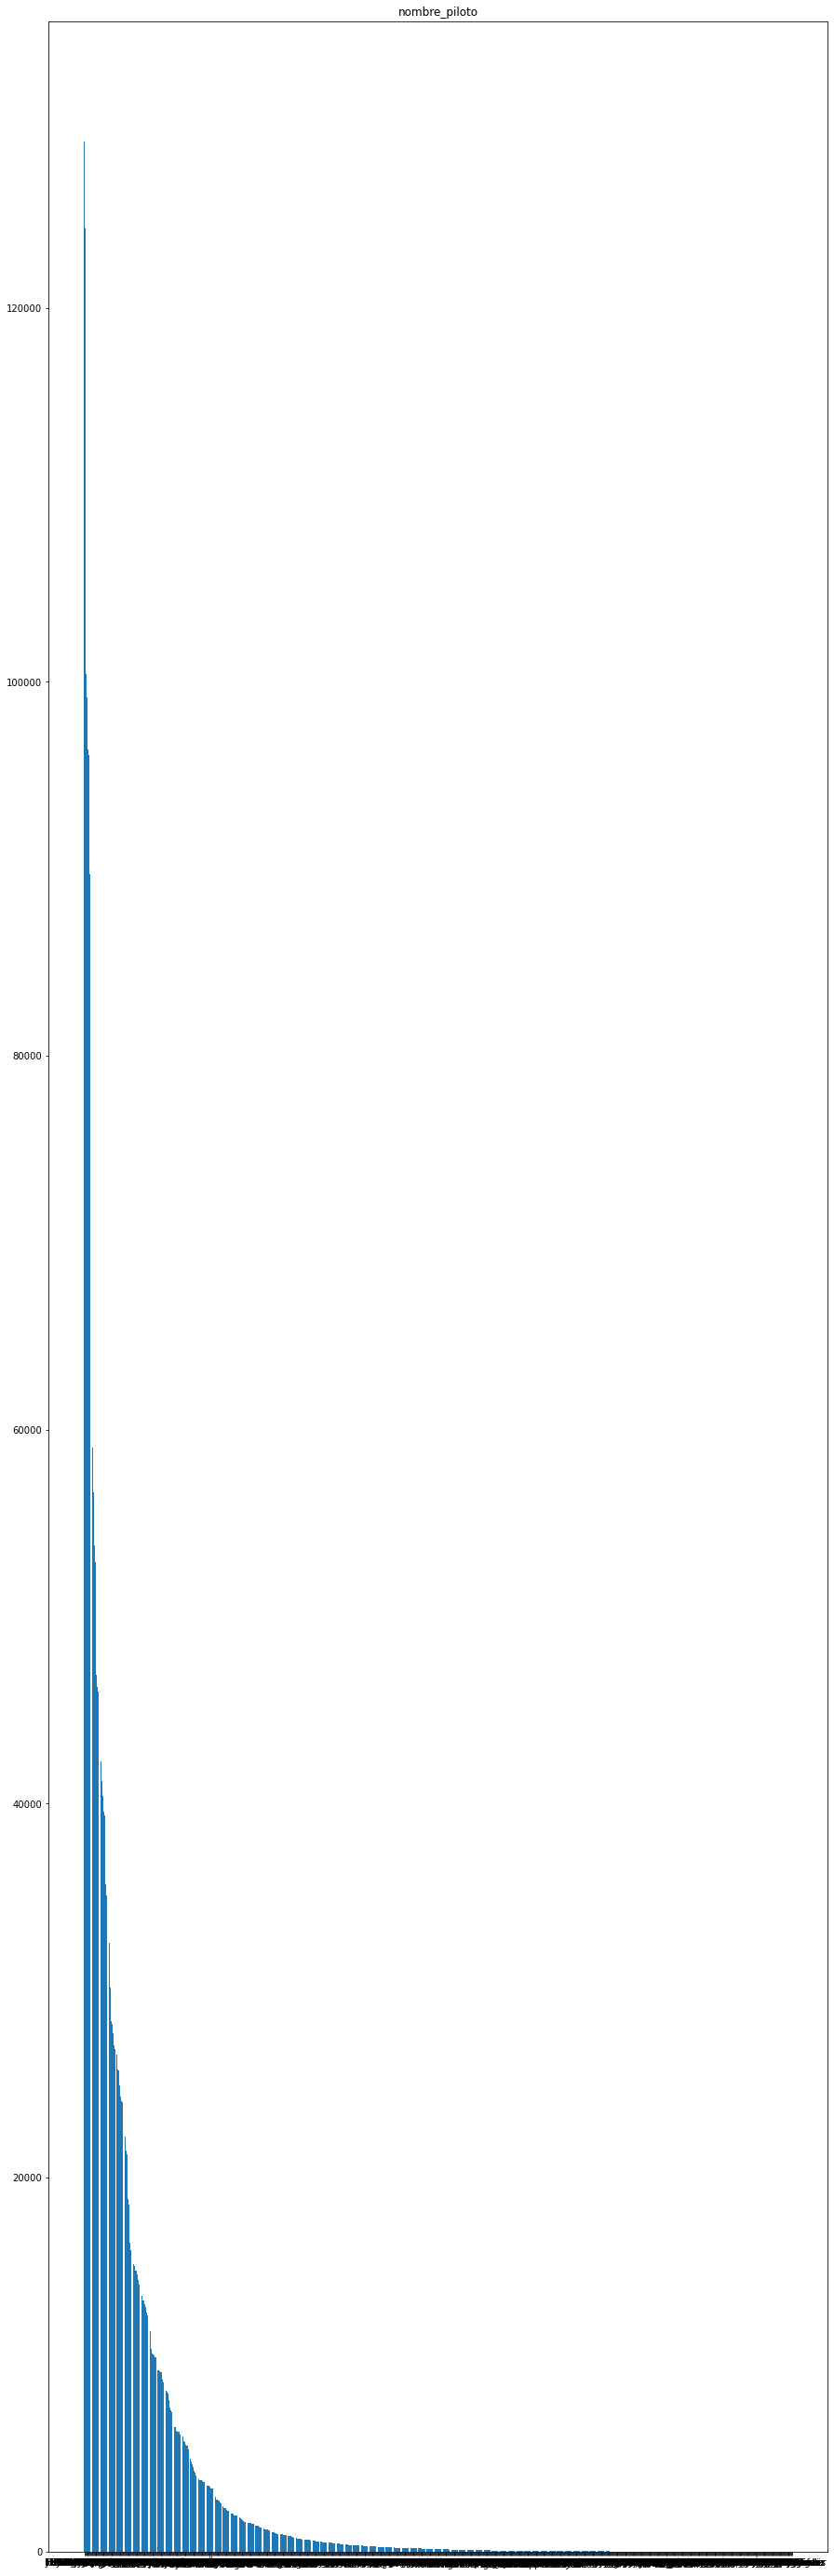

In [106]:
# Realizamos un barplot para las disitnas variables categoricas
for c in categorical_columns:
    plt.figure(figsize=(15,50))
    plt.bar(df_f1data[c].unique(), df_f1data[c].value_counts())
    plt.title(c)
    plt.show();

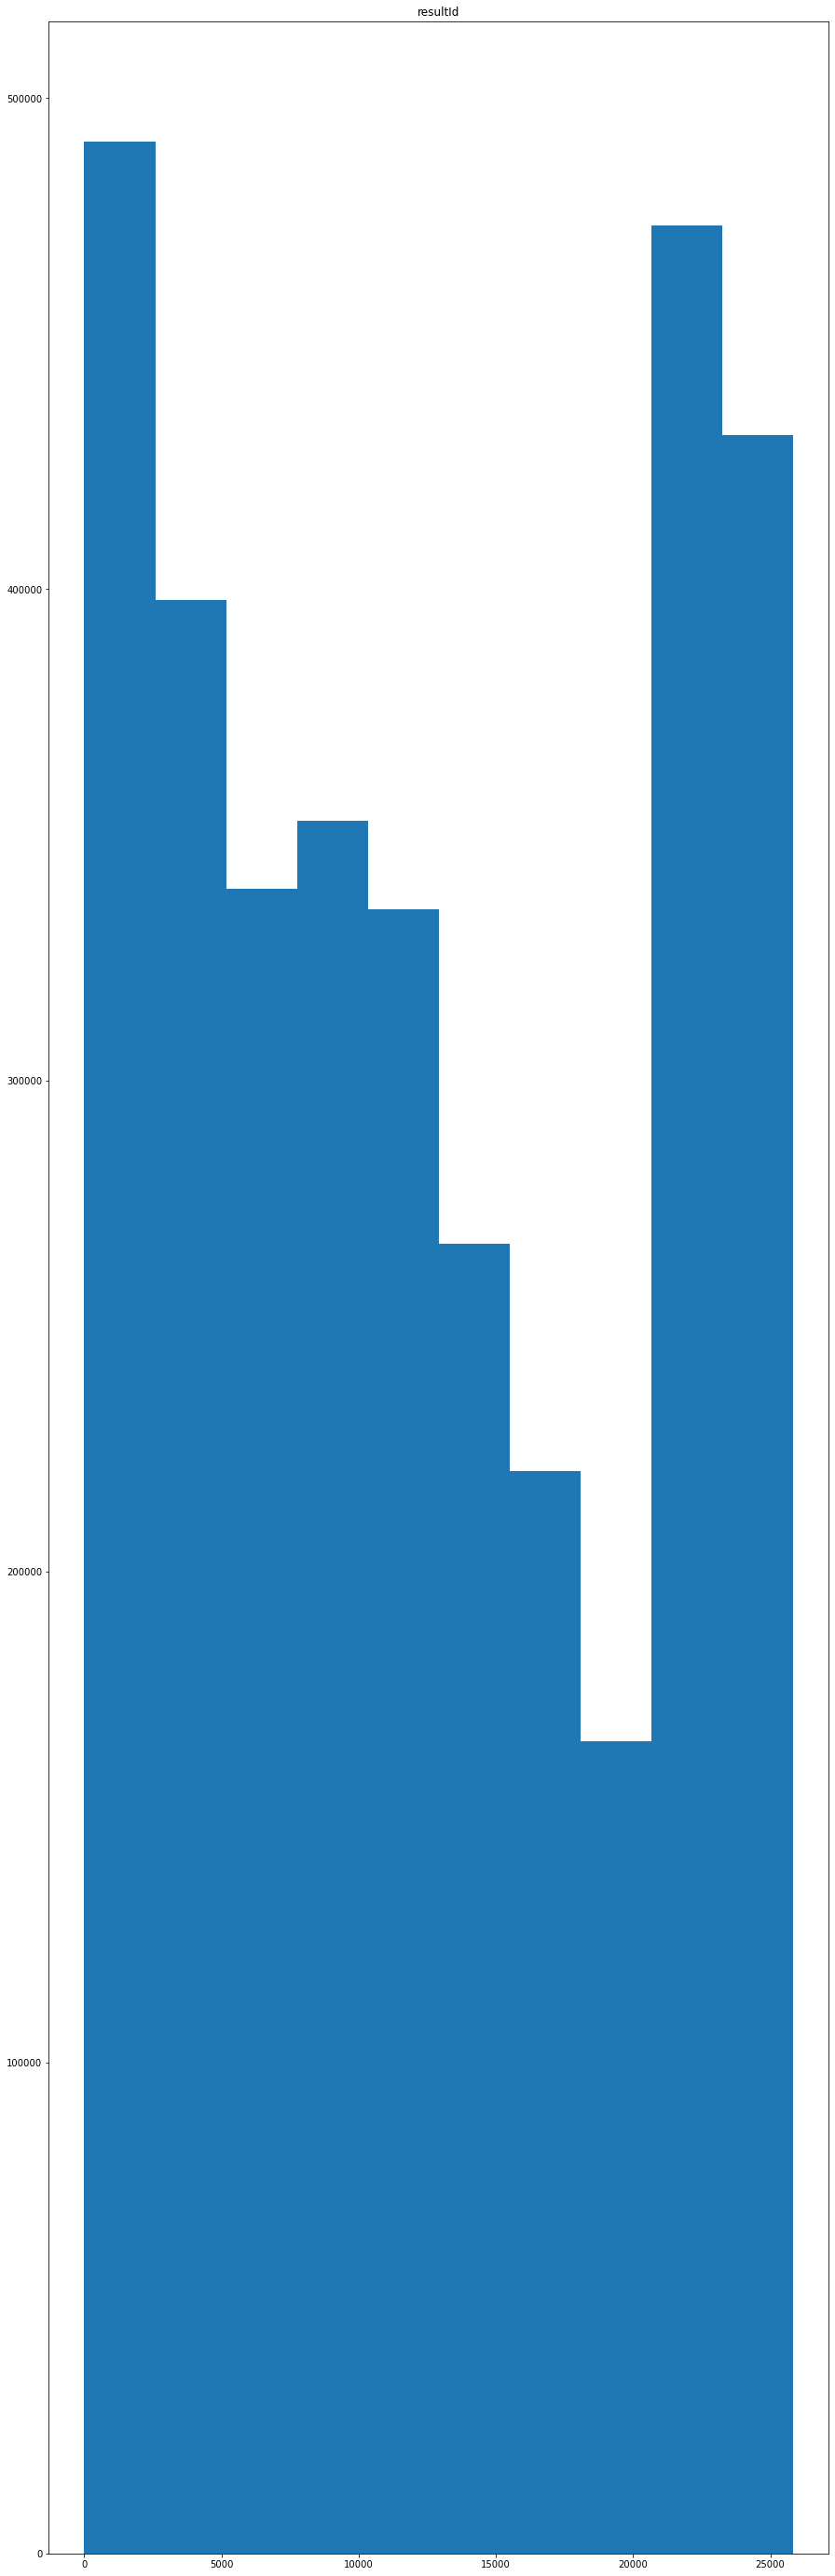

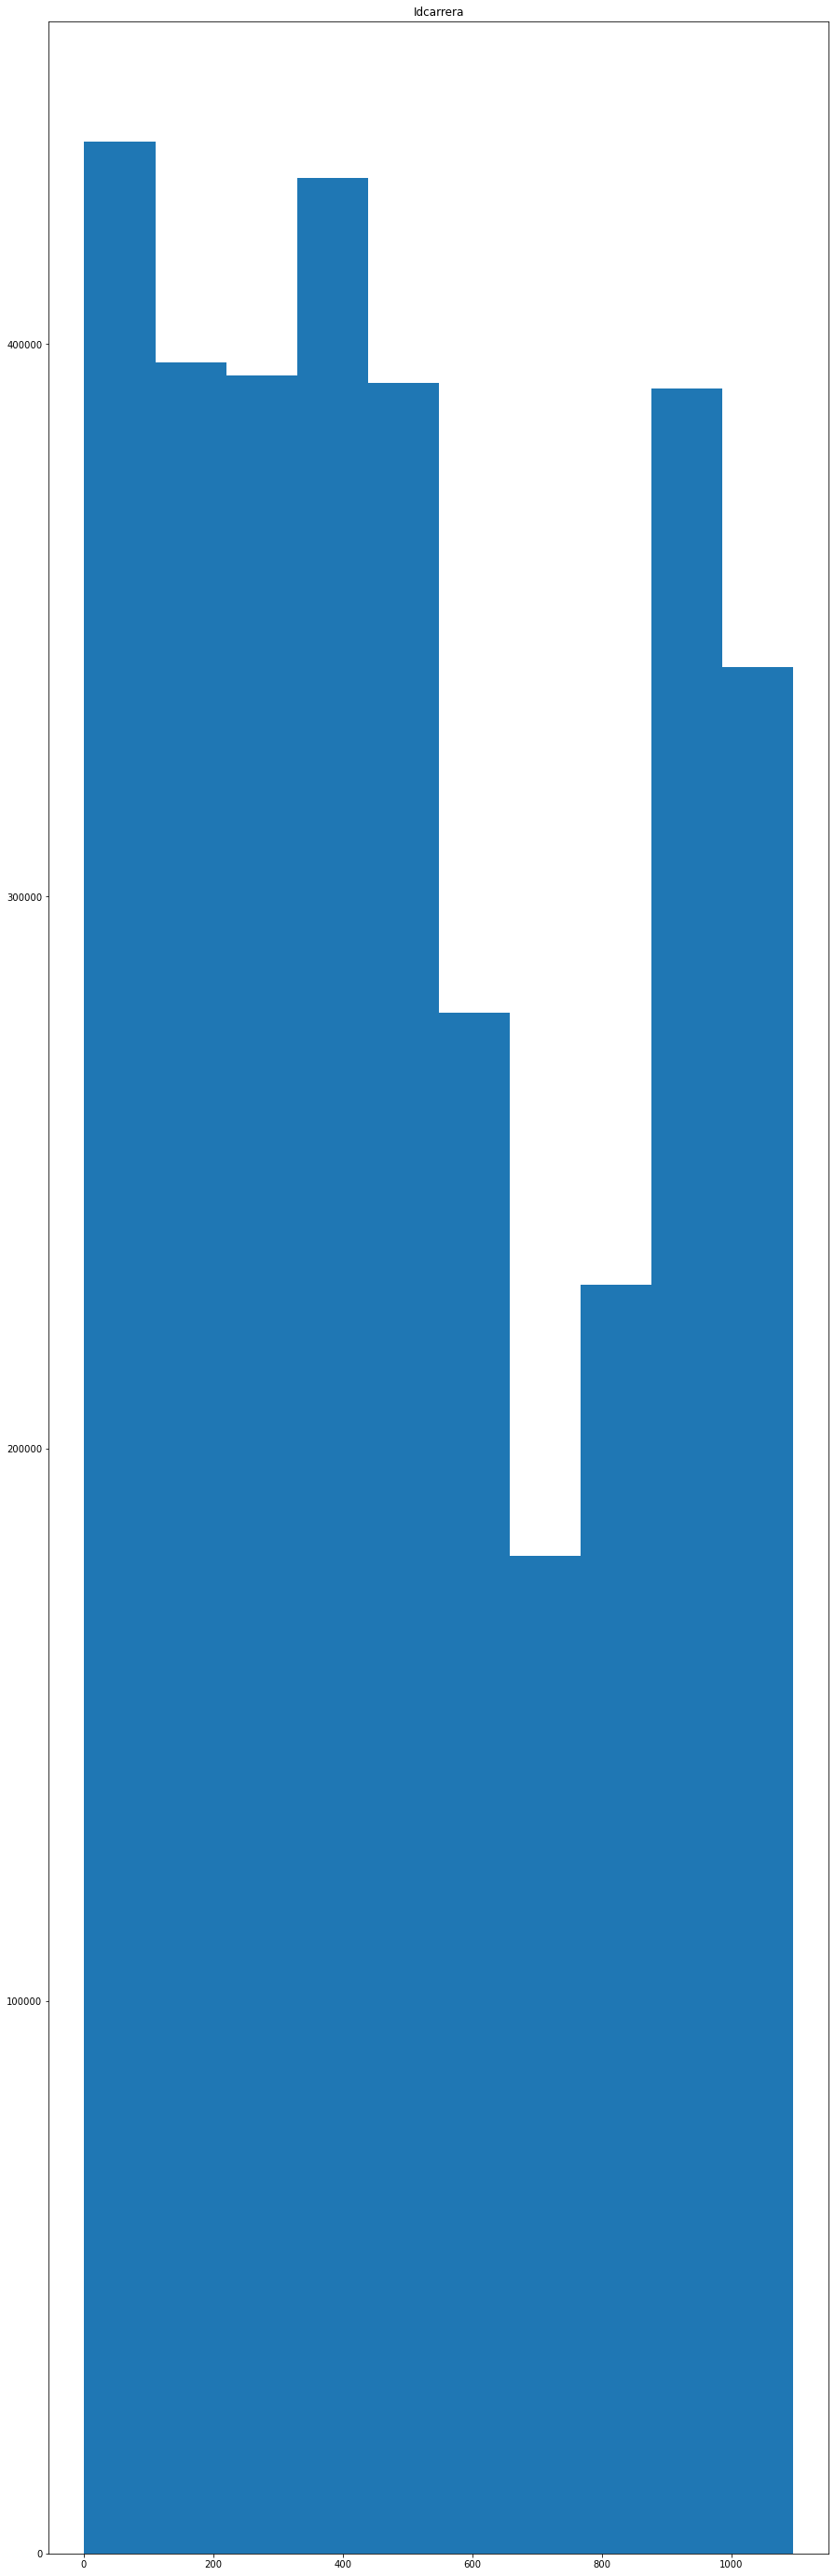

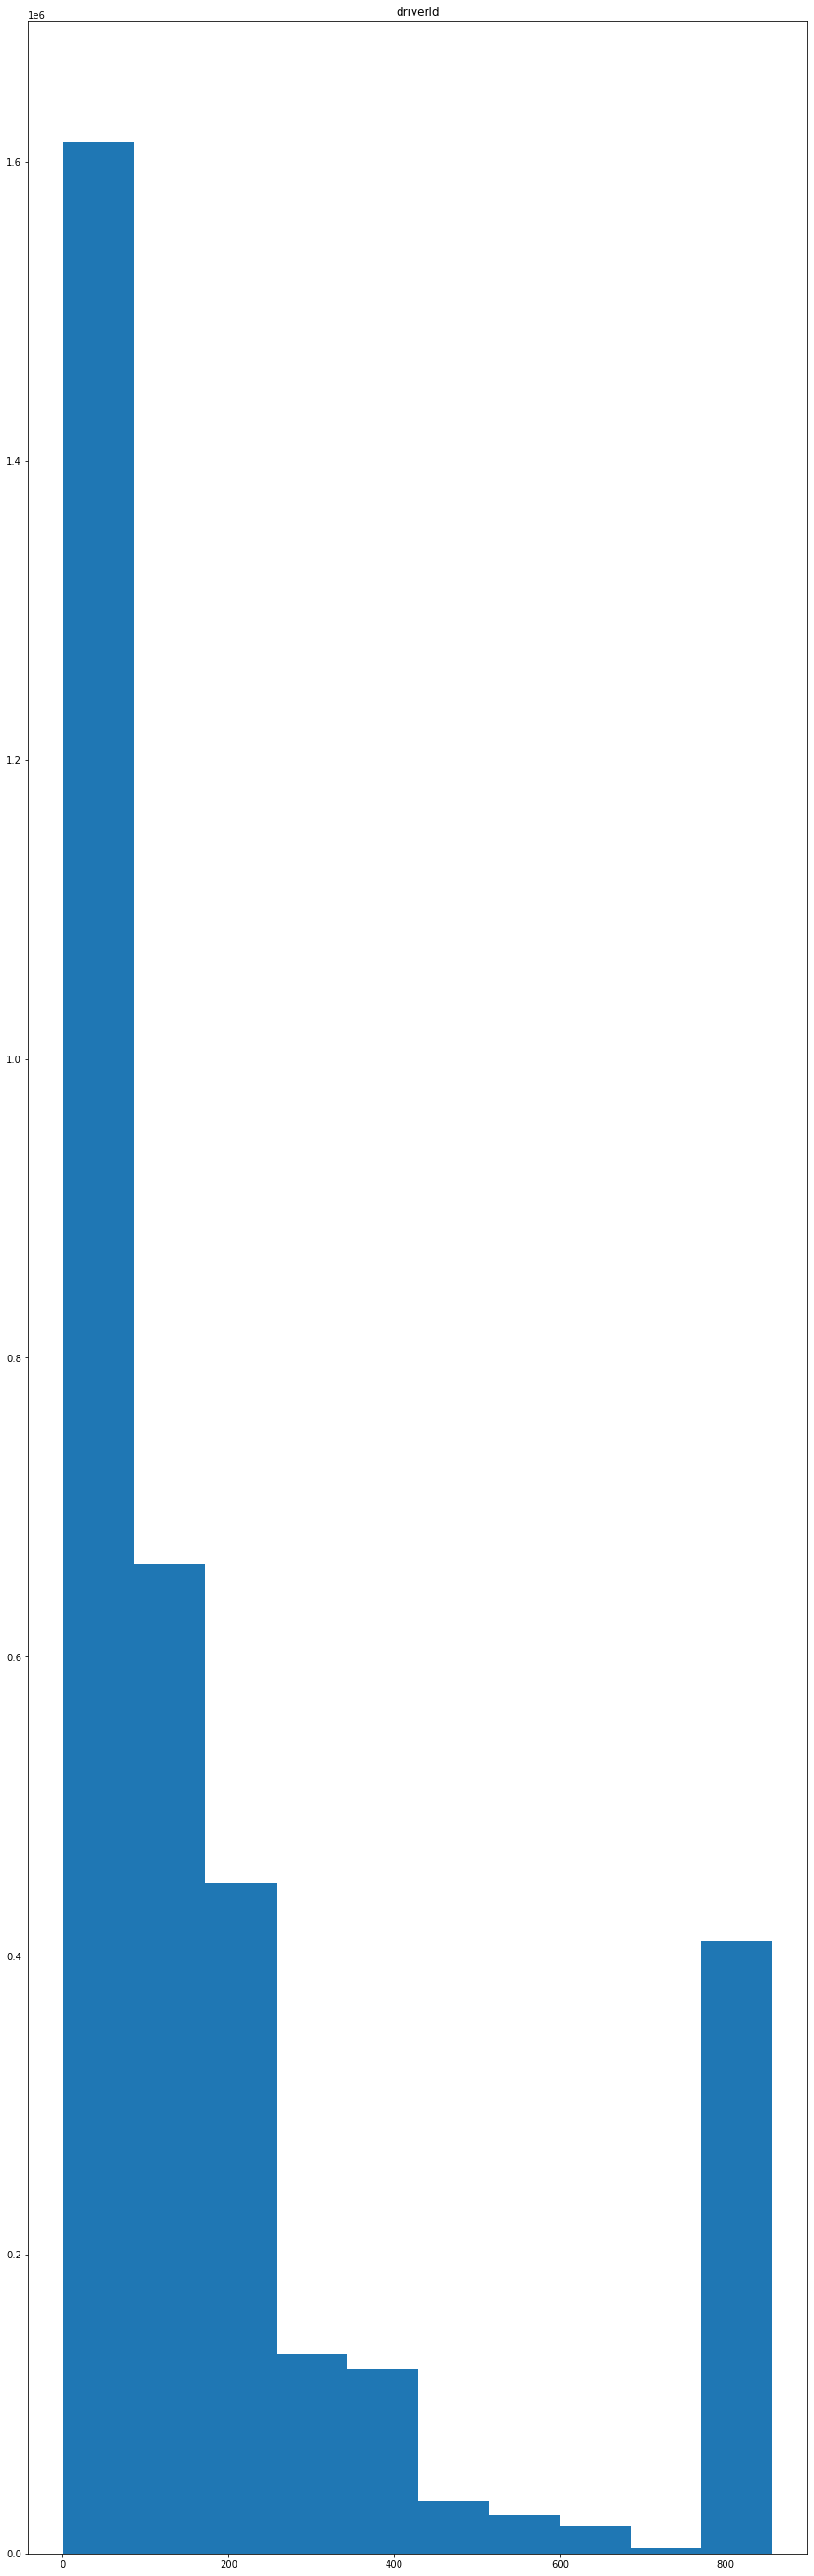

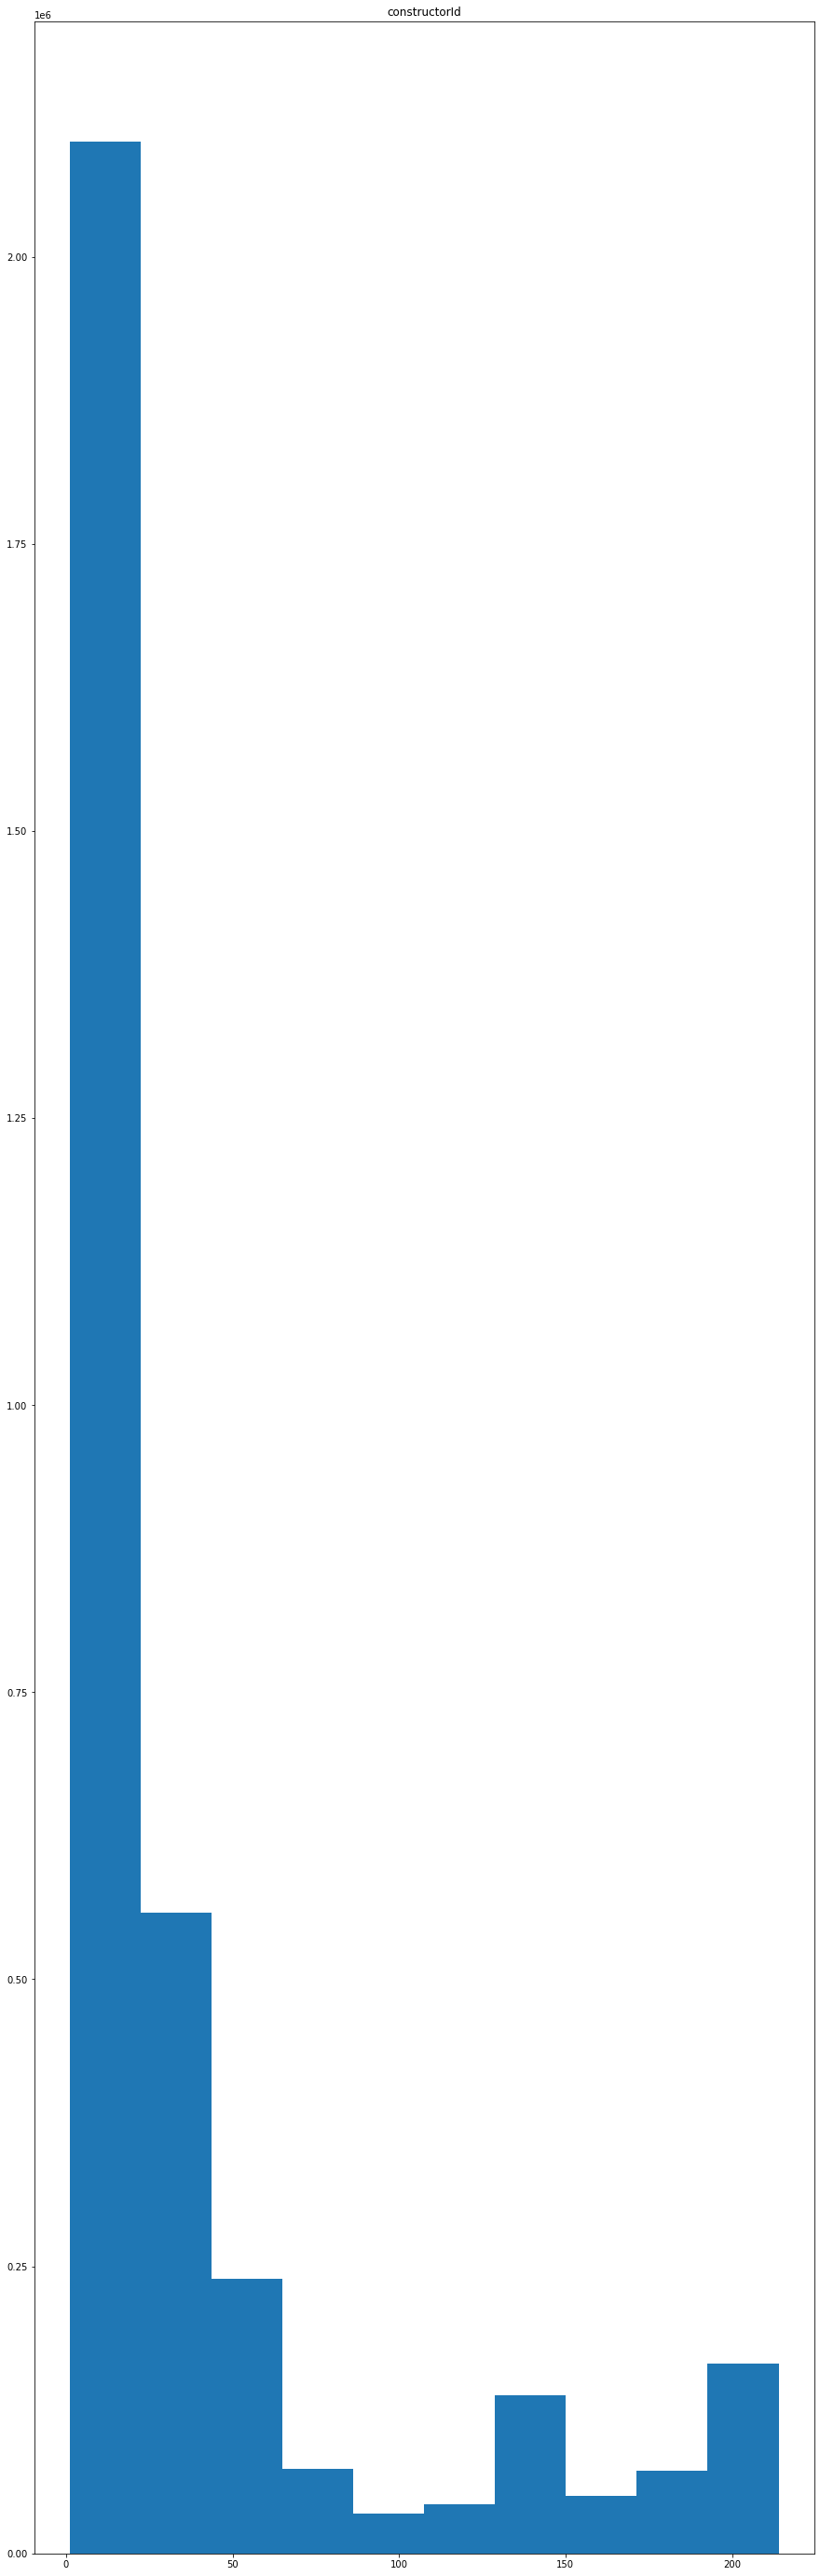

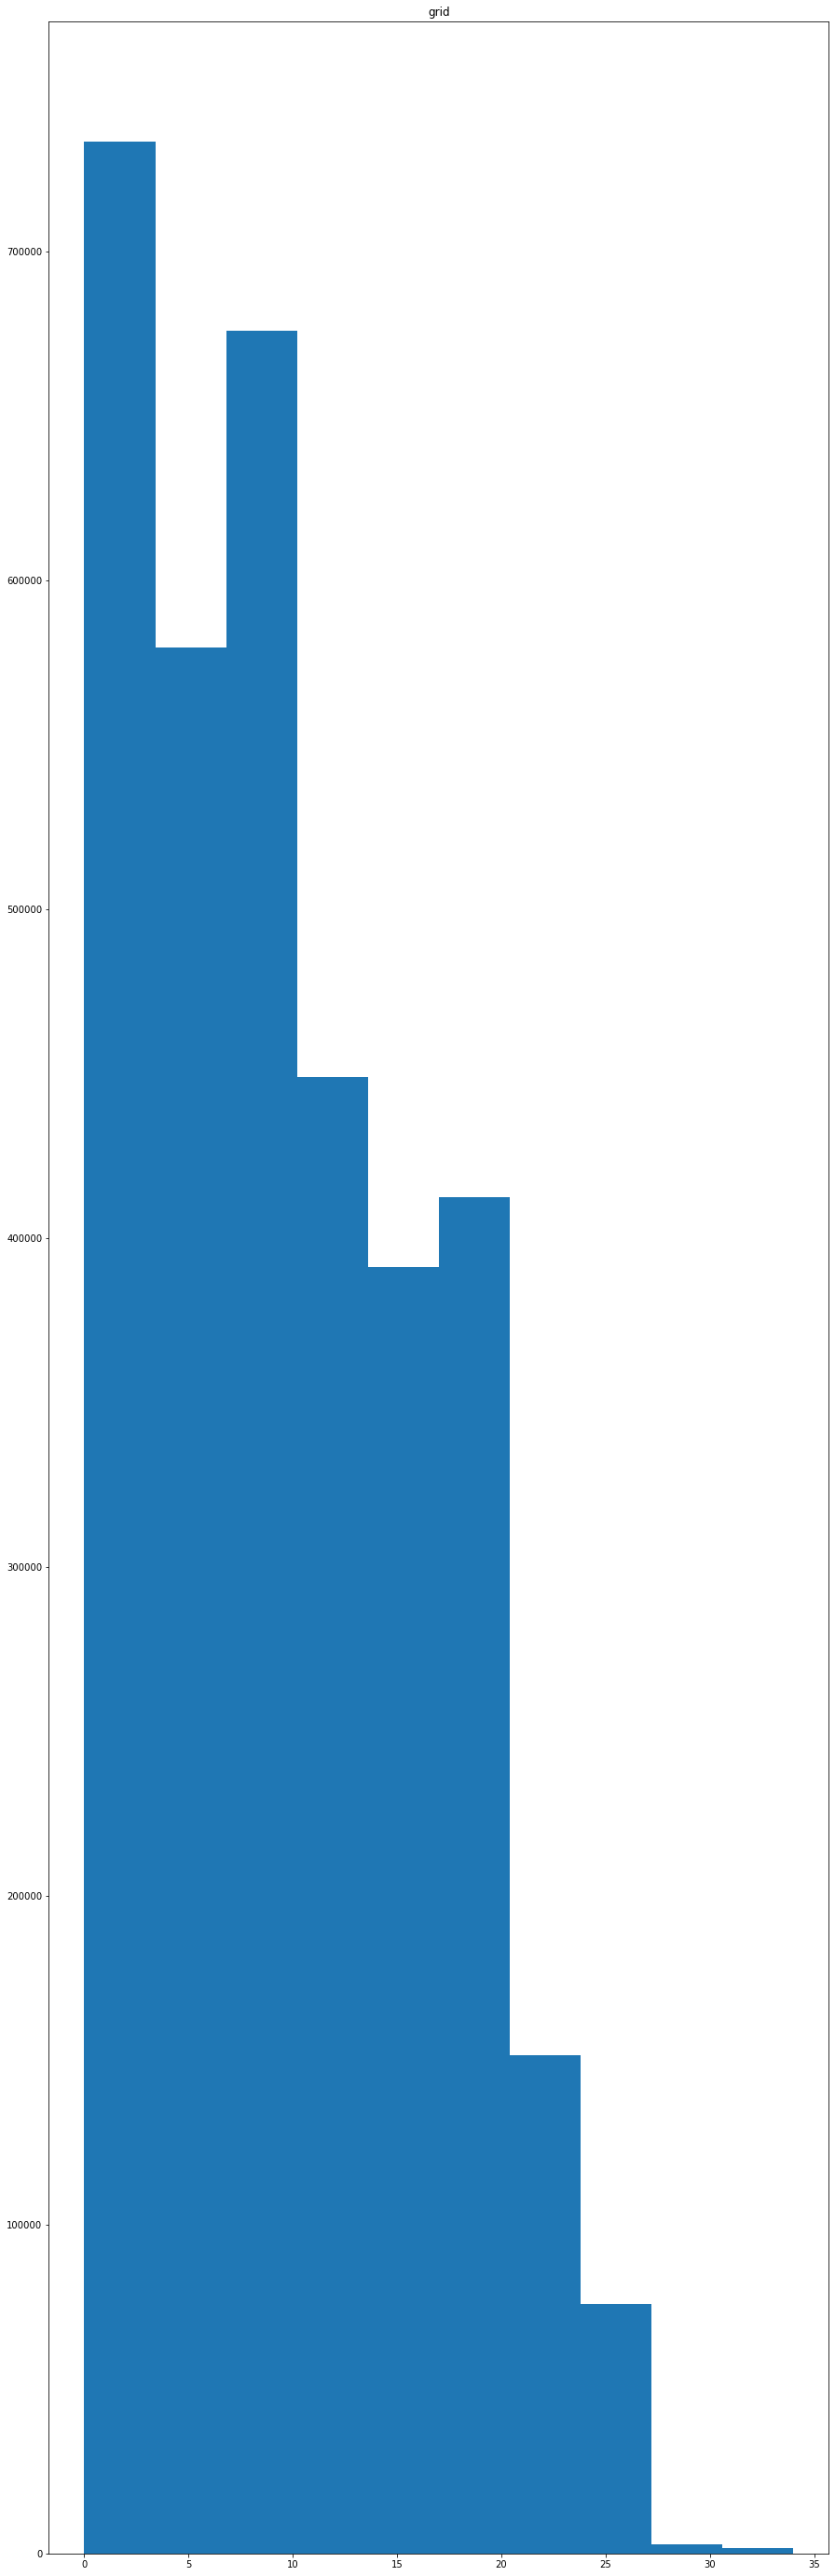

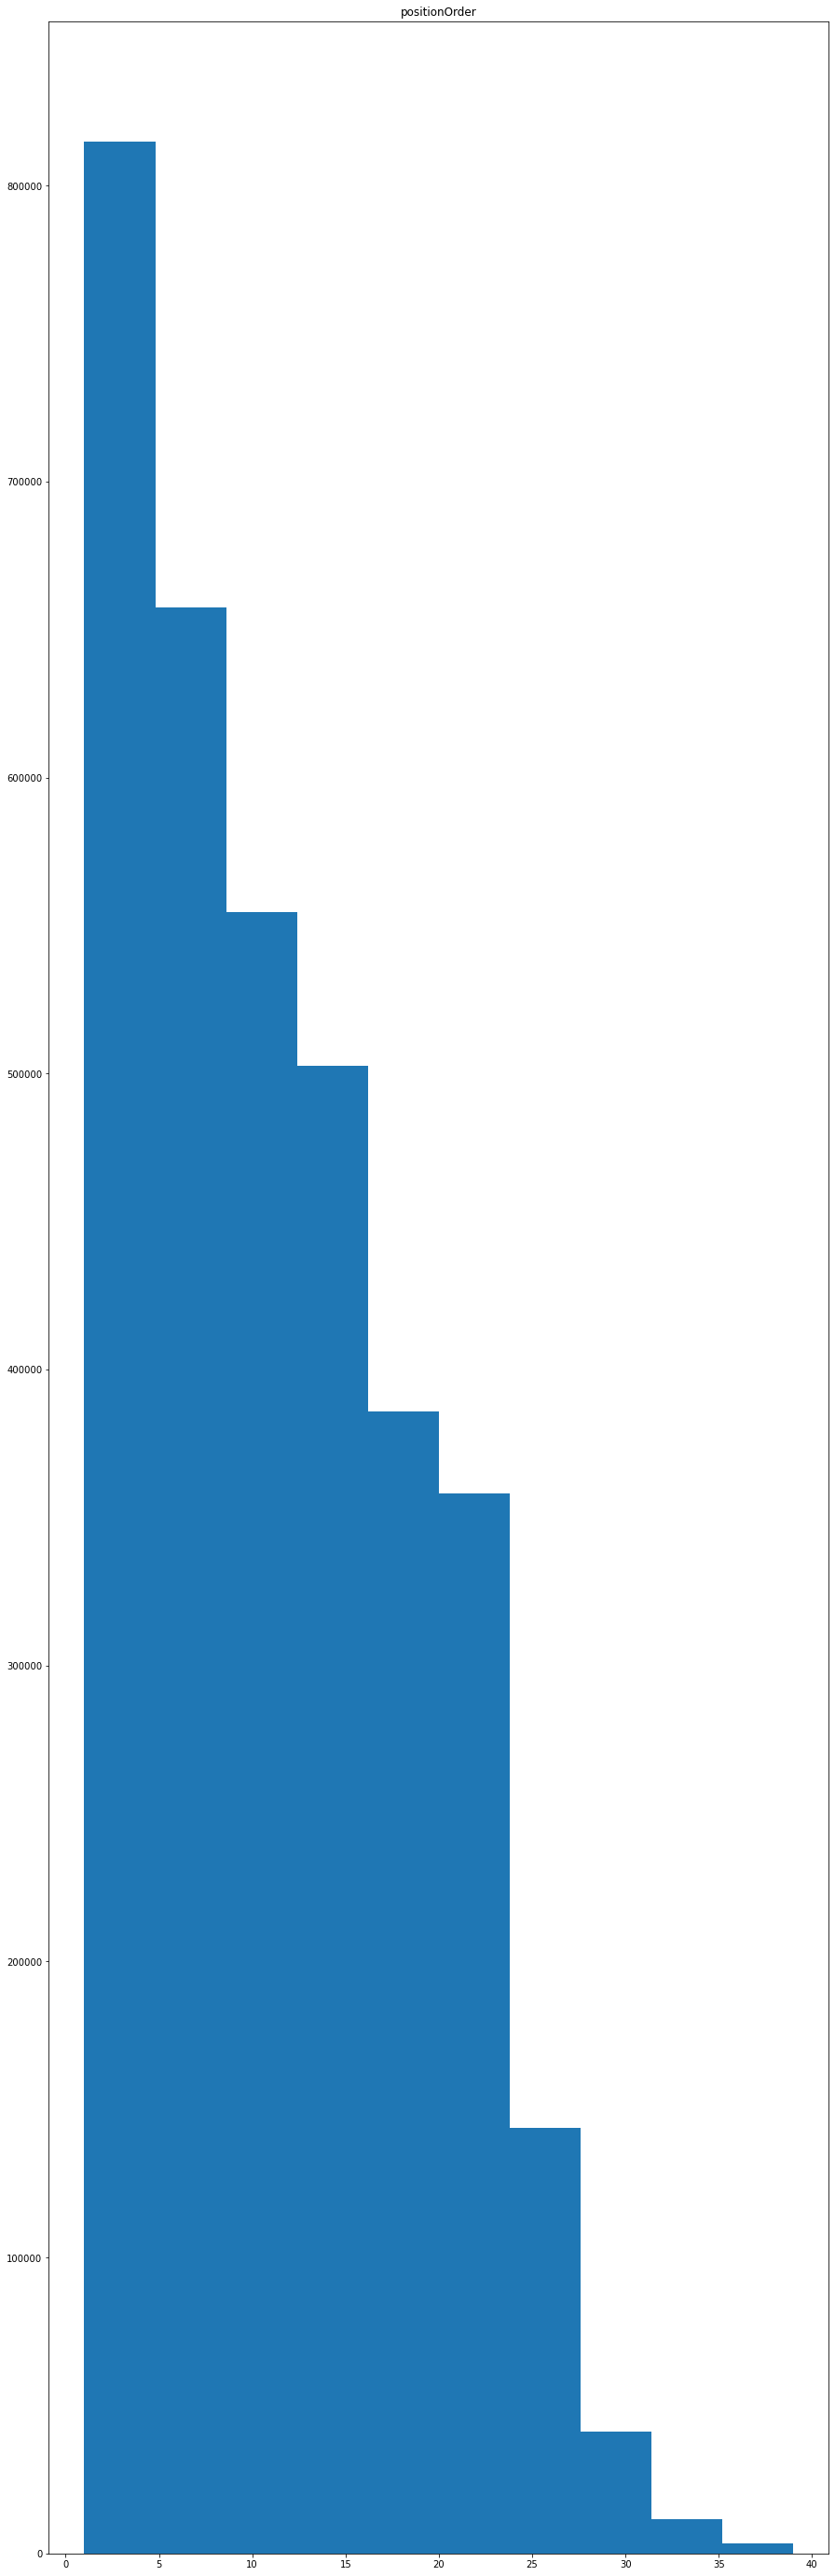

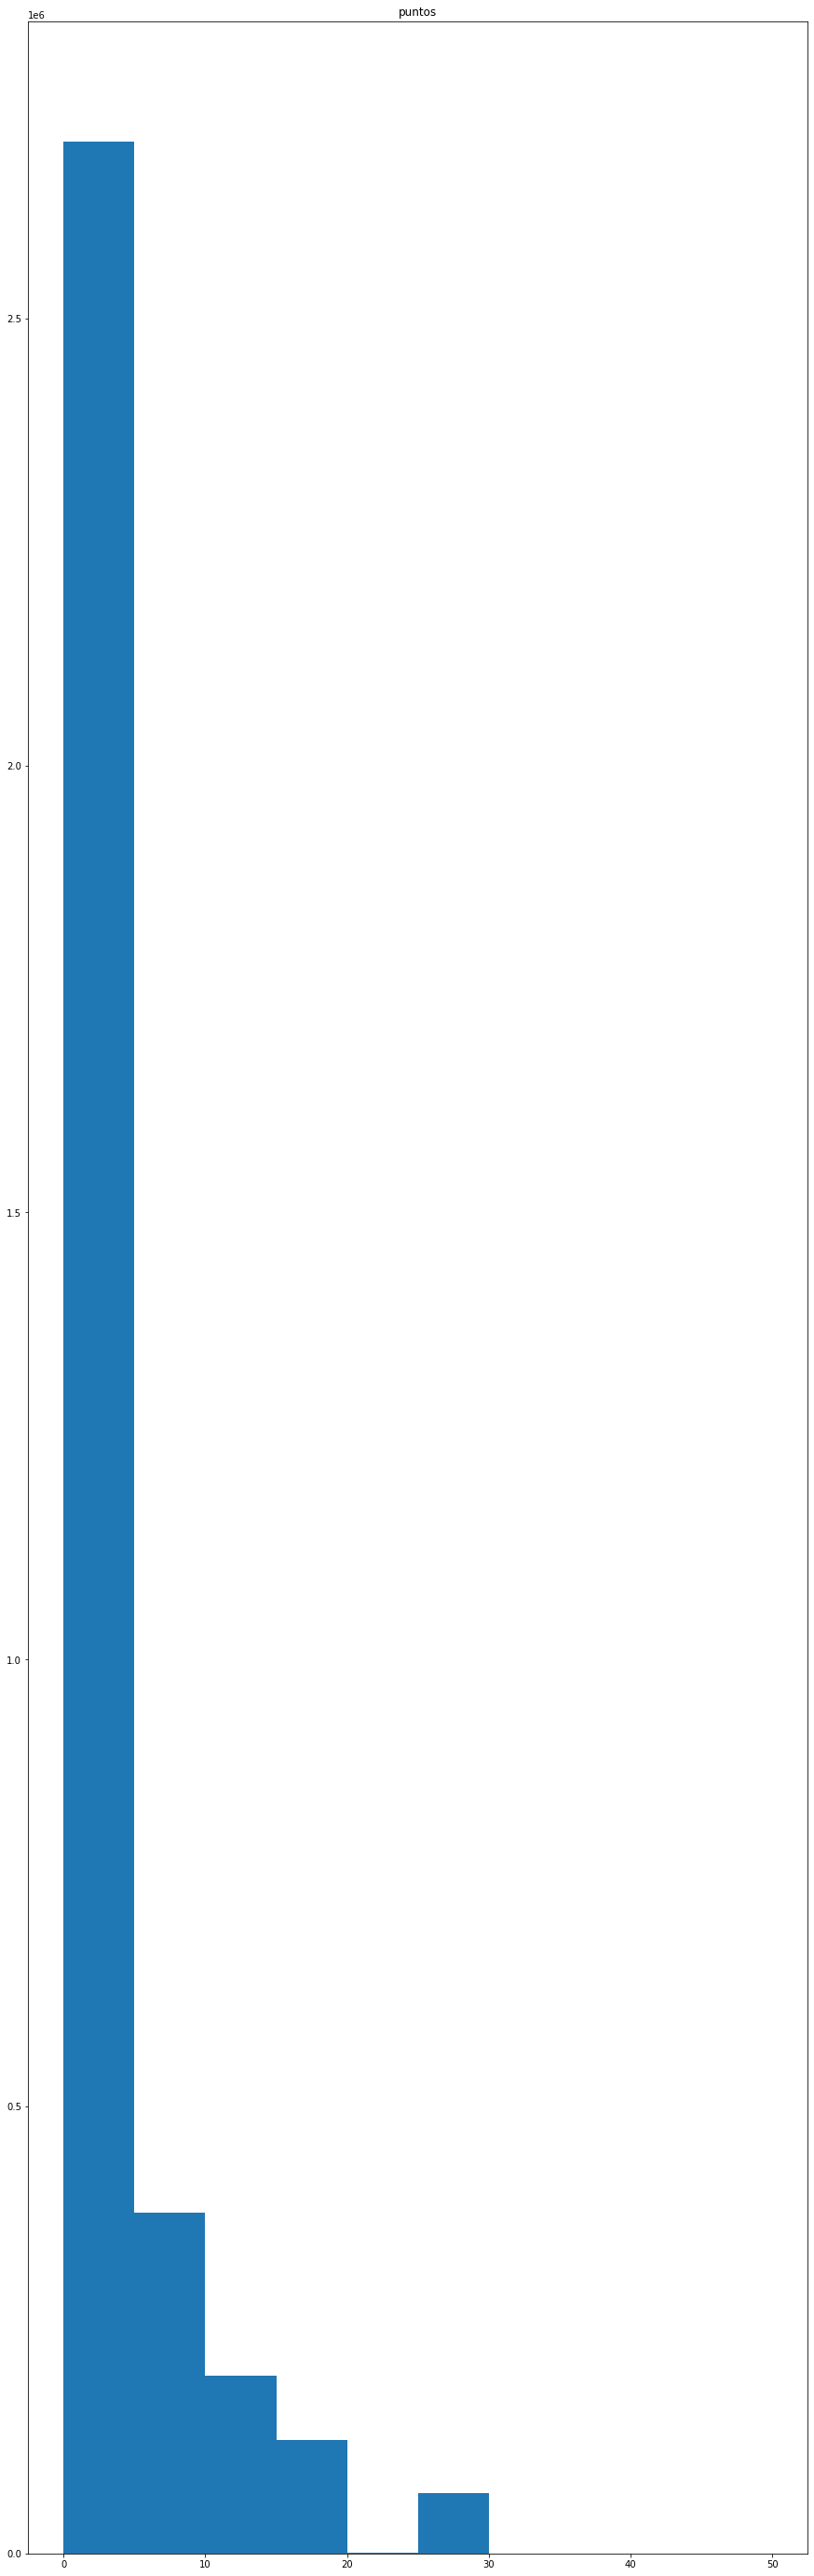

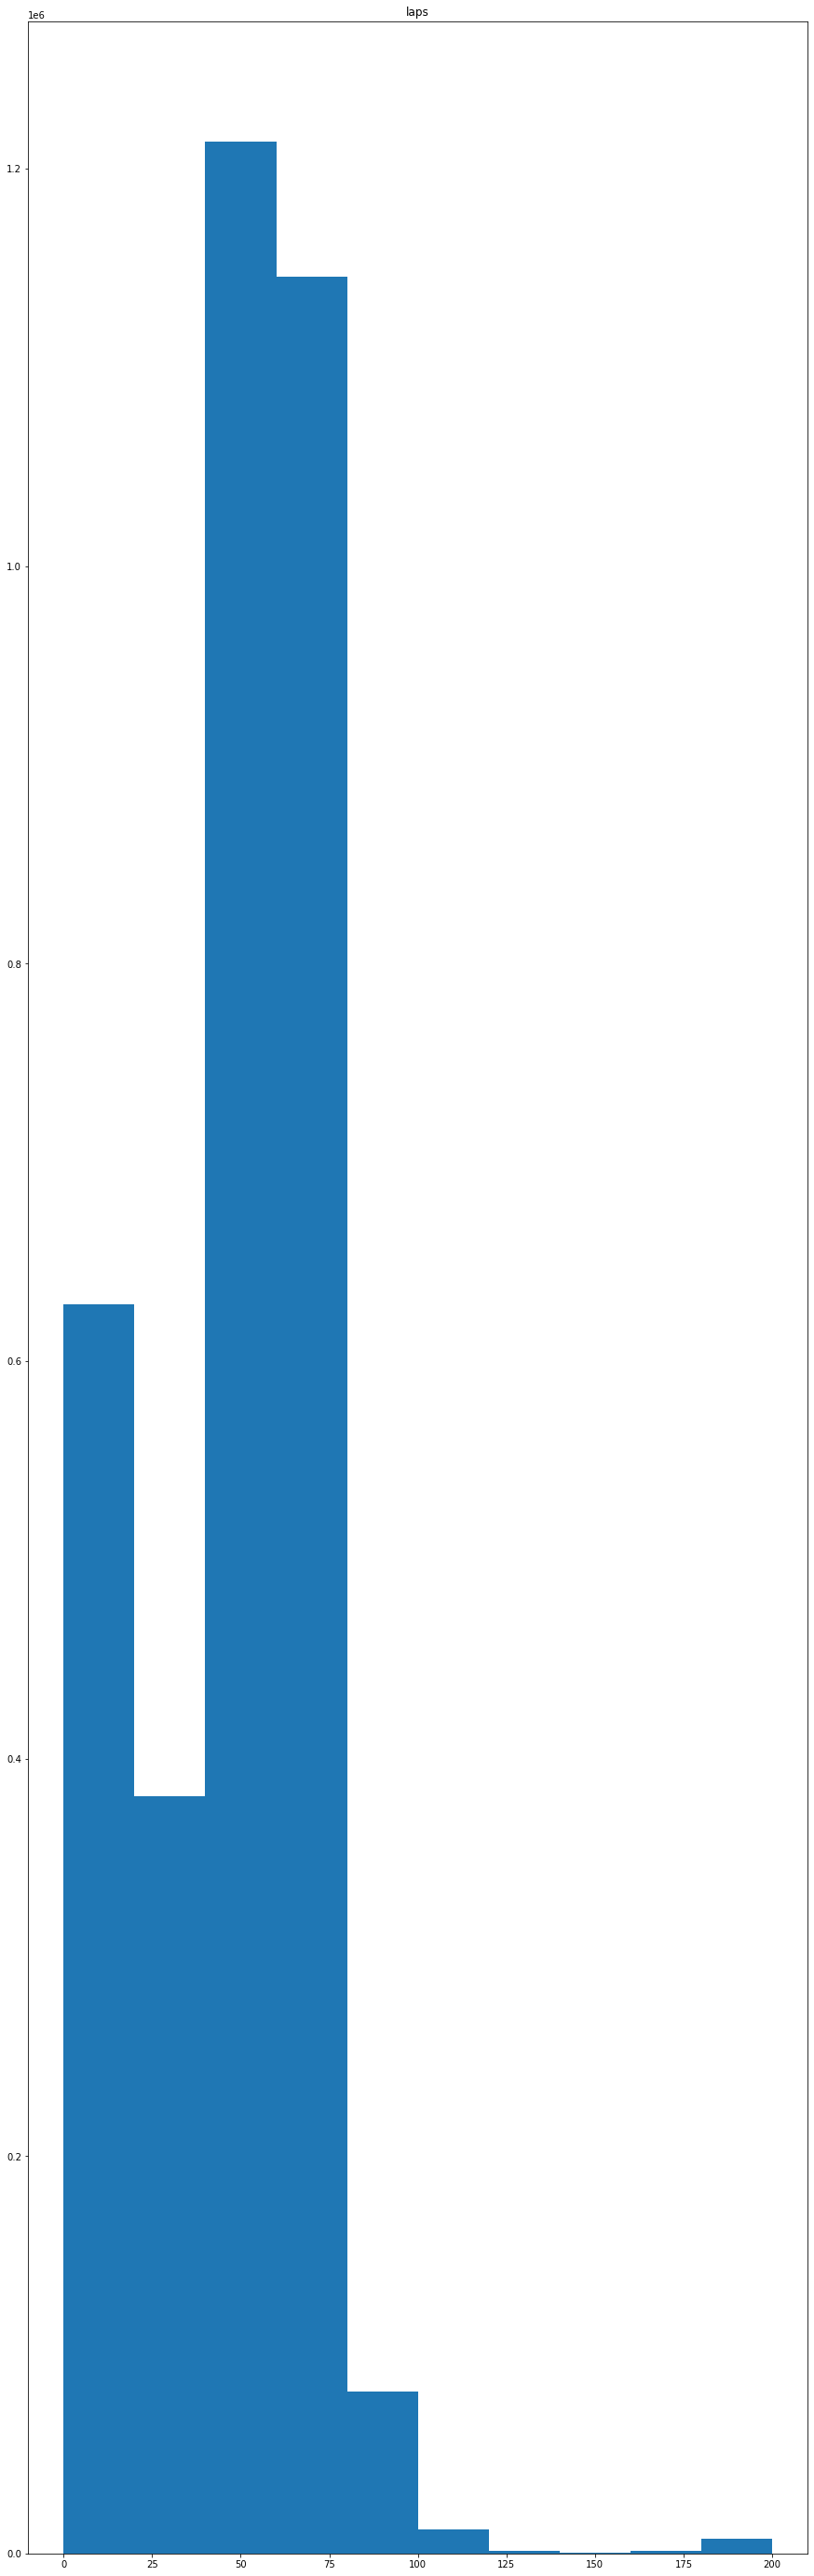

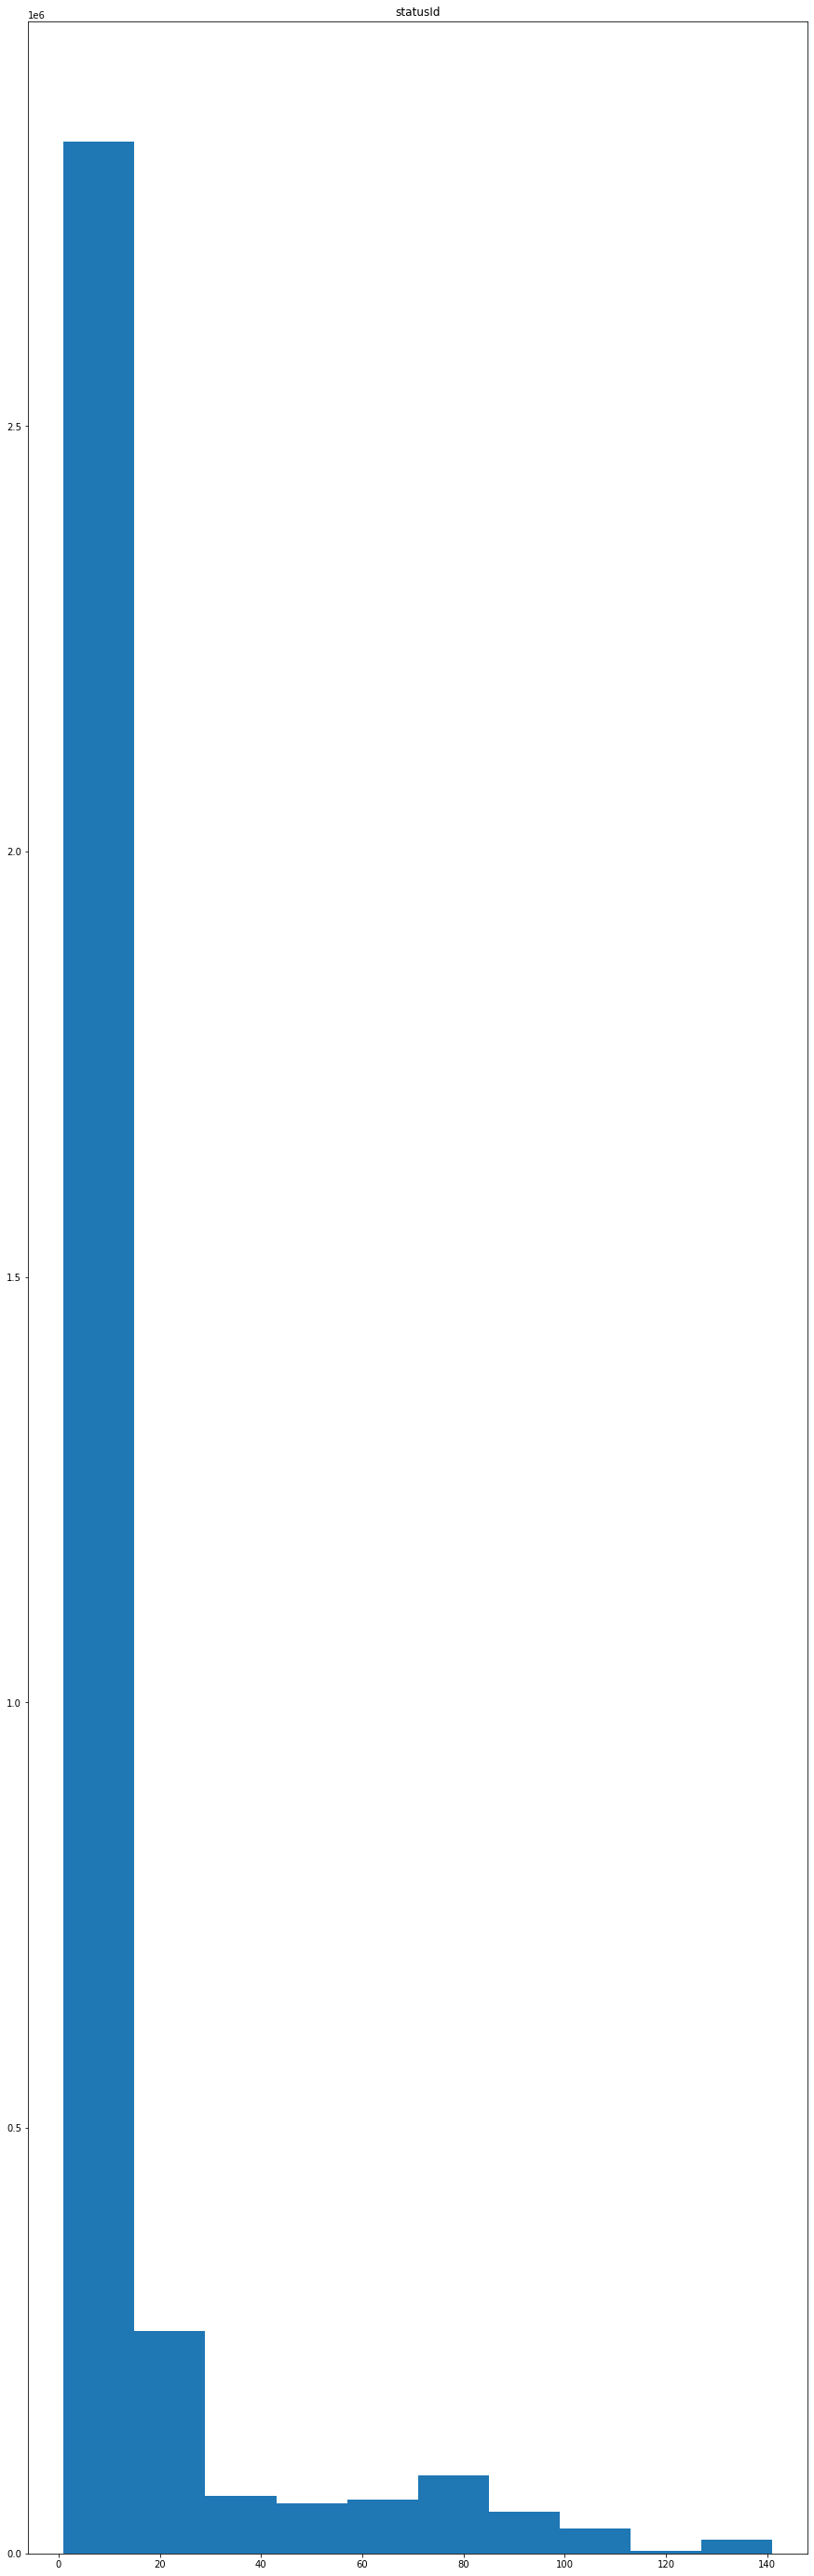

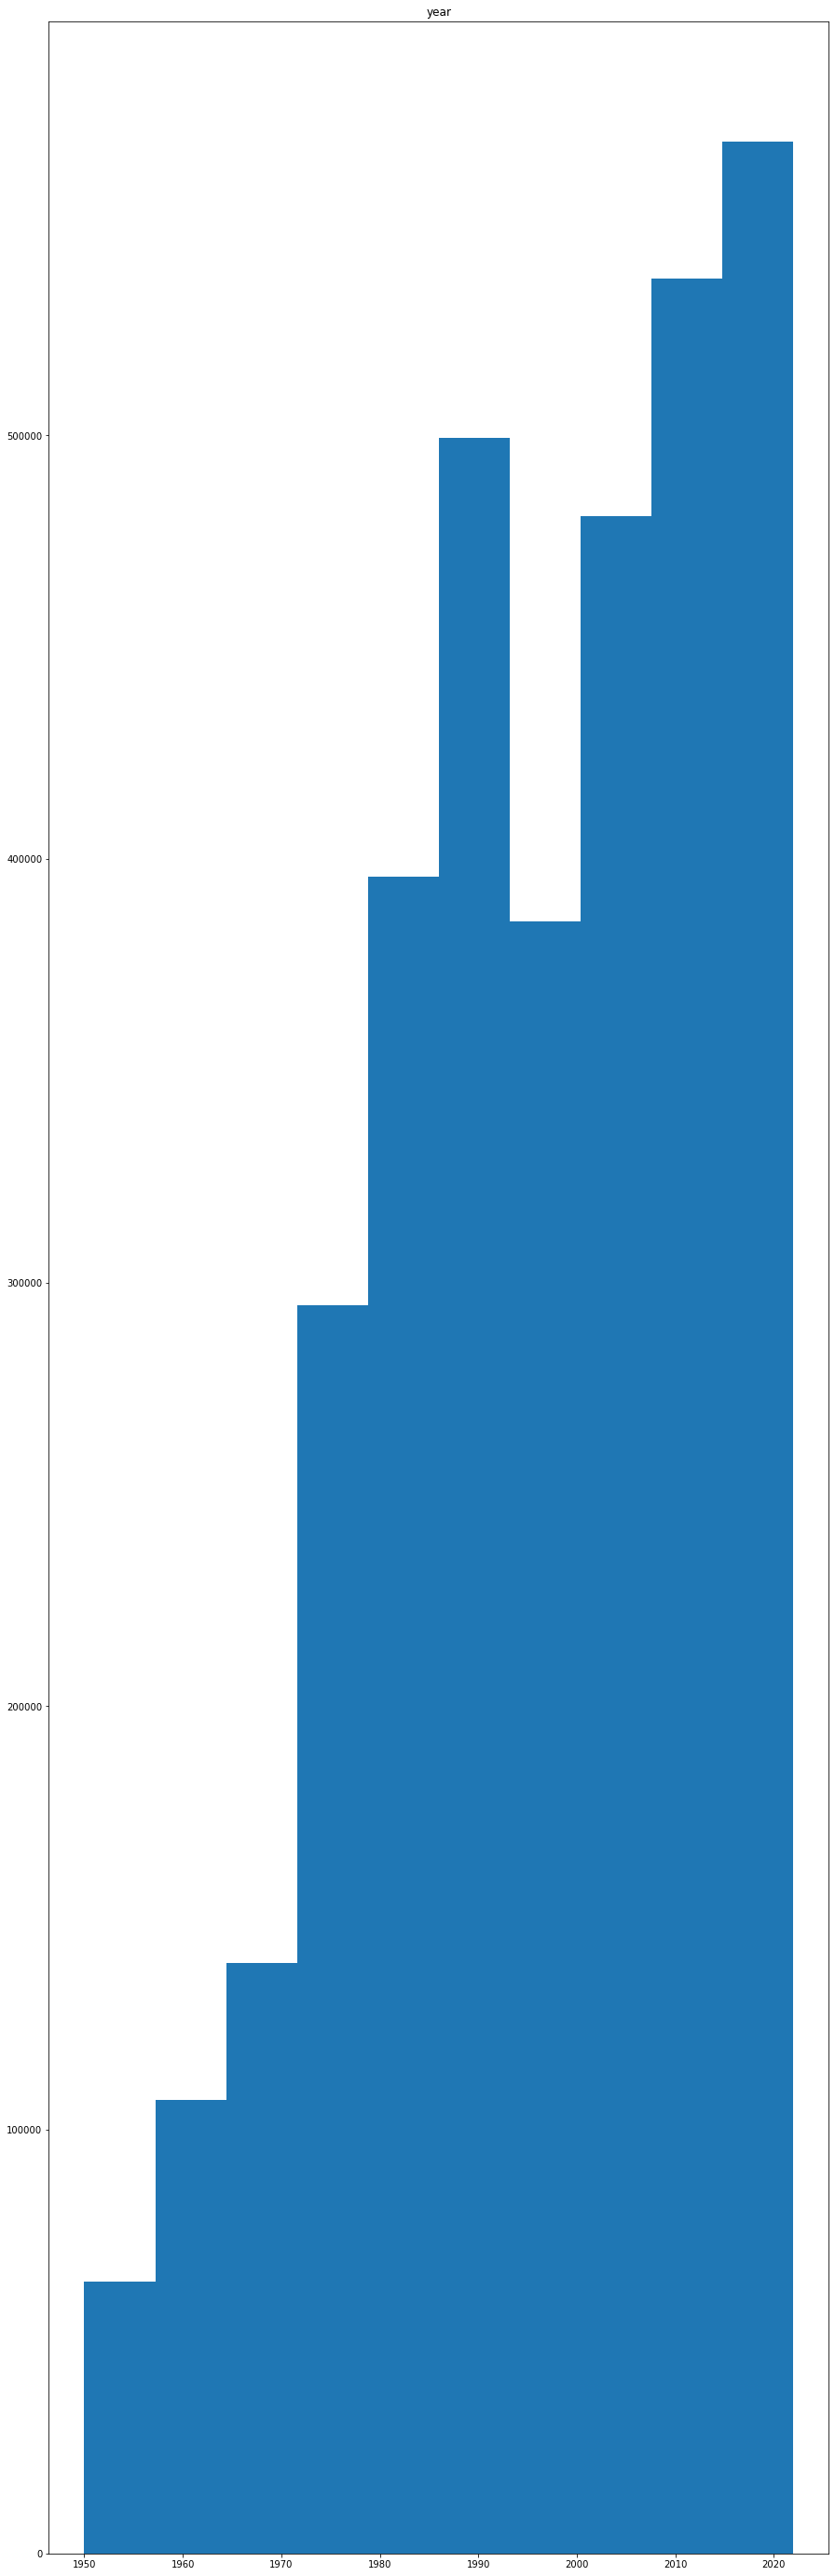

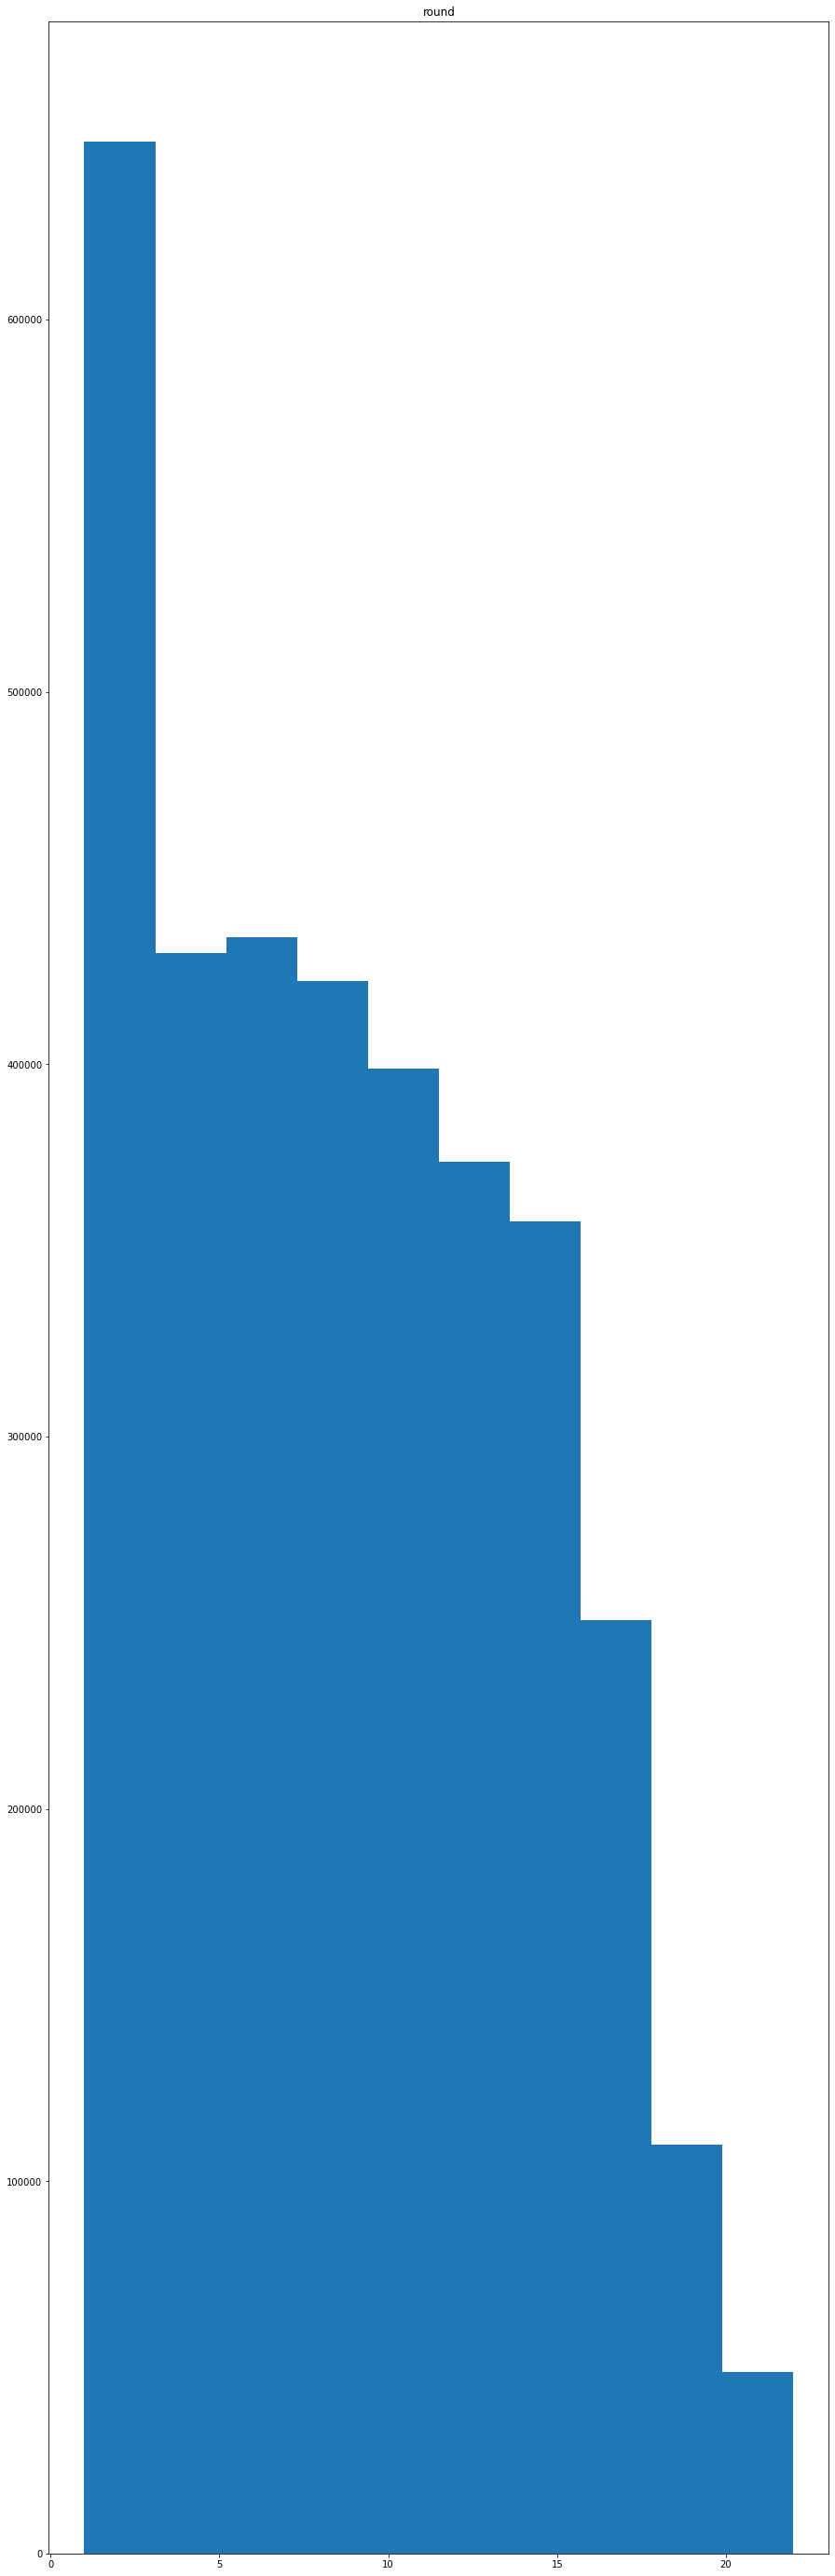

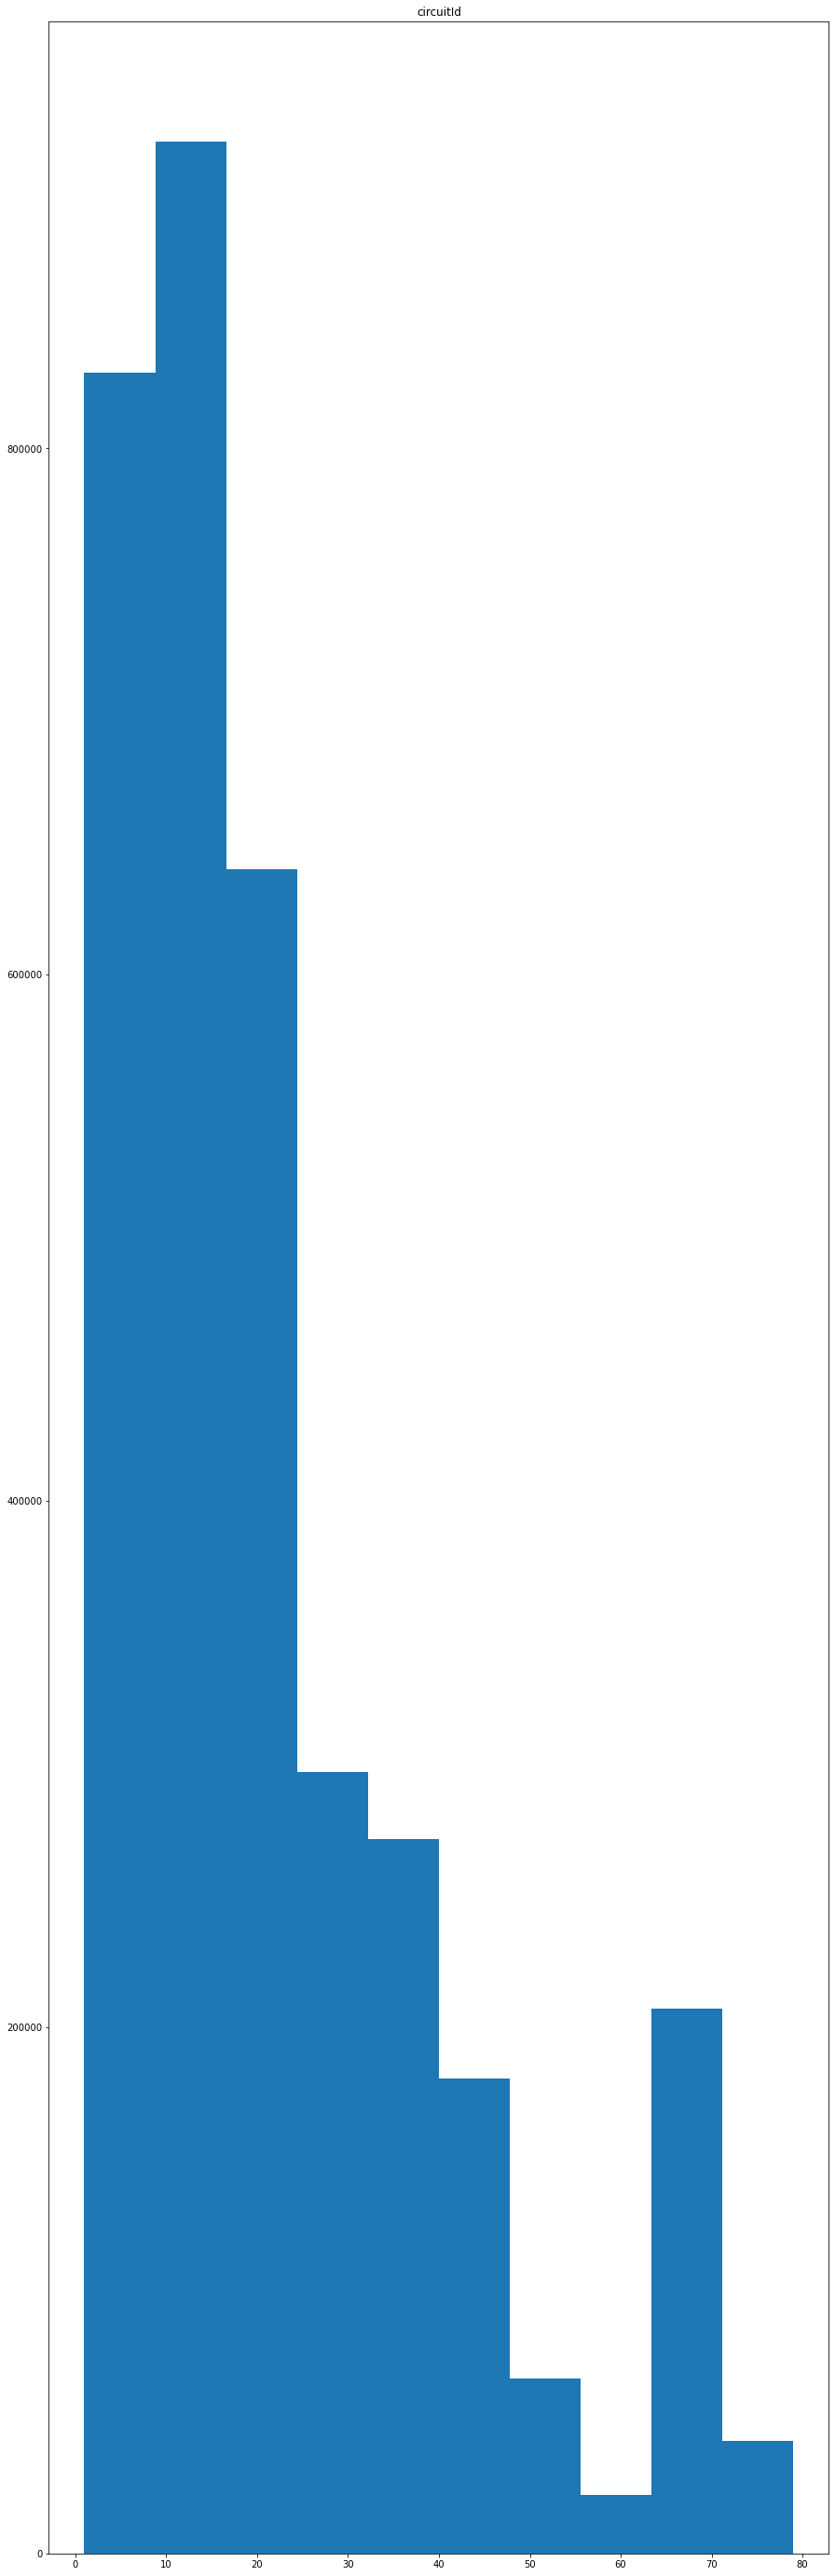

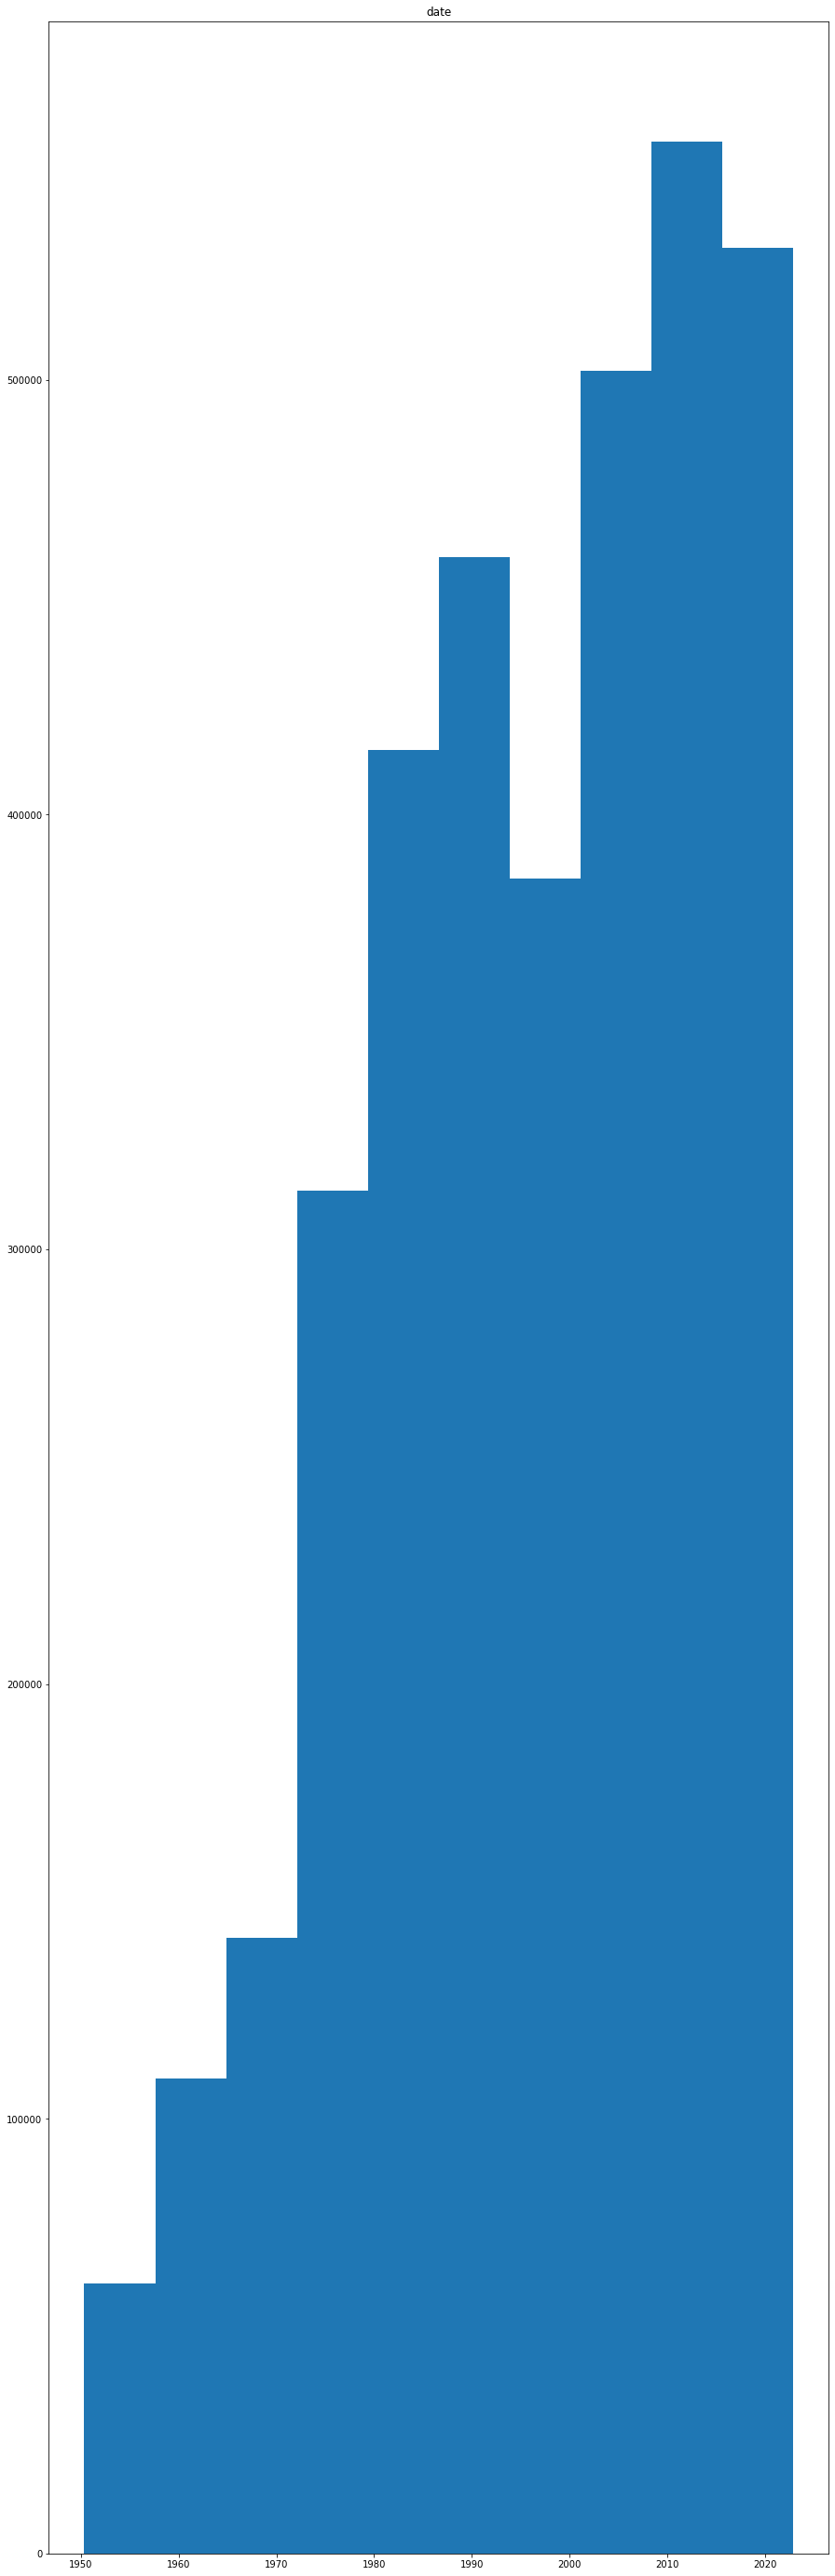

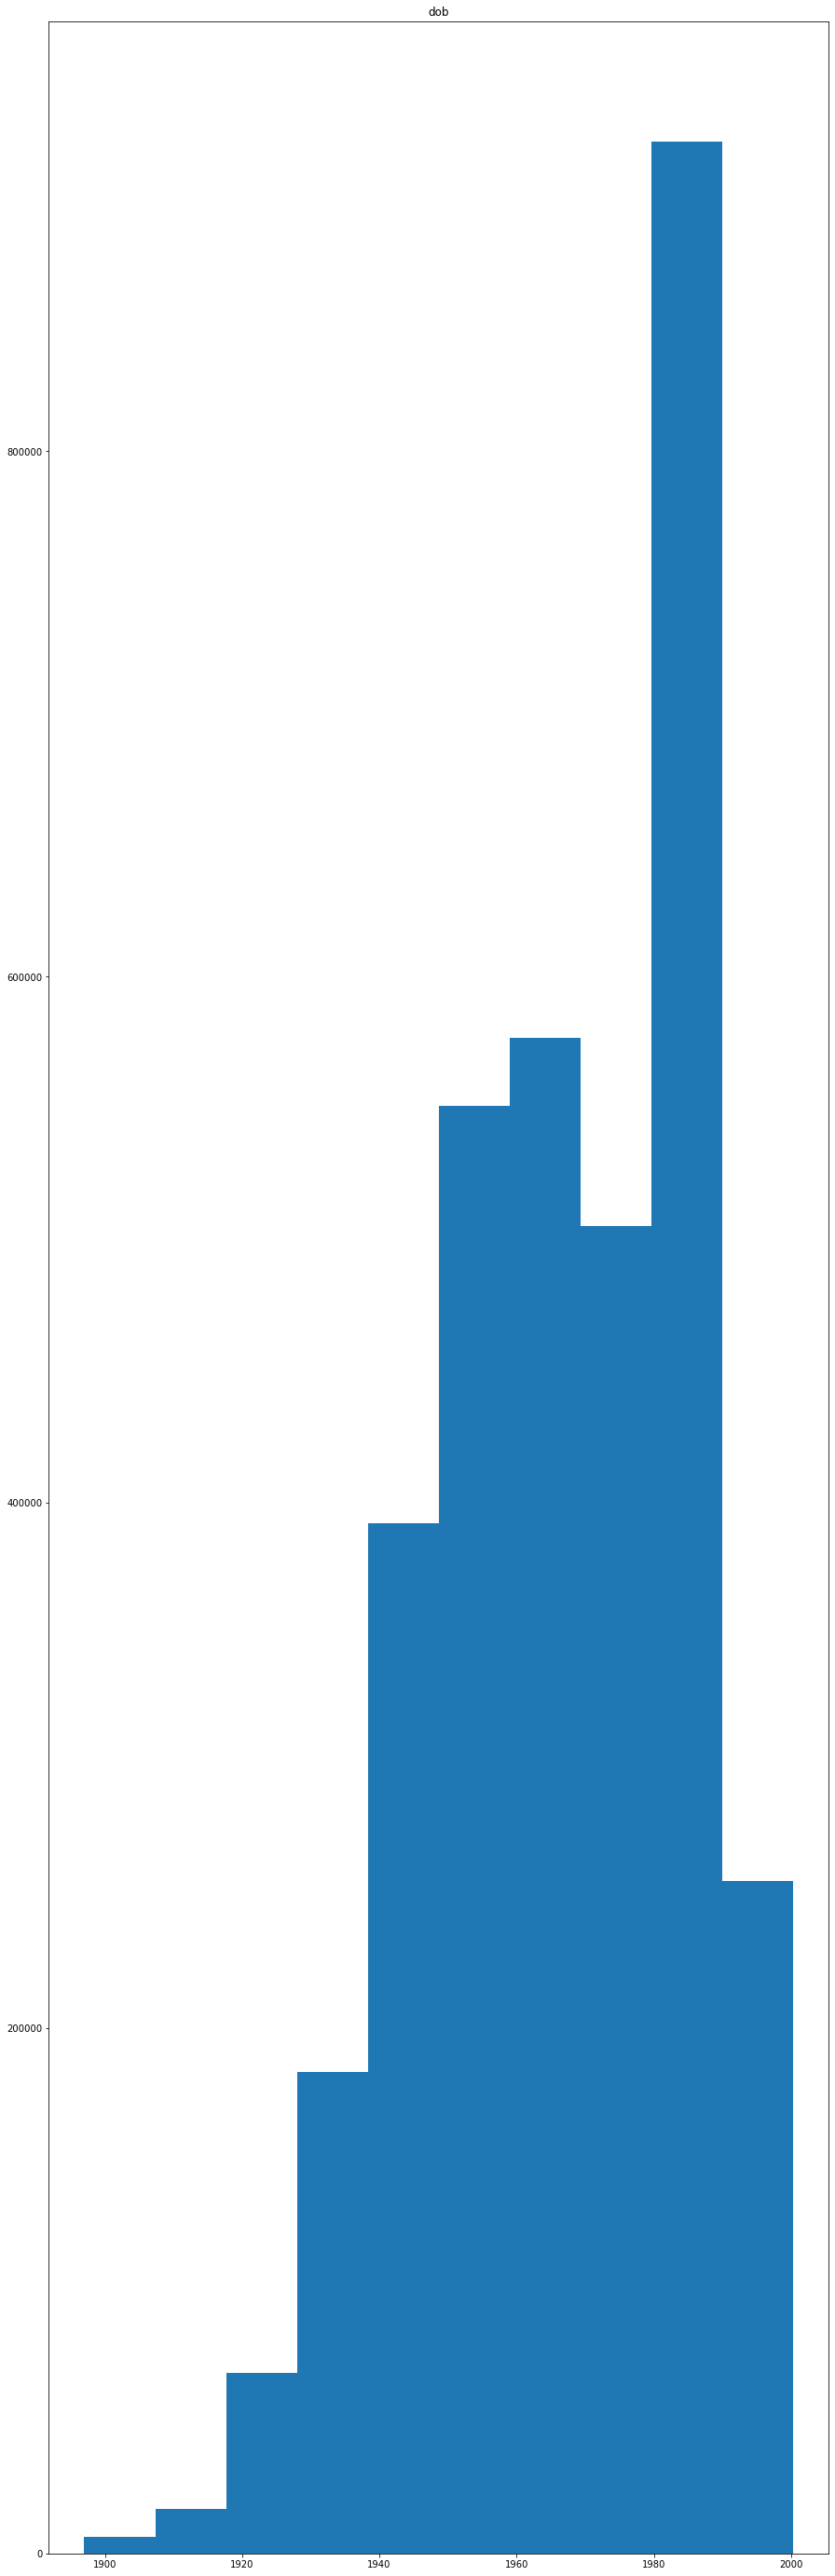

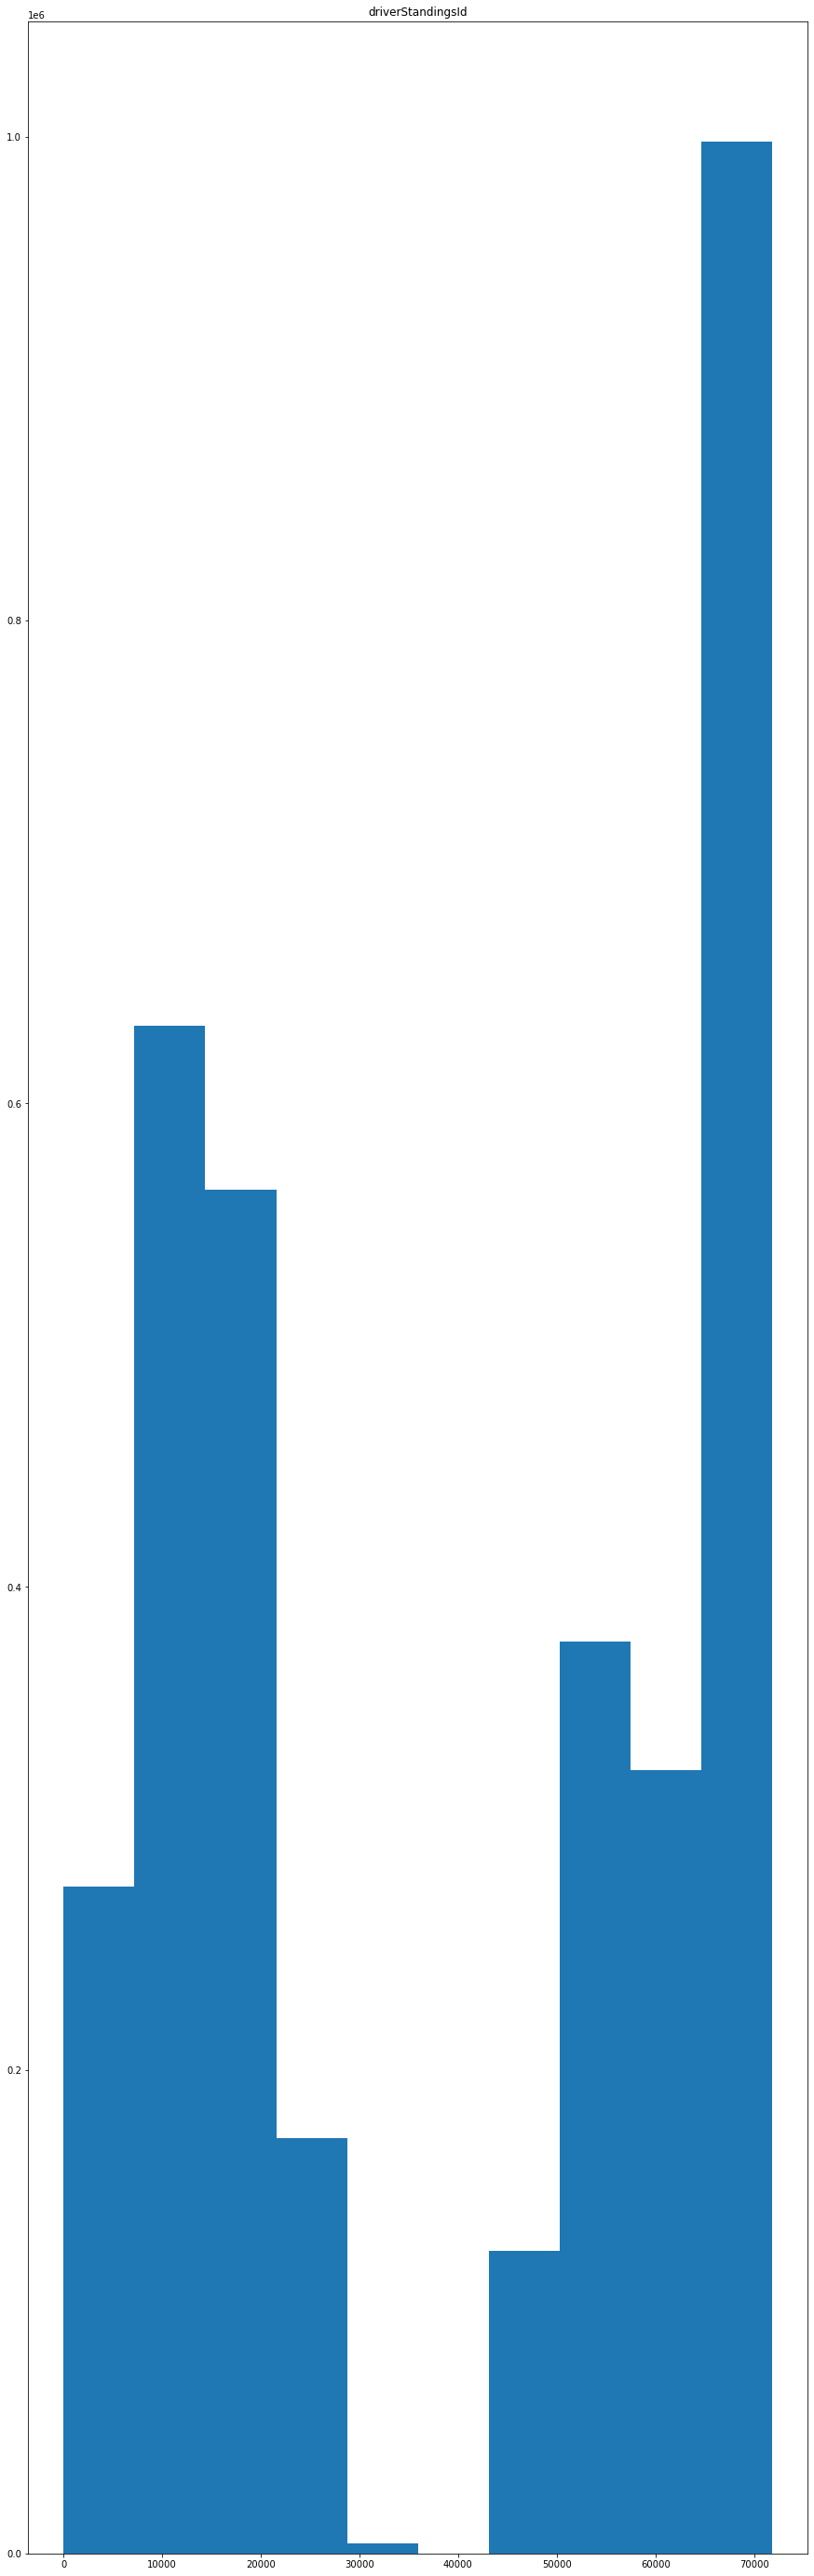

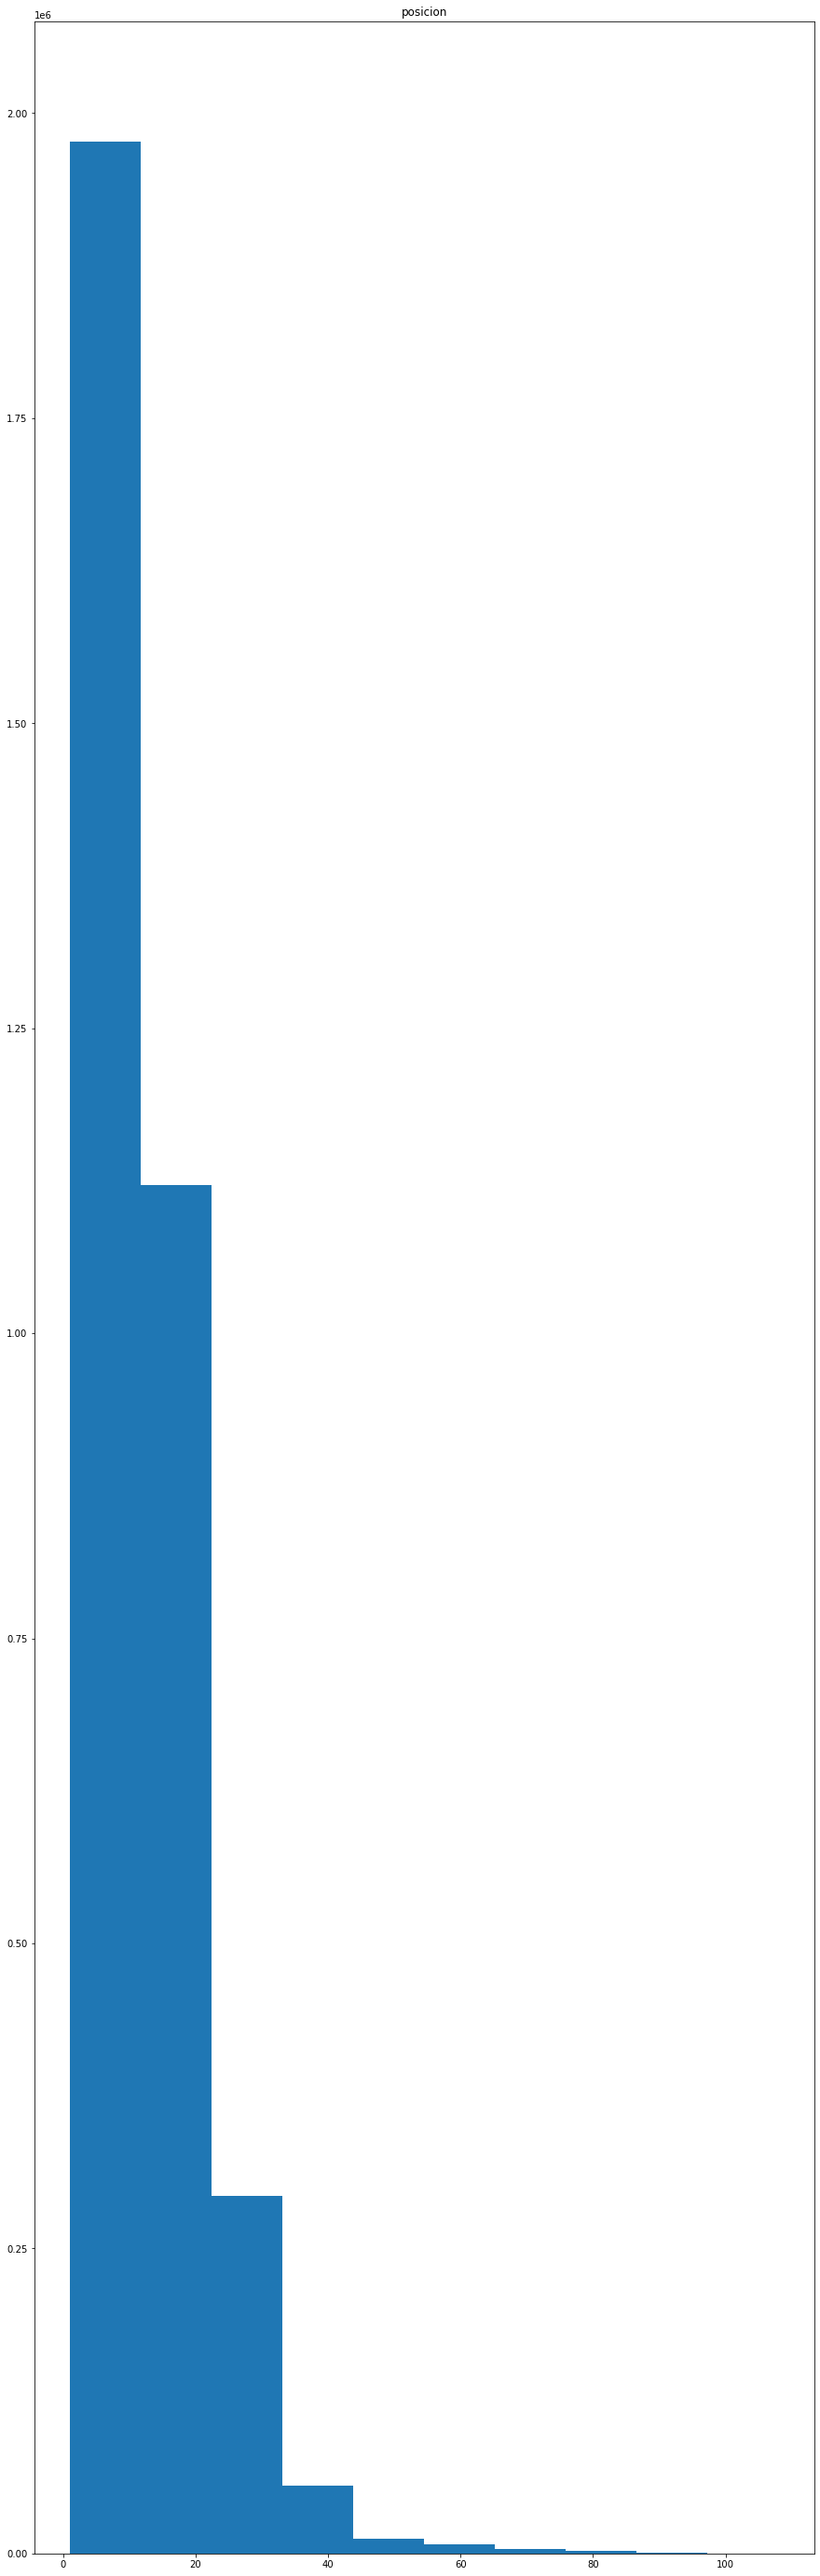

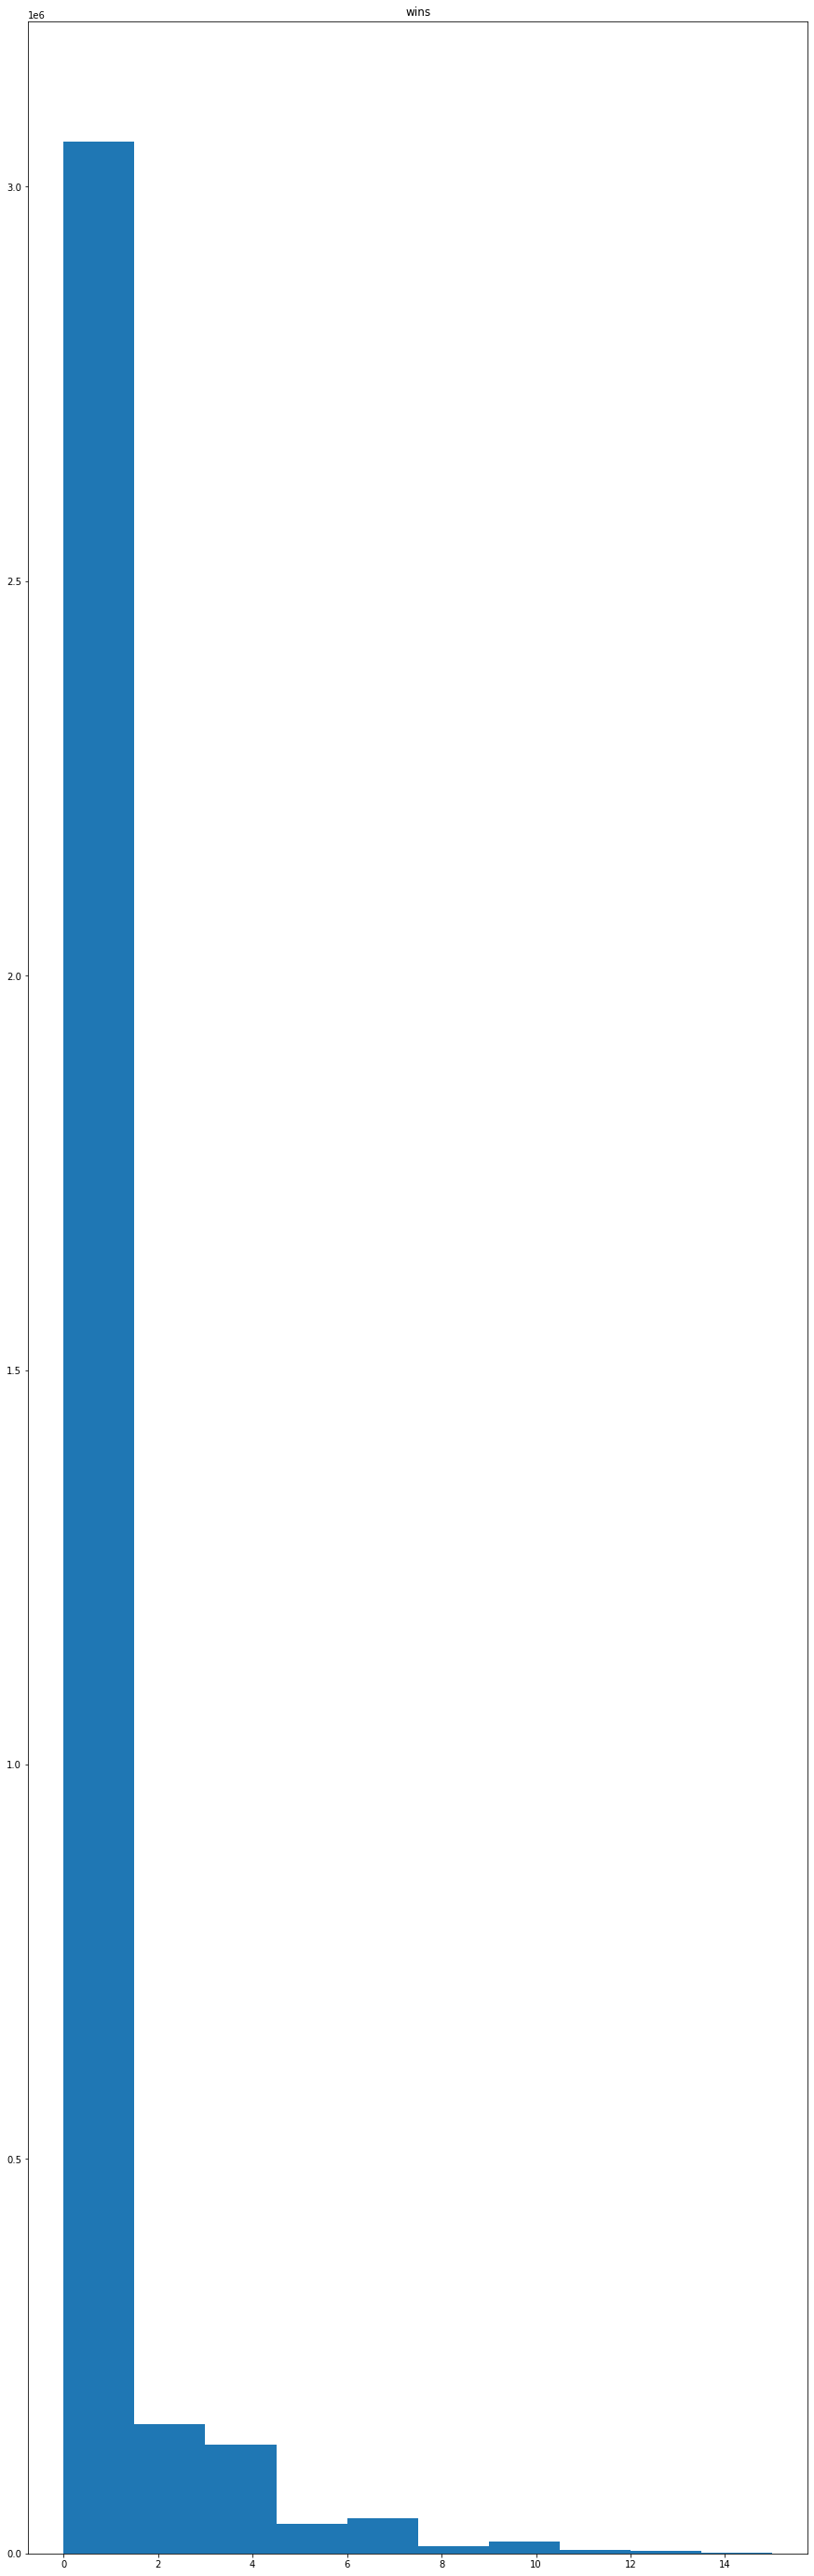

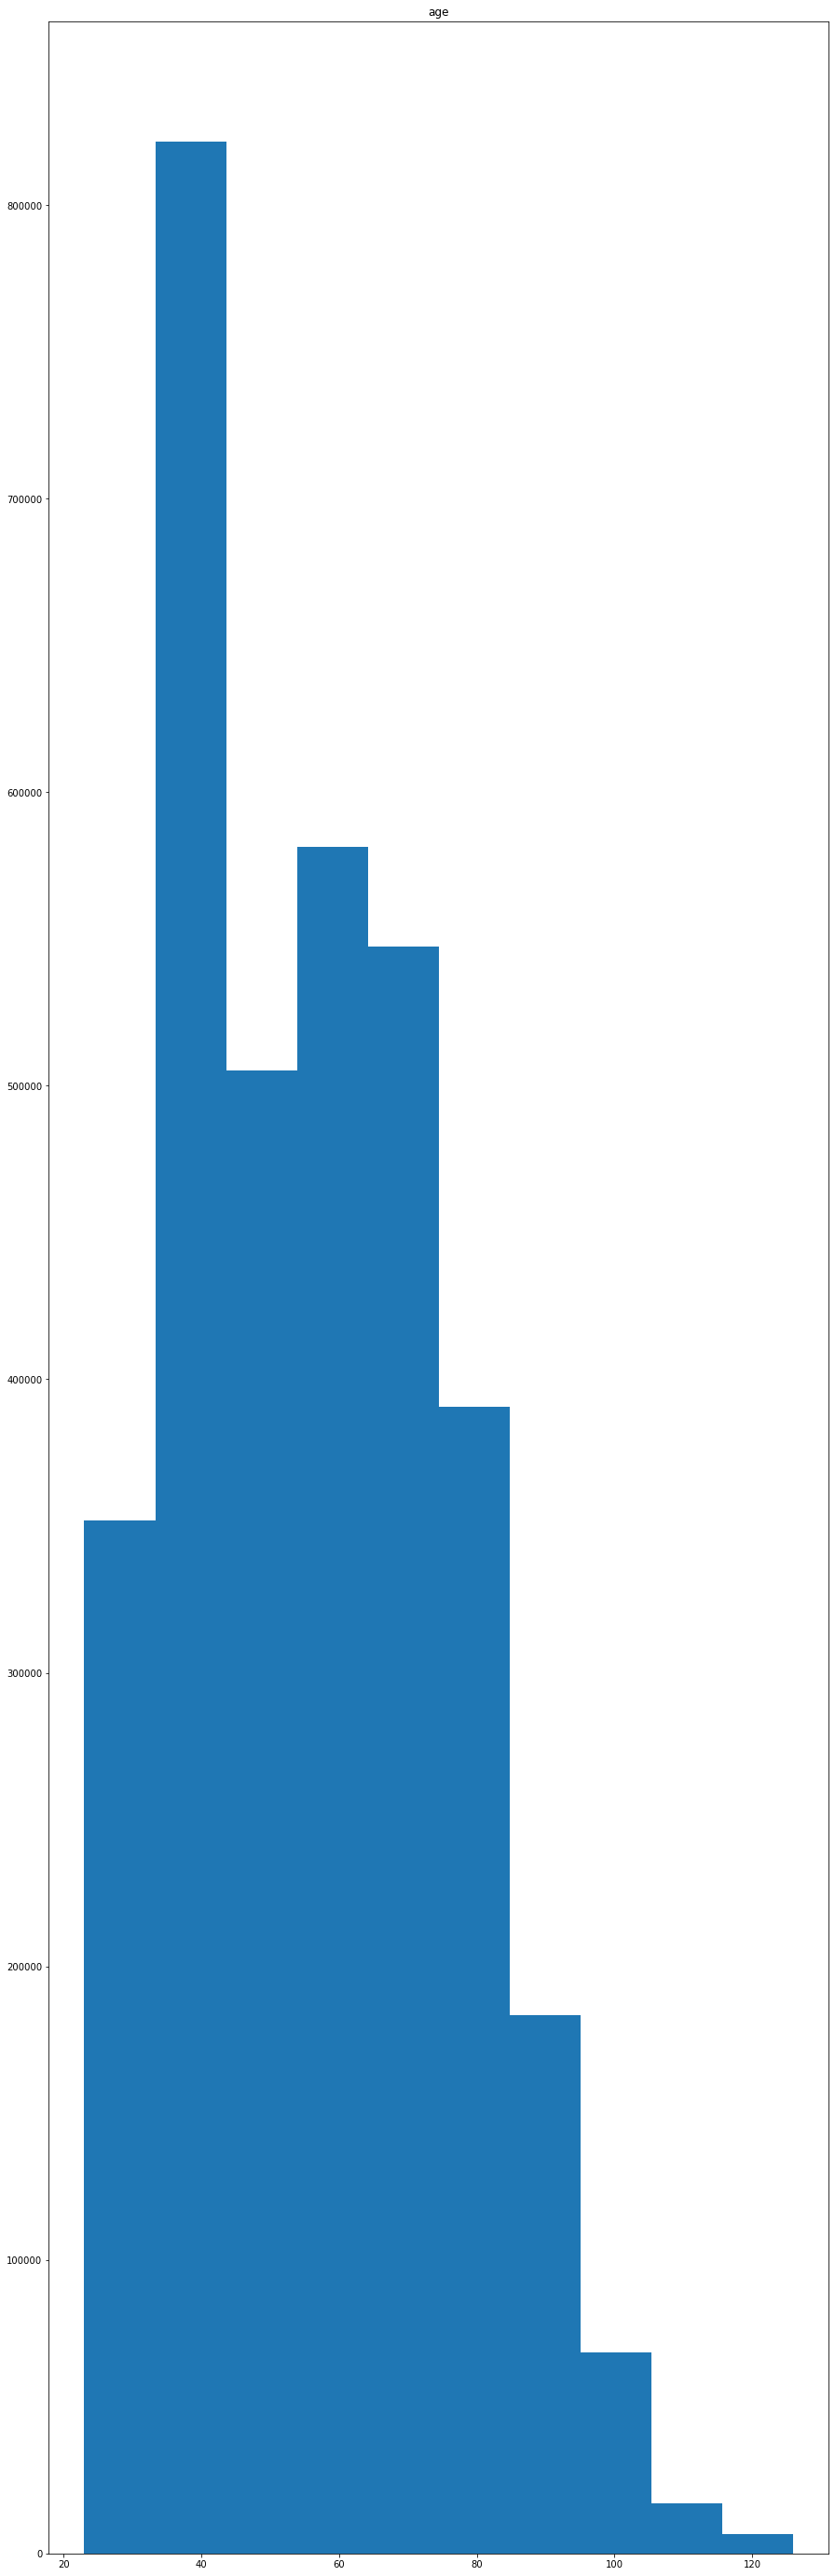

In [107]:
# Visualizamos las variables numéricas de forma gráfica
for c in numerical_columns:
    plt.figure(figsize=(15,50))
    plt.hist(df_f1data[c])
    plt.title(c)
    plt.show();

In [108]:
#sns.pairplot(df_f1data)

In [109]:
df_f1data.skew()

C:\Users\HS213EJ\AppData\Local\Temp\ipykernel_27740\2260295821.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_f1data.skew()


resultId             0.129291
Idcarrera            0.235682
driverId             1.649550
constructorId        1.973357
grid                 0.431989
positionOrder        0.457104
puntos               2.374234
laps                -0.091211
statusId             2.853230
year                -0.430255
round                0.232206
circuitId            1.321091
driverStandingsId   -0.074689
posicion             1.758802
wins                 3.865927
age                  0.460199
dtype: float64

In [116]:
Q1 = df_f1data.quantile(0.25)
Q3 = df_f1data.quantile(0.75)
IQR = Q3 - Q1
df_f1data = df_f1data[~((df_f1data<(Q1-1.5*IQR)) | (df_f1data>(Q3+1.5*IQR))).any(axis=1)]
df_f1data.head()

,resultId,Idcarrera,driverId,constructorId,numero,grid,positionOrder,puntos,laps,tiempo_en_milisegundos,...,num_piloto,codigo_piloto,nacionalidad,driverStandingsId,posicion,wins,marca,status,nombre_piloto,age
18,1,18,1,1,46,1,1,10.0,58,3370,...,25,31,8,13652,3,0,134,67,519,38.0
19,1,18,1,1,46,1,1,10.0,58,3370,...,25,31,8,68157,2,0,134,67,519,38.0
20,1,18,1,1,46,1,1,10.0,58,3370,...,25,31,8,13615,3,0,134,67,519,38.0
21,1,18,1,1,46,1,1,10.0,58,3370,...,25,31,8,13632,3,0,134,67,519,38.0
22,1,18,1,1,46,1,1,10.0,58,3370,...,25,31,8,13673,1,0,134,67,519,38.0


In [117]:
#Pasamos a realizar el modelo

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_columns:
    df_f1data[i] = le.fit_transform(df_f1data[i])
df_f1data.head()

#eliminamos las columnas que nos pueden dar problemas
df_f1data.drop('date',1,inplace=True)
df_f1data.drop('dob',1,inplace=True)
df_f1data.drop('statusId',1,inplace=True)

C:\Users\HS213EJ\AppData\Local\Temp\ipykernel_27740\620959741.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f1data[i] = le.fit_transform(df_f1data[i])


,resultId,Idcarrera,driverId,constructorId,numero,grid,positionOrder,puntos,laps,tiempo_en_milisegundos,...,num_piloto,codigo_piloto,nacionalidad,driverStandingsId,posicion,wins,marca,status,nombre_piloto,age
18,1,18,1,1,16,1,1,10.0,58,1364,...,0,16,6,13652,3,0,45,48,203,38.0
19,1,18,1,1,16,1,1,10.0,58,1364,...,0,16,6,68157,2,0,45,48,203,38.0
20,1,18,1,1,16,1,1,10.0,58,1364,...,0,16,6,13615,3,0,45,48,203,38.0
21,1,18,1,1,16,1,1,10.0,58,1364,...,0,16,6,13632,3,0,45,48,203,38.0
22,1,18,1,1,16,1,1,10.0,58,1364,...,0,16,6,13673,1,0,45,48,203,38.0


In [118]:
lm = LinearRegression()
X = df_f1data.drop (columns = ['nombre_piloto'])
Y = df_f1data['nombre_piloto']

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [120]:
model = lm.fit(X_train,Y_train)
Y_pred = lm.predict(X_test)
rmse = mean_squared_error(Y_test,Y_pred,squared=False)
mse = mean_squared_error(Y_test,Y_pred,squared=True)
r2 = r2_score(Y_test, Y_pred)

In [121]:
print(rmse)
print (mse)
print (r2)

94.59420315292479
8948.063270136807
0.0514945134888235


No tienen relación los datos puesto que he juntado 6 csv diferentes.